In [ ]:
import pandas as pd
import json
import requests
import time
import random
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Webscrapping

Para el link de los resultados y estadísticas por partido de cada jugador (Obtenido de FBREF), se planea emplear pd.read_html() para webscraping.

In [ ]:
import pandas as pd

# URL de la página con la tabla
url = "https://fbref.com/en/players/89ac64a6/matchlogs/2023-2024/summary/Manuel-Akanji-Match-Logs"

# Leer todas las tablas de la página
tables = pd.read_html(url)


# Mostrar cuántas tablas se encontraron
print(f"Se encontraron {len(tables)} tablas")

# Seleccionar la tabla correcta (puedes probar cuál es la que necesitas)
df = tables2[0]  # Puedes ajustar el índice dependiendo de la tabla que necesites
df = df[:-1]
# Mostrar las primeras filas de la tabla
df.tail()

Se encontraron 1 tablas


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Date                Day               Comp   
63         2024-06-08                Sat     Friendlies (M)   
64         2024-06-15                Sat          UEFA Euro   
65         2024-06-19                Wed          UEFA Euro   
66         2024-06-23                Sun          UEFA Euro   
67         2024-06-29                Sat          UEFA Euro   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                Round              Venue             Result   
63     Friendlies (M)               Home              D 1–1   
64        Group stage            Neutral              W 3–1   
65        Group stage            Neutral              D 1–1   
66        Group stage            Neutral              D 1–1   
67        Round of 16            Neutral              W 2–0   

   Unnamed: 6_level_0 Unnamed: 7_level_0 Unnamed: 8_level_0  \
                Squad           Opponent              Start   
63     ch Switzerland         at Austria                  Y   
64     ch Switzerland         hu Hungary                  Y   
65     ch Switzerland       sct Scotland                  Y   
66     ch Switzerland         de Germany                  Y   
67     ch Switzerland           it Italy                  Y   

   Unnamed: 9_level_0  ...  SCA Passes                 Carries      Take-Ons  \
                  Pos  ...  GCA    Cmp  Att  Cmp% PrgP Carries PrgC      Att   
63                 CB  ...  NaN    NaN  NaN   NaN  NaN     NaN  NaN      NaN   
64                 CB  ...    1     58   64  90.6    4      50    0        0   
65                 CB  ...    0     49   54  90.7    3      39    0        0   
66                 CB  ...    0     38   42  90.5    2      26    0        0   
67                 CB  ...    0     54   57  94.7    7      41    0        0   

        Unnamed: 36_level_0  
   Succ        Match Report  
63  NaN        Match Report  
64    0        Match Report  
65    0        Match Report  
66    0        Match Report  
67    0        Match Report  

[5 rows x 37 columns]

In [ ]:
df.shape

(68, 37)

In [ ]:
Jugadores = {

"Max Aarons":"https://fbref.com/en/players/774cf58b/matchlogs/2023-2024/Max-Aarons-Match-Logs",
"Joshua Acheampong":"https://fbref.com/en/players/b7e62e1d/matchlogs/2023-2024/Joshua-Acheampong-Match-Logs",
"Bénie Adama Traore":"https://fbref.com/en/players/77816c91/matchlogs/2023-2024/Benie-Adama-Traore-Match-Logs",
"Tyler Adams":"https://fbref.com/en/players/2b09d998/matchlogs/2023-2024/Tyler-Adams-Match-Logs",
"Tosin Adarabioyo":"https://fbref.com/en/players/c81d773d/matchlogs/2023-2024/Tosin-Adarabioyo-Match-Logs",
"Elijah Adebayo":"https://fbref.com/en/players/0480ebc7/matchlogs/2023-2024/Elijah-Adebayo-Match-Logs",
 "Simon Adingra":"https://fbref.com/en/players/4dcec659/matchlogs/2023-2024/summary/Simon-Adingra-Match-Logs",
 "Nayef Aguerd":"https://fbref.com/en/players/288e1e13/matchlogs/2023-2024/summary/Nayef-Aguerd-Match-Logs",
 "Naouirou Ahamada":"https://fbref.com/en/players/a6c58494/matchlogs/2023-2024/summary/Naouirou-Ahamada-Match-Logs",
 "Anel Ahmedhodžić":"https://fbref.com/en/players/eab957a3/matchlogs/2023-2024/summary/Anel-Ahmedhodzic-Match-Logs",
 "Ola Aina":"https://fbref.com/en/players/246d153b/matchlogs/2023-2024/summary/Ola-Aina-Match-Logs",
 "Rayan Aït-Nouri":"https://fbref.com/en/players/9b398aea/matchlogs/2023-2024/summary/Rayan-Ait-Nouri-Match-Logs",
 "Kristoffer Ajer":"https://fbref.com/en/players/9b398aea/matchlogs/2023-2024/summary/Rayan-Ait-Nouri-Match-Logs",
 "Manuel Akanji":"https://fbref.com/en/players/89ac64a6/matchlogs/2023-2024/summary/Manuel-Akanji-Match-Logs",
 "Nathan Aké":"https://fbref.com/en/players/eaeca114/matchlogs/2023-2024/summary/Nathan-Ake-Match-Logs",
 "Thiago Alcántara":"https://fbref.com/en/players/77e84962/matchlogs/2023-2024/summary/Thiago-Alcantara-Match-Logs",
 "Trent Alexander-Arnold":"https://fbref.com/en/players/cd1acf9d/matchlogs/2023-2024/summary/Trent-Alexander-Arnold-Match-Logs",
 "Alisson":"https://fbref.com/en/players/7a2e46a8/matchlogs/2023-2024/summary/Alisson-Match-Logs",
 "Miguel Almirón":"https://fbref.com/en/players/862a1c15/matchlogs/2023-2024/summary/Miguel-Almiron-Match-Logs",
 "Edson Álvarez":"https://fbref.com/en/players/8b3ab7ad/matchlogs/2023-2024/summary/Edson-Alvarez-Match-Logs",
 "Julián Álvarez":"https://fbref.com/en/players/15ab5a2b/matchlogs/2023-2024/summary/Julian-Alvarez-Match-Logs",
 "Zeki Amdouni":"https://fbref.com/en/players/2ee5b0c9/matchlogs/2023-2024/summary/Zeki-Amdouni-Match-Logs",
 "Sofyan Amrabat":"https://fbref.com/en/players/5a2cb25d/matchlogs/2023-2024/summary/Sofyan-Amrabat-Match-Logs",
 "Joachim Andersen":"https://fbref.com/en/players/e34fc66d/matchlogs/2023-2024/summary/Joachim-Andersen-Match-Logs",
 "Elliot Anderson":"https://fbref.com/en/players/de31038e/matchlogs/2023-2024/summary/Elliot-Anderson-Match-Logs",
 "Jaidon Anthony":"https://fbref.com/en/players/e4238fb1/matchlogs/2023-2024/summary/Jaidon-Anthony-Match-Logs",
 "Michail Antonio":"https://fbref.com/en/players/ac05f970/matchlogs/2023-2024/summary/Michail-Antonio-Match-Logs",
 "Antony":"https://fbref.com/en/players/99127249/matchlogs/2023-2024/summary/Antony-Match-Logs",
 "Oliver Arblaster":"https://fbref.com/en/players/afe1a491/matchlogs/2023-2024/summary/Oliver-Arblaster-Match-Logs",
 "Cameron Archer":"https://fbref.com/en/players/05e8ca6d/matchlogs/2023-2024/summary/Cameron-Archer-Match-Logs",
 "Cameron Archer":"https://fbref.com/en/players/05e8ca6d/matchlogs/2023-2024/summary/Cameron-Archer-Match-Logs",
 "Alphonse Areola":"https://fbref.com/en/players/2f965a72/matchlogs/2023-2024/summary/Alphonse-Areola-Match-Logs",
 "Lorenz Assignon":"https://fbref.com/en/players/b026bbf6/matchlogs/2023-2024/summary/Lorenz-Assignon-Match-Logs",
 "Serge Aurier":"https://fbref.com/en/players/5c2b4f07/matchlogs/2023-2024/summary/Serge-Aurier-Match-Logs",
 "Taiwo Awoniyi":"https://fbref.com/en/players/e5478b87/matchlogs/2023-2024/summary/Taiwo-Awoniyi-Match-Logs",
 "Jordan Ayew":"https://fbref.com/en/players/da052c14/matchlogs/2023-2024/summary/Jordan-Ayew-Match-Logs",
 "Benoît Badiashile":"https://fbref.com/en/players/06df8256/matchlogs/2023-2024/summary/Benoit-Badiashile-Match-Logs",
 "Leon Bailey":"https://fbref.com/en/players/3a233281/matchlogs/2023-2024/summary/Leon-Bailey-Match-Logs",
 "Stefan Bajcetic":"https://fbref.com/en/players/32e8417f/matchlogs/2023-2024/summary/Stefan-Bajcetic-Match-Logs",
 "George Baldock":"https://fbref.com/en/players/394854c4/matchlogs/2023-2024/summary/George-Baldock-Match-Logs",
 "Carlos Baleba":"https://fbref.com/en/players/a1390d2f/matchlogs/2023-2024/summary/Carlos-Baleba-Match-Logs",
 "Fodé Ballo-Touré":"https://fbref.com/en/players/f449640d/matchlogs/2023-2024/summary/Fode-Ballo-Toure-Match-Logs",
 "Shandon Baptiste":"https://fbref.com/en/players/2886c9b5/matchlogs/2023-2024/summary/Shandon-Baptiste-Match-Logs",
 "Valentín Barco":"https://fbref.com/en/players/2886c9b5/matchlogs/2023-2024/summary/Shandon-Baptiste-Match-Logs",
 "Ross Barkley":"https://fbref.com/en/players/3a24769f/matchlogs/2023-2024/summary/Ross-Barkley-Match-Logs",
 "Harvey Barnes":"https://fbref.com/en/players/3ea50f67/matchlogs/2023-2024/summary/Harvey-Barnes-Match-Logs",
 "Chris Basham":"https://fbref.com/en/players/1aa84968/matchlogs/2023-2024/summary/Chris-Basham-Match-Logs",
 "Calvin Bassey":"https://fbref.com/en/players/a36524bf/matchlogs/2023-2024/summary/Calvin-Bassey-Match-Logs",
 "Owen Beck":"https://fbref.com/en/players/a011a1e9/matchlogs/2023-2024/summary/Owen-Beck-Match-Logs",
 "Donny van de Beek":"https://fbref.com/en/players/50dc94ce/matchlogs/2023-2024/summary/Donny-van-de-Beek-Match-Logs",
 "Amari'i Bell":"https://fbref.com/en/players/399e9474/matchlogs/2023-2024/summary/Amarii-Bell-Match-Logs",
 "Jean-Ricner Bellegarde":"https://fbref.com/en/players/10f0fdd3/matchlogs/2023-2024/summary/Jean-Ricner-Bellegarde-Match-Logs",
 "Anis Ben Slimane":"https://fbref.com/en/players/9ade9ce1/matchlogs/2023-2024/summary/Anis-Ben-Slimane-Match-Logs",
 "Saïd Benrahma":"https://fbref.com/en/players/5a04fd92/matchlogs/2023-2024/summary/Said-Benrahma-Match-Logs",
 "Rodrigo Bentancur":"https://fbref.com/en/players/3b8674e6/matchlogs/2023-2024/summary/Rodrigo-Bentancur-Match-Logs",
 "Daniel Bentley":"https://fbref.com/en/players/68db6358/matchlogs/2023-2024/summary/Daniel-Bentley-Match-Logs",
 "Jóhann Berg Guðmundsson":"https://fbref.com/en/players/f72293fc/matchlogs/2023-2024/summary/Johann-Berg-Gudmundsson-Match-Logs",
 "Sander Berge":"https://fbref.com/en/players/d0b6129f/matchlogs/2023-2024/summary/Sander-Berge-Match-Logs",
 "Luke Berry":"https://fbref.com/en/players/2aaadf33/matchlogs/2023-2024/summary/Luke-Berry-Match-Logs",
 "Beto":"https://fbref.com/en/players/ed5c0319/matchlogs/2023-2024/summary/Beto-Match-Logs",
 "Jordan Beyer":"https://fbref.com/en/players/9af1f9ff/matchlogs/2023-2024/summary/Jordan-Beyer-Match-Logs",
 "Philip Billing":"https://fbref.com/en/players/d328a254/matchlogs/2023-2024/summary/Philip-Billing-Match-Logs",
 "Yves Bissouma":"https://fbref.com/en/players/6c203af0/matchlogs/2023-2024/summary/Yves-Bissouma-Match-Logs",
 "Benicio Boaitey":"https://fbref.com/en/players/4c5835e6/matchlogs/2023-2024/summary/Benicio-Boaitey-Match-Logs",
 "Oscar Bobb":"https://fbref.com/en/players/eed2427e/matchlogs/2023-2024/summary/Oscar-Bobb-Match-Logs",
 "Jayden Bogle":"https://fbref.com/en/players/ae5019e6/matchlogs/2023-2024/summary/Jayden-Bogle-Match-Logs",
 "Willy Boly":"https://fbref.com/en/players/a4ac4b8f/matchlogs/2023-2024/summary/Willy-Boly-Match-Logs",
 "Sven Botman":"https://fbref.com/en/players/ccce7025/matchlogs/2023-2024/summary/Sven-Botman-Match-Logs",
 "Jarrod Bowen":"https://fbref.com/en/players/79c84d1c/matchlogs/2023-2024/summary/Jarrod-Bowen-Match-Logs",
 "Conor Bradley":"https://fbref.com/en/players/bbd67769/matchlogs/2023-2024/summary/Conor-Bradley-Match-Logs",
 "Jarrad Branthwaite":"https://fbref.com/en/players/c1949191/matchlogs/2023-2024/summary/Jarrad-Branthwaite-Match-Logs",
 "Ben Brereton":"https://fbref.com/en/players/57827369/matchlogs/2023-2024/summary/Ben-Brereton-Match-Logs",
 "Rhian Brewster":"https://fbref.com/en/players/30e81a88/matchlogs/2023-2024/summary/Rhian-Brewster-Match-Logs",
 "Armando Broja":"https://fbref.com/en/players/97220da2/matchlogs/2023-2024/summary/Armando-Broja-Match-Logs",
 "Andre Brooks":"https://fbref.com/en/players/5f346071/matchlogs/2023-2024/summary/Andre-Brooks-Match-Logs",
 "David Brooks":"https://fbref.com/en/players/dc4cae05/matchlogs/2023-2024/summary/David-Brooks-Match-Logs",
 "Jacob Brown":"https://fbref.com/en/players/ca18c8f1/matchlogs/2023-2024/summary/Jacob-Brown-Match-Logs",
 "Josh Brownhill":"https://fbref.com/en/players/47369df8/matchlogs/2023-2024/summary/Josh-Brownhill-Match-Logs",
 "Jacob Bruun Larsen":"https://fbref.com/en/players/4e204552/matchlogs/2023-2024/summary/Jacob-Bruun-Larsen-Match-Logs",
 "Hugo Bueno":"https://fbref.com/en/players/bfc3b3a0/matchlogs/2023-2024/summary/Hugo-Bueno-Match-Logs",
 "Santiago Bueno":"https://fbref.com/en/players/edc98fac/matchlogs/2023-2024/summary/Santiago-Bueno-Match-Logs",
 "Facundo Buonanotte":"https://fbref.com/en/players/468a7a91/matchlogs/2023-2024/summary/Facundo-Buonanotte-Match-Logs",
 "Reece Burke":"https://fbref.com/en/players/a681b7b7/matchlogs/2023-2024/summary/Reece-Burke-Match-Logs",
 "Dan Burn":"https://fbref.com/en/players/b2d31e83/matchlogs/2023-2024/summary/Dan-Burn-Match-Logs",
 "Mason Burstow":"https://fbref.com/en/players/dab84ad2/matchlogs/2023-2024/summary/Mason-Burstow-Match-Logs",
 "Moisés Caicedo":"https://fbref.com/en/players/16264a81/matchlogs/2023-2024/summary/Moises-Caicedo-Match-Logs",
 "Tom Cairney":"https://fbref.com/en/players/a8748947/matchlogs/2023-2024/summary/Tom-Cairney-Match-Logs",
 "Dominic Calvert-Lewin":"https://fbref.com/en/players/59e6e5bf/matchlogs/2023-2024/summary/Dominic-Calvert-Lewin-Match-Logs",
 "Thomas Cannon":"https://fbref.com/en/players/4506aec5/matchlogs/2023-2024/summary/Thomas-Cannon-Match-Logs",
 "Diego Carlos":"https://fbref.com/en/players/b4a014b1/matchlogs/2023-2024/summary/Diego-Carlos-Match-Logs",
 "Cesare Casadei":"https://fbref.com/en/players/fb920f3a/matchlogs/2023-2024/summary/Cesare-Casadei-Match-Logs",
 "Casemiro":"https://fbref.com/en/players/4d224fe8/matchlogs/2023-2024/summary/Casemiro-Match-Logs",
 "Kaelan Casey":"https://fbref.com/en/players/cd4b2c5f/matchlogs/2023-2024/summary/Kaelan-Casey-Match-Logs",
 "Matty Cash":"https://fbref.com/en/players/2389cdc2/matchlogs/2023-2024/summary/Matty-Cash-Match-Logs",
 "Timothy Castagne":"https://fbref.com/en/players/197640fd/matchlogs/2023-2024/summary/Timothy-Castagne-Match-Logs",
 "Jonny Castro":"https://fbref.com/en/players/e28868f3/matchlogs/2023-2024/summary/Jonny-Castro-Match-Logs",
 "Trevoh Chalobah":"https://fbref.com/en/players/5515376c/matchlogs/2023-2024/summary/Trevoh-Chalobah-Match-Logs",
 "Calum Chambers":"https://fbref.com/en/players/dc6f5bdd/matchlogs/2023-2024/summary/Calum-Chambers-Match-Logs",
 "Youssef Chermiti":"https://fbref.com/en/players/890f108d/matchlogs/2023-2024/summary/Youssef-Chermiti-Match-Logs",
 "Ben Chilwell":"https://fbref.com/en/players/d2424d1b/matchlogs/2023-2024/summary/Ben-Chilwell-Match-Logs",
 "Tawanda Chirewa":"https://fbref.com/en/players/34721c11/matchlogs/2023-2024/summary/Tawanda-Chirewa-Match-Logs",
 "Leon Chiwome":"https://fbref.com/en/players/a2852b4f/matchlogs/2023-2024/summary/Leon-Chiwome-Match-Logs",
 "Tahith Chong":"https://fbref.com/en/players/2696b6a9/matchlogs/2023-2024/summary/Tahith-Chong-Match-Logs",
 "Ryan Christie":"https://fbref.com/en/players/26ce2263/matchlogs/2023-2024/summary/Ryan-Christie-Match-Logs",
 "Carney Chukwuemeka":"https://fbref.com/en/players/b2f9c73e/matchlogs/2023-2024/summary/Carney-Chukwuemeka-Match-Logs",
 "Bobby Clark":"https://fbref.com/en/players/73341ace/matchlogs/2023-2024/summary/Bobby-Clark-Match-Logs",
 "Jordan Clark":"https://fbref.com/en/players/7c5fa6cf/matchlogs/2023-2024/summary/Jordan-Clark-Match-Logs",
 "Nathaniel Clyne":"https://fbref.com/en/players/0442183b/matchlogs/2023-2024/summary/Nathaniel-Clyne-Match-Logs",
"Séamus Coleman":"https://fbref.com/en/players/0420d84f/matchlogs/2023-2024/summary/Seamus-Coleman-Match-Logs",
 "Nathan Collins":"https://fbref.com/en/players/a8c19eb8/matchlogs/2023-2024/summary/Nathan-Collins-Match-Logs",
 "Levi Colwill":"https://fbref.com/en/players/700783e7/matchlogs/2023-2024/summary/Levi-Colwill-Match-Logs",
 "Lewis Cook":"https://fbref.com/en/players/2afc7272/matchlogs/2023-2024/summary/Lewis-Cook-Match-Logs",
 "Jack Cork":"https://fbref.com/en/players/74e12f1e/matchlogs/2023-2024/summary/Jack-Cork-Match-Logs",
 "Maxwel Cornet":"https://fbref.com/en/players/beb391dd/matchlogs/2023-2024/summary/Maxwel-Cornet-Match-Logs",
 "Vladimír Coufal":"https://fbref.com/en/players/fdf3cb77/matchlogs/2023-2024/summary/Vladimir-Coufal-Match-Logs",
 "Philippe Coutinho":"https://fbref.com/en/players/0ef89a37/matchlogs/2023-2024/summary/Philippe-Coutinho-Match-Logs",
 "Aaron Cresswell":"https://fbref.com/en/players/4f974391/matchlogs/2023-2024/summary/Aaron-Cresswell-Match-Logs",
 "Marc Cucurella":"https://fbref.com/en/players/1daec722/matchlogs/2023-2024/summary/Marc-Cucurella-Match-Logs",
 "Josh Cullen":"https://fbref.com/en/players/f6d7d690/matchlogs/2023-2024/summary/Josh-Cullen-Match-Logs",
 "Matheus Cunha":"https://fbref.com/en/players/dc62b55d/matchlogs/2023-2024/summary/Matheus-Cunha-Match-Logs",
 "Sam Curtis":"https://fbref.com/en/players/7d42865e/matchlogs/2023-2024/summary/Sam-Curtis-Match-Logs",
 "Mahmoud Dahoud":"https://fbref.com/en/players/db4ed67b/matchlogs/2023-2024/summary/Mahmoud-Dahoud-Match-Logs",
 "Ameen Al-Dakhil":"https://fbref.com/en/players/93e08bce/matchlogs/2023-2024/summary/Ameen-Al-Dakhil-Match-Logs",
 "Diogo Dalot":"https://fbref.com/en/players/d9565625/matchlogs/2023-2024/summary/Diogo-Dalot-Match-Logs",
 "Mikkel Damsgaard":"https://fbref.com/en/players/215f3907/matchlogs/2023-2024/summary/Mikkel-Damsgaard-Match-Logs",
 "Danilo":"https://fbref.com/en/players/a816dbfb/matchlogs/2023-2024/summary/Danilo-Match-Logs",
 "Arnaut Danjuma":"https://fbref.com/en/players/003cf4d1/matchlogs/2023-2024/summary/Jayden-Danns-Match-Logs",
 "Josh Dasilva":"https://fbref.com/en/players/60344e4f/matchlogs/2023-2024/summary/Josh-Dasilva-Match-Logs",
 "Josh Dasilva":"https://fbref.com/en/players/60344e4f/matchlogs/2023-2024/summary/Josh-Dasilva-Match-Logs",
 "David Datro Fofana":"https://fbref.com/en/players/e82900ef/matchlogs/2023-2024/summary/David-Datro-Fofana-Match-Logs",
 "Ben Davies":"https://fbref.com/en/players/44781702/matchlogs/2023-2024/summary/Ben-Davies-Match-Logs",
 "Tom Davies":"https://fbref.com/en/players/9228b07c/matchlogs/2023-2024/summary/Tom-Davies-Match-Logs",
 "Craig Dawson":"https://fbref.com/en/players/3e9e06cb/matchlogs/2023-2024/summary/Craig-Dawson-Match-Logs",
 "Kevin De Bruyne":"https://fbref.com/en/players/e46012d4/matchlogs/2023-2024/summary/Kevin-De-Bruyne-Match-Logs",
 "Hannes Delcroix":"https://fbref.com/en/players/b737f944/matchlogs/2023-2024/summary/Hannes-Delcroix-Match-Logs",
 "Leander Dendoncker":"https://fbref.com/en/players/5a7301ae/matchlogs/2023-2024/summary/Leander-Dendoncker-Match-Logs",
 "Moussa Diaby":"https://fbref.com/en/players/aeed5c06/matchlogs/2023-2024/summary/Moussa-Diaby-Match-Logs",
 "Amad Diallo":"https://fbref.com/en/players/9dc96f10/matchlogs/2023-2024/summary/Amad-Diallo-Match-Logs",
 "Amadou Diallo":"https://fbref.com/en/players/e31708b2/matchlogs/2023-2024/summary/Amadou-Diallo-Match-Logs",
 "Rúben Dias":"https://fbref.com/en/players/31c69ef1/matchlogs/2023-2024/summary/Ruben-Dias-Match-Logs",
 "Luis Díaz":"https://fbref.com/en/players/4a1a9578/matchlogs/2023-2024/summary/Luis-Diaz-Match-Logs",
 "Eric Dier":"https://fbref.com/en/players/ac861941/matchlogs/2023-2024/summary/Eric-Dier-Match-Logs",
 "Lucas Digne":"https://fbref.com/en/players/1b84dbe1/matchlogs/2023-2024/summary/Lucas-Digne-Match-Logs",
 "Issa Diop":"https://fbref.com/en/players/a712ca2b/matchlogs/2023-2024/summary/Issa-Diop-Match-Logs",
 "Axel Disasi":"https://fbref.com/en/players/ad82197c/matchlogs/2023-2024/summary/Axel-Disasi-Match-Logs",
 "Ben Doak":"https://fbref.com/en/players/733f1a7d/matchlogs/2023-2024/summary/Ben-Doak-Match-Logs",
 "Lewis Dobbin":"https://fbref.com/en/players/e814e1cf/matchlogs/2023-2024/summary/Lewis-Dobbin-Match-Logs",
 "Matt Doherty":"https://fbref.com/en/players/d557d734/matchlogs/2023-2024/summary/Matt-Doherty-Match-Logs",
 "Jeremy Doku":"https://fbref.com/en/players/fffea3e5/matchlogs/2023-2024/summary/Jeremy-Doku-Match-Logs",
 "Nicolás Domínguez":"https://fbref.com/en/players/20b3a502/matchlogs/2023-2024/summary/Nicolas-Dominguez-Match-Logs",
 "Jamie Donley":"https://fbref.com/en/players/5e4d9b48/matchlogs/2023-2024/summary/Jamie-Donley-Match-Logs",
 "Abdoulaye Doucouré":"https://fbref.com/en/players/02b29014/matchlogs/2023-2024/summary/Abdoulaye-Doucoure-Match-Logs",
 "Cheick Doucouré":"https://fbref.com/en/players/ce4f40c7/matchlogs/2023-2024/summary/Cheick-Doucoure-Match-Logs",
 "Alfie Doughty":"https://fbref.com/en/players/bf33b257/matchlogs/2023-2024/summary/Alfie-Doughty-Match-Logs",
 "Tommy Doyle":"https://fbref.com/en/players/5526deb1/matchlogs/2023-2024/summary/Tommy-Doyle-Match-Logs",
 "Radu Drăgușin":"https://fbref.com/en/players/620922ed/matchlogs/2023-2024/summary/Radu-Dragusin-Match-Logs",
 "Martin Dúbravka":"https://fbref.com/en/players/3a949a25/matchlogs/2023-2024/summary/Martin-Dubravka-Match-Logs",
 "Paul Dummett":"https://fbref.com/en/players/3fe6bd8c/matchlogs/2023-2024/summary/Paul-Dummett-Match-Logs",
 "Lewis Dunk":"https://fbref.com/en/players/282f75f3/matchlogs/2023-2024/summary/Lewis-Dunk-Match-Logs",
 "Jhon Durán":"https://fbref.com/en/players/414184f7/matchlogs/2023-2024/summary/Jhon-Duran-Match-Logs",
 "George Earthy":"https://fbref.com/en/players/123d2733/matchlogs/2023-2024/summary/George-Earthy-Match-Logs",
 "Ederson":"https://fbref.com/en/players/3bb7b8b4/matchlogs/2023-2024/summary/Ederson-Match-Logs",
 "Odsonne Édouard":"https://fbref.com/en/players/0562b7f1/matchlogs/2023-2024/summary/Odsonne-Edouard-Match-Logs",
 "John Egan":"https://fbref.com/en/players/debe38a0/matchlogs/2023-2024/summary/John-Egan-Match-Logs",
 "Hjalmar Ekdal":"https://fbref.com/en/players/3d554589/matchlogs/2023-2024/summary/Hjalmar-Ekdal-Match-Logs",
 "Anthony Elanga":"https://fbref.com/en/players/2fba6108/matchlogs/2023-2024/summary/Anthony-Elanga-Match-Logs",
 "Harvey Elliott":"https://fbref.com/en/players/b9e1436c/matchlogs/2023-2024/summary/Harvey-Elliott-Match-Logs",
 "Mohamed Elneny":"https://fbref.com/en/players/47a34c4f/matchlogs/2023-2024/summary/Mohamed-Elneny-Match-Logs",
 "Emerson":"https://fbref.com/en/players/df8b52a5/matchlogs/2023-2024/summary/Emerson-Match-Logs",
 "Julio Enciso":"https://fbref.com/en/players/9cfbad36/matchlogs/2023-2024/summary/Julio-Enciso-Match-Logs",
 "Wataru Endo":"https://fbref.com/en/players/c149016b/matchlogs/2023-2024/summary/Wataru-Endo-Match-Logs",
 "Christian Eriksen":"https://fbref.com/en/players/980522ec/matchlogs/2023-2024/summary/Christian-Eriksen-Match-Logs",
 "Maxime Estève":"https://fbref.com/en/players/1a066e69/matchlogs/2023-2024/summary/Maxime-Esteve-Match-Logs",
 "Pervis Estupiñán":"https://fbref.com/en/players/d38fdf53/matchlogs/2023-2024/summary/Pervis-Estupinan-Match-Logs",
 "Jonny Evans":"https://fbref.com/en/players/f8fcd2a5/matchlogs/2023-2024/summary/Jonny-Evans-Match-Logs",
 "Eberechi Eze":"https://fbref.com/en/players/ae4fc6a4/matchlogs/2023-2024/summary/Eberechi-Eze-Match-Logs",
 "Łukasz Fabiański":"https://fbref.com/en/players/9328b835/matchlogs/2023-2024/summary/Lukasz-Fabianski-Match-Logs",
 "Romain Faivre":"https://fbref.com/en/players/745ca0a3/matchlogs/2023-2024/summary/Romain-Faivre-Match-Logs",
 "Ansu Fati":"https://fbref.com/en/players/0ba976e4/matchlogs/2023-2024/summary/Ansu-Fati-Match-Logs",
 "Felipe":"https://fbref.com/en/players/51a3c4c8/matchlogs/2023-2024/summary/Felipe-Match-Logs",
 "Evan Ferguson":"https://fbref.com/en/players/4596da74/matchlogs/2023-2024/summary/Evan-Ferguson-Match-Logs",
 "Bruno Fernandes":"https://fbref.com/en/players/507c7bdf/matchlogs/2023-2024/summary/Bruno-Fernandes-Match-Logs",
 "Enzo Fernández":"https://fbref.com/en/players/5ff4ab71/matchlogs/2023-2024/summary/Enzo-Fernandez-Match-Logs",
 "John Fleck":"https://fbref.com/en/players/b63e789d/matchlogs/2023-2024/summary/John-Fleck-Match-Logs",
 "Mark Flekken":"https://fbref.com/en/players/a92ab7be/matchlogs/2023-2024/summary/Mark-Flekken-Match-Logs",
 "Phil Foden":"https://fbref.com/en/players/ed1e53f3/matchlogs/2023-2024/summary/Phil-Foden-Match-Logs",
 "Wes Foderingham":"https://fbref.com/en/players/96cf7b61/matchlogs/2023-2024/summary/Wes-Foderingham-Match-Logs",
 "Pablo Fornals":"https://fbref.com/en/players/82927de4/matchlogs/2023-2024/summary/Pablo-Fornals-Match-Logs",
 "Omari Forson":"https://fbref.com/en/players/1b9728b0/matchlogs/2023-2024/summary/Omari-Forson-Match-Logs",
 "Lyle Foster":"https://fbref.com/en/players/f84a807c/matchlogs/2023-2024/summary/Lyle-Foster-Match-Logs",
 "Matheus França":"https://fbref.com/en/players/077faf72/matchlogs/2023-2024/summary/Matheus-Franca-Match-Logs",
 "Nathan Fraser":"https://fbref.com/en/players/00b77ecf/matchlogs/2023-2024/summary/Nathan-Fraser-Match-Logs",
 "Cody Gakpo":"https://fbref.com/en/players/1971591f/matchlogs/2023-2024/summary/Cody-Gakpo-Match-Logs",
 "Conor Gallagher":"https://fbref.com/en/players/c2731c10/matchlogs/2023-2024/summary/Conor-Gallagher-Match-Logs",
 "Idrissa Gana Gueye":"https://fbref.com/en/players/72c812f3/matchlogs/2023-2024/summary/Idrissa-Gana-Gueye-Match-Logs",
 "Alejandro Garnacho":"https://fbref.com/en/players/7aa8adfe/matchlogs/2023-2024/summary/Alejandro-Garnacho-Match-Logs",
 "James Garner":"https://fbref.com/en/players/4e015693/matchlogs/2023-2024/summary/James-Garner-Match-Logs",
 "Saman Ghoddos":"https://fbref.com/en/players/f7b1d4e0/matchlogs/2023-2024/summary/Saman-Ghoddos-Match-Logs",
 "Morgan Gibbs-White":"https://fbref.com/en/players/32f60ed8/matchlogs/2023-2024/summary/Morgan-Gibbs-White-Match-Logs",
 "Bryan Gil":"https://fbref.com/en/players/7b5ab7f2/matchlogs/2023-2024/summary/Bryan-Gil-Match-Logs",
 "Alfie Gilchrist":"https://fbref.com/en/players/d91f104d/matchlogs/2023-2024/summary/Alfie-Gilchrist-Match-Logs",
 "Billy Gilmour":"https://fbref.com/en/players/df10e27c/matchlogs/2023-2024/summary/Billy-Gilmour-Match-Logs",
 "Ben Godfrey":"https://fbref.com/en/players/9f7c837d/matchlogs/2023-2024/summary/Ben-Godfrey-Match-Logs",
 "André Gomes":"https://fbref.com/en/players/1961b2aa/matchlogs/2023-2024/summary/Andre-Gomes-Match-Logs",
 "João Gomes":"https://fbref.com/en/players/8b57ad2c/matchlogs/2023-2024/summary/Joao-Gomes-Match-Logs",
 "Toti Gomes":"https://fbref.com/en/players/f0caab96/matchlogs/2023-2024/summary/Toti-Gomes-Match-Logs",
 "Joe Gomez":"https://fbref.com/en/players/7a11550b/matchlogs/2023-2024/summary/Joe-Gomez-Match-Logs",
 "Sergio Gómez":"https://fbref.com/en/players/01e5f06e/matchlogs/2023-2024/summary/Sergio-Gomez-Match-Logs",
 "Enso Gonzalez":"https://fbref.com/en/players/7e5bebeb/matchlogs/2023-2024/summary/Enso-Gonzalez-Match-Logs",
 "Anthony Gordon":"https://fbref.com/en/players/2bd83368/matchlogs/2023-2024/summary/Anthony-Gordon-Match-Logs",
 "Kaide Gordon":"https://fbref.com/en/players/19a9cb70/matchlogs/2023-2024/summary/Kaide-Gordon-Match-Logs",
 "Daniel Gore":"https://fbref.com/en/players/861e9b3b/matchlogs/2023-2024/summary/Daniel-Gore-Match-Logs",
 "Ryan Gravenberch":"https://fbref.com/en/players/b8e740fb/matchlogs/2023-2024/summary/Ryan-Gravenberch-Match-Logs",
 "Ivo Grbić":"https://fbref.com/en/players/3f034750/matchlogs/2023-2024/summary/Ivo-Grbic-Match-Logs",
 "Jack Grealish":"https://fbref.com/en/players/b0b4fd3e/matchlogs/2023-2024/summary/Jack-Grealish-Match-Logs",
 "Pascal Groß":"https://fbref.com/en/players/8aec0537/matchlogs/2023-2024/summary/Pascal-Gross-Match-Logs",
 "Marc Guéhi":"https://fbref.com/en/players/d0706b27/matchlogs/2023-2024/summary/Marc-Guehi-Match-Logs",
 "Bruno Guimarães":"https://fbref.com/en/players/82518f62/matchlogs/2023-2024/summary/Bruno-Guimaraes-Match-Logs",
 "Malo Gusto":"https://fbref.com/en/players/d56b9520/matchlogs/2023-2024/summary/Malo-Gusto-Match-Logs",
 "Joško Gvardiol":"https://fbref.com/en/players/5ad50391/matchlogs/2023-2024/summary/Josko-Gvardiol-Match-Logs",
 "Erling Haaland":"https://fbref.com/en/players/1f44ac21/matchlogs/2023-2024/summary/Erling-Haaland-Match-Logs",
 "Lewis Hall":"https://fbref.com/en/players/da011f18/matchlogs/2023-2024/summary/Lewis-Hall-Match-Logs",
 "Gustavo Hamer":"https://fbref.com/en/players/eebacc07/matchlogs/2023-2024/summary/Gustavo-Hamer-Match-Logs",
 "Luke Harris":"https://fbref.com/en/players/8c3078cd/matchlogs/2023-2024/summary/Luke-Harris-Match-Logs",
 "Jack Harrison":"https://fbref.com/en/players/aa849a12/matchlogs/2023-2024/summary/Jack-Harrison-Match-Logs",
 "Daiki Hashioka":"https://fbref.com/en/players/10cb48b7/matchlogs/2023-2024/summary/Daiki-Hashioka-Match-Logs",
 "Kai Havertz":"https://fbref.com/en/players/fed7cb61/matchlogs/2023-2024/summary/Kai-Havertz-Match-Logs",
 "Jan Paul van Hecke":"https://fbref.com/en/players/4fd08daa/matchlogs/2023-2024/summary/Jan-Paul-van-Hecke-Match-Logs",
 "Hwang Hee-chan":"https://fbref.com/en/players/169fd162/matchlogs/2023-2024/summary/Hwang-Hee-chan-Match-Logs",
 "Dean Henderson":"https://fbref.com/en/players/e5a76dfe/matchlogs/2023-2024/summary/Dean-Henderson-Match-Logs",
 "Rico Henry":"https://fbref.com/en/players/8a3c1dc7/matchlogs/2023-2024/summary/Rico-Henry-Match-Logs",
 "Son Heung-min":"https://fbref.com/en/players/92e7e919/matchlogs/2023-2024/summary/Son-Heung-min-Match-Logs",
 "Aaron Hickey":"https://fbref.com/en/players/1780bb4a/matchlogs/2023-2024/summary/Aaron-Hickey-Match-Logs",
 "James Hill":"https://fbref.com/en/players/69942fb3/matchlogs/2023-2024/summary/James-Hill-Match-Logs",
 "Jack Hinshelwood":"https://fbref.com/en/players/e98211e7/matchlogs/2023-2024/summary/Jack-Hinshelwood-Match-Logs",
 "Mason Holgate":"https://fbref.com/en/players/d0042ab9/matchlogs/2023-2024/summary/Mason-Holgate-Match-Logs",
 "Callum Hudson-Odoi":"https://fbref.com/en/players/15f3ec41/matchlogs/2023-2024/summary/Callum-Hudson-Odoi-Match-Logs",
 "Will Hughes":"https://fbref.com/en/players/a0666d3e/matchlogs/2023-2024/summary/Will-Hughes-Match-Logs",
 "Pierre Højbjerg":"https://fbref.com/en/players/8b04d6c1/matchlogs/2023-2024/summary/Pierre-Hojbjerg-Match-Logs",
 "Rasmus Højlund":"https://fbref.com/en/players/491a433d/matchlogs/2023-2024/summary/Rasmus-Hojlund-Match-Logs",
 "Igor":"https://fbref.com/en/players/a4e85758/matchlogs/2023-2024/summary/Igor-Match-Logs",
 "Danny Ings":"https://fbref.com/en/players/07802f7f/matchlogs/2023-2024/summary/Danny-Ings-Match-Logs",
 "Alexander Isak":"https://fbref.com/en/players/8e92be30/matchlogs/2023-2024/summary/Alexander-Isak-Match-Logs",
 "Alex Iwobi":"https://fbref.com/en/players/6ca5ec4b/matchlogs/2023-2024/summary/Alex-Iwobi-Match-Logs",
 "Nicolas Jackson":"https://fbref.com/en/players/9c36ed83/matchlogs/2023-2024/summary/Nicolas-Jackson-Match-Logs",
 "Reece James":"https://fbref.com/en/players/1265a93a/matchlogs/2023-2024/summary/Reece-James-Match-Logs",
 "Vitaly Janelt":"https://fbref.com/en/players/8449d35e/matchlogs/2023-2024/summary/Vitaly-Janelt-Match-Logs",
 "Daniel Jebbison":"https://fbref.com/en/players/03edb878/matchlogs/2023-2024/summary/Daniel-Jebbison-Match-Logs",
 "Mathias Jensen":"https://fbref.com/en/players/0f134faf/matchlogs/2023-2024/summary/Mathias-Jensen-Match-Logs",
 "Gabriel Jesus":"https://fbref.com/en/players/b66315ae/matchlogs/2023-2024/summary/Gabriel-Jesus-Match-Logs",
 "Raúl Jiménez":"https://fbref.com/en/players/b561db50/matchlogs/2023-2024/summary/Raul-Jimenez-Match-Logs",
 "João Pedro":"https://fbref.com/en/players/e8832875/matchlogs/2023-2024/summary/Joao-Pedro-Match-Logs",
 "Joelinton":"https://fbref.com/en/players/c17bfb65/matchlogs/2023-2024/summary/Joelinton-Match-Logs",
 "Ryan John Giles":"https://fbref.com/en/players/73b1d65b/matchlogs/2023-2024/summary/Ryan-John-Giles-Match-Logs",
 "Ben Johnson":"https://fbref.com/en/players/9319781b/matchlogs/2023-2024/summary/Ben-Johnson-Match-Logs",
 "Brennan Johnson":"https://fbref.com/en/players/0cd31129/matchlogs/2023-2024/summary/Brennan-Johnson-Match-Logs",
 "Joseph Johnson":"https://fbref.com/en/players/d9e7c4da/matchlogs/2023-2024/summary/Joseph-Johnson-Match-Logs",
 "Sam Johnstone":"https://fbref.com/en/players/9e5708be/matchlogs/2023-2024/summary/Sam-Johnstone-Match-Logs",
 "Curtis Jones":"https://fbref.com/en/players/4fb9c88f/matchlogs/2023-2024/summary/Curtis-Jones-Match-Logs",
 "Jorginho":"https://fbref.com/en/players/45db685d/matchlogs/2023-2024/summary/Jorginho-Match-Logs",
 "Diogo Jota":"https://fbref.com/en/players/178ae8f8/matchlogs/2023-2024/summary/Diogo-Jota-Match-Logs",
 "Mads Juel Andersen":"https://fbref.com/en/players/f098c03e/matchlogs/2023-2024/summary/Mads-Juel-Andersen-Match-Logs",
 "Hamed Junior Traorè":"https://fbref.com/en/players/570bb4b9/matchlogs/2023-2024/summary/Hamed-Junior-Traore-Match-Logs",
 "Mathias Jørgensen":"https://fbref.com/en/players/0db5d2c8/matchlogs/2023-2024/summary/Mathias-Jorgensen-Match-Logs",
 "Issa Kaboré":"https://fbref.com/en/players/c066d1a5/matchlogs/2023-2024/summary/Issa-Kabore-Match-Logs",
 "Sasa Kalajdzic":"https://fbref.com/en/players/15f24fe7/matchlogs/2023-2024/summary/Sasa-Kalajdzic-Match-Logs",
 "Boubacar Kamara":"https://fbref.com/en/players/cc77354e/matchlogs/2023-2024/summary/Boubacar-Kamara-Match-Logs",
 "Willy Kambwala":"https://fbref.com/en/players/6a7353d7/matchlogs/2023-2024/summary/Willy-Kambwala-Match-Logs",
 "Thomas Kaminski":"https://fbref.com/en/players/1caa93a5/matchlogs/2023-2024/summary/Thomas-Kaminski-Match-Logs",
 "Loris Karius":"https://fbref.com/en/players/32e7ce92/matchlogs/2023-2024/summary/Loris-Karius-Match-Logs",
 "Michael Keane":"https://fbref.com/en/players/c5b7c315/matchlogs/2023-2024/summary/Michael-Keane-Match-Logs",
 "Thilo Kehrer":"https://fbref.com/en/players/51dbeea9/matchlogs/2023-2024/summary/Thilo-Kehrer-Match-Logs",
 "Caoimhín Kelleher":"https://fbref.com/en/players/62d7ef38/matchlogs/2023-2024/summary/Caoimhin-Kelleher-Match-Logs",
 "Lloyd Kelly":"https://fbref.com/en/players/f31def1e/matchlogs/2023-2024/summary/Lloyd-Kelly-Match-Logs",
 "Omari Kellyman":"https://fbref.com/en/players/aa888da7/matchlogs/2023-2024/summary/Omari-Kellyman-Match-Logs",
 "Milos Kerkez":"https://fbref.com/en/players/0ad53bdc/matchlogs/2023-2024/summary/Milos-Kerkez-Match-Logs",
 "Kaine Kesler-Hayden":"https://fbref.com/en/players/9b066938/matchlogs/2023-2024/summary/Kaine-Kesler-Hayden-Match-Logs",
 "Max Kilman":"https://fbref.com/en/players/d0f72bf1/matchlogs/2023-2024/summary/Max-Kilman-Match-Logs",
 "Jakub Kiwior":"https://fbref.com/en/players/dc3e663e/matchlogs/2023-2024/summary/Jakub-Kiwior-Match-Logs",
 "Justin Kluivert":"https://fbref.com/en/players/4c3a6744/matchlogs/2023-2024/summary/Justin-Kluivert-Match-Logs",
 "Luca Koleosho":"https://fbref.com/en/players/fc076f78/matchlogs/2023-2024/summary/Luca-Koleosho-Match-Logs",
 "Ibrahima Konaté":"https://fbref.com/en/players/5ed9b537/matchlogs/2023-2024/summary/Ibrahima-Konate-Match-Logs",
 "Ezri Konsa":"https://fbref.com/en/players/0313a347/matchlogs/2023-2024/summary/Ezri-Konsa-Match-Logs",
 "Cheikhou Kouyaté":"https://fbref.com/en/players/8d3c902d/matchlogs/2023-2024/summary/Cheikhou-Kouyate-Match-Logs",
 "Mateo Kovačić":"https://fbref.com/en/players/79c0821a/matchlogs/2023-2024/summary/Mateo-Kovacic-Match-Logs",
 "Emil Krafth":"https://fbref.com/en/players/77cf6852/matchlogs/2023-2024/summary/Emil-Krafth-Match-Logs",
 "Mohammed Kudus":"https://fbref.com/en/players/b62878a5/matchlogs/2023-2024/summary/Mohammed-Kudus-Match-Logs",
 "Dejan Kulusevski":"https://fbref.com/en/players/df3cda47/matchlogs/2023-2024/summary/Dejan-Kulusevski-Match-Logs",
 "Adam Lallana":"https://fbref.com/en/players/99813635/matchlogs/2023-2024/summary/Adam-Lallana-Match-Logs",
 "Tariq Lamptey":"https://fbref.com/en/players/f4e433d4/matchlogs/2023-2024/summary/Tariq-Lamptey-Match-Logs",
 "Aymeric Laporte":"https://fbref.com/en/players/119b9a8e/matchlogs/2023-2024/summary/Aymeric-Laporte-Match-Logs",
 "Yasser Larouci":"https://fbref.com/en/players/0ed063d6/matchlogs/2023-2024/summary/Yasser-Larouci-Match-Logs",
 "Jamaal Lascelles":"https://fbref.com/en/players/450ab6fc/matchlogs/2023-2024/summary/Jamaal-Lascelles-Match-Logs",
 "Roméo Lavia":"https://fbref.com/en/players/ecad9aa5/matchlogs/2023-2024/summary/Romeo-Lavia-Match-Logs",
 "Mario Lemina":"https://fbref.com/en/players/2b471f99/matchlogs/2023-2024/summary/Mario-Lemina-Match-Logs",
 "Clément Lenglet":"https://fbref.com/en/players/4f28a6ff/matchlogs/2023-2024/summary/Clement-Lenglet-Match-Logs",
 "Bernd Leno":"https://fbref.com/en/players/2628fd2b/matchlogs/2023-2024/summary/Bernd-Leno-Match-Logs",
 "Jefferson Lerma":"https://fbref.com/en/players/9b5ce51a/matchlogs/2023-2024/summary/Jefferson-Lerma-Match-Logs",
 "Rico Lewis":"https://fbref.com/en/players/b57e066e/matchlogs/2023-2024/summary/Rico-Lewis-Match-Logs",
 "Keane Lewis-Potter":"https://fbref.com/en/players/41f08ac8/matchlogs/2023-2024/summary/Keane-Lewis-Potter-Match-Logs",
 "Victor Lindelöf":"https://fbref.com/en/players/f5deef4c/matchlogs/2023-2024/summary/Victor-Lindelof-Match-Logs",
 "Valentino Livramento":"https://fbref.com/en/players/afed6722/matchlogs/2023-2024/summary/Valentino-Livramento-Match-Logs",
 "Giovani Lo Celso":"https://fbref.com/en/players/37118440/matchlogs/2023-2024/summary/Tom-Lockyer-Match-Logs",
 "Tom Lockyer":"https://fbref.com/en/players/37118440/matchlogs/2023-2024/summary/Tom-Lockyer-Match-Logs",
 "Sean Longstaff":"https://fbref.com/en/players/a2b105e0/matchlogs/2023-2024/summary/Sean-Longstaff-Match-Logs",
 "Max Lowe":"https://fbref.com/en/players/7af88b33/matchlogs/2023-2024/summary/Max-Lowe-Match-Logs",
 "Douglas Luiz":"https://fbref.com/en/players/6f7d826d/matchlogs/2023-2024/summary/Douglas-Luiz-Match-Logs",
 "Saša Lukić":"https://fbref.com/en/players/c6e8cf1f/matchlogs/2023-2024/summary/Sasa-Lukic-Match-Logs",
 "Ian Maatsen":"https://fbref.com/en/players/cab9634e/matchlogs/2023-2024/summary/Ian-Maatsen-Match-Logs",
 "Alexis Mac Allister":"https://fbref.com/en/players/83d074ff/matchlogs/2023-2024/summary/Alexis-Mac-Allister-Match-Logs",
 "James Maddison":"https://fbref.com/en/players/ee38d9c5/matchlogs/2023-2024/summary/James-Maddison-Match-Logs",
 "Noni Madueke":"https://fbref.com/en/players/bf34eebd/matchlogs/2023-2024/summary/Noni-Madueke-Match-Logs",
 "Gabriel Magalhães":"https://fbref.com/en/players/67ac5bb8/matchlogs/2023-2024/summary/Gabriel-Magalhaes-Match-Logs",
 "Harry Maguire":"https://fbref.com/en/players/d8931174/matchlogs/2023-2024/summary/Harry-Maguire-Match-Logs",
 "Kobbie Mainoo":"https://fbref.com/en/players/c6220452/matchlogs/2023-2024/summary/Kobbie-Mainoo-Match-Logs",
 "Orel Mangala":"https://fbref.com/en/players/a572e291/matchlogs/2023-2024/summary/Orel-Mangala-Match-Logs",
 "Benson Manuel":"https://fbref.com/en/players/d7f99582/matchlogs/2023-2024/summary/Benson-Manuel-Match-Logs",
 "Solly March":"https://fbref.com/en/players/bb5fbd2b/matchlogs/2023-2024/summary/Solly-March-Match-Logs",
 "Anthony Martial":"https://fbref.com/en/players/8b788c01/matchlogs/2023-2024/summary/Anthony-Martial-Match-Logs",
 "Gabriel Martinelli":"https://fbref.com/en/players/48a5a5d6/matchlogs/2023-2024/summary/Gabriel-Martinelli-Match-Logs",
 "Emiliano Martínez":"https://fbref.com/en/players/7956236f/matchlogs/2023-2024/summary/Emiliano-Martinez-Match-Logs",
 "Lisandro Martínez":"https://fbref.com/en/players/bac46a10/matchlogs/2023-2024/summary/Lisandro-Martinez-Match-Logs",
 "Han-Noah Massengo":"https://fbref.com/en/players/eba1e557/matchlogs/2023-2024/summary/Han-Noah-Massengo-Match-Logs",
 "Pape Matar Sarr":"https://fbref.com/en/players/feb5d972/matchlogs/2023-2024/summary/Pape-Matar-Sarr-Match-Logs",
 "Jean-Philippe Mateta":"https://fbref.com/en/players/50e6dc35/matchlogs/2023-2024/summary/Jean-Philippe-Mateta-Match-Logs",
 "Joël Matip":"https://fbref.com/en/players/b217ef29/matchlogs/2023-2024/summary/Joel-Matip-Match-Logs",
 "Alex Matos":"https://fbref.com/en/players/ed383e43/matchlogs/2023-2024/summary/Alex-Matos-Match-Logs",
 "Remi Matthews":"https://fbref.com/en/players/27f4f772/matchlogs/2023-2024/summary/Remi-Matthews-Match-Logs",
 "Neal Maupay":"https://fbref.com/en/players/4bcf39f6/matchlogs/2023-2024/summary/Neal-Maupay-Match-Logs",
 "Konstantinos Mavropanos":"https://fbref.com/en/players/00963611/matchlogs/2023-2024/summary/Konstantinos-Mavropanos-Match-Logs",
 "Bryan Mbeumo":"https://fbref.com/en/players/6afaebf2/matchlogs/2023-2024/summary/Bryan-Mbeumo-Match-Logs",
 "James Mcatee":"https://fbref.com/en/players/96593e89/matchlogs/2023-2024/summary/James-Mcatee-Match-Logs",
 "Oliver McBurnie":"https://fbref.com/en/players/78b8ac63/matchlogs/2023-2024/summary/Oliver-McBurnie-Match-Logs",
 "James McConnell":"https://fbref.com/en/players/bf973eeb/matchlogs/2023-2024/summary/James-McConnell-Match-Logs",
 "John McGinn":"https://fbref.com/en/players/90f91999/matchlogs/2023-2024/summary/John-McGinn-Match-Logs",
 "Scott McKenna":"https://fbref.com/en/players/4e5a4cbc/matchlogs/2023-2024/summary/Scott-McKenna-Match-Logs",
 "Dwight McNeil":"https://fbref.com/en/players/fc15fb84/matchlogs/2023-2024/summary/Dwight-McNeil-Match-Logs",
 "Scott McTominay":"https://fbref.com/en/players/d93c2511/matchlogs/2023-2024/summary/Scott-McTominay-Match-Logs",
 "Ben Mee":"https://fbref.com/en/players/8df7a2fb/matchlogs/2023-2024/summary/Ben-Mee-Match-Logs",
 "Hannibal Mejbri":"https://fbref.com/en/players/ca22ccb0/matchlogs/2023-2024/summary/Hannibal-Mejbri-Match-Logs",
 "Teden Mengi":"https://fbref.com/en/players/91748070/matchlogs/2023-2024/summary/Teden-Mengi-Match-Logs",
 "Chris Mepham":"https://fbref.com/en/players/fed96827/matchlogs/2023-2024/summary/Chris-Mepham-Match-Logs",
 "Lewis Miley":"https://fbref.com/en/players/2c6835e5/matchlogs/2023-2024/summary/Lewis-Miley-Match-Logs",
 "James Milner":"https://fbref.com/en/players/2f90f6b8/matchlogs/2023-2024/summary/James-Milner-Match-Logs",
 "Tyrone Mings":"https://fbref.com/en/players/8397a50c/matchlogs/2023-2024/summary/Tyrone-Mings-Match-Logs",
 "Tyrick Mitchell":"https://fbref.com/en/players/5cbd1eb0/matchlogs/2023-2024/summary/Tyrick-Mitchell-Match-Logs",
 "Kaoru Mitoma":"https://fbref.com/en/players/74618572/matchlogs/2023-2024/summary/Kaoru-Mitoma-Match-Logs",
 "Aleksandar Mitrović":"https://fbref.com/en/players/3925dbd6/matchlogs/2023-2024/summary/Aleksandar-Mitrovic-Match-Logs",
 "Jakub Moder":"https://fbref.com/en/players/f230bc30/matchlogs/2023-2024/summary/Jakub-Moder-Match-Logs",
 "Gonzalo Montiel":"https://fbref.com/en/players/374d5158/matchlogs/2023-2024/summary/Gonzalo-Montiel-Match-Logs",
 "Kieffer Moore":"https://fbref.com/en/players/01ce9e70/matchlogs/2023-2024/summary/Kieffer-Moore-Match-Logs",
 "Mikey Moore":"https://fbref.com/en/players/00953a9d/matchlogs/2023-2024/summary/Mikey-Moore-Match-Logs",
 "Álex Moreno":"https://fbref.com/en/players/16e9d0ea/matchlogs/2023-2024/summary/Alex-Moreno-Match-Logs",
 "Carlton Morris":"https://fbref.com/en/players/2da834f1/matchlogs/2023-2024/summary/Carlton-Morris-Match-Logs",
 "Mason Mount":"https://fbref.com/en/players/9674002f/matchlogs/2023-2024/summary/Mason-Mount-Match-Logs",
 "Divin Mubama":"https://fbref.com/en/players/92868cb5/matchlogs/2023-2024/summary/Divin-Mubama-Match-Logs",
 "Mykhailo Mudryk":"https://fbref.com/en/players/049a888d/matchlogs/2023-2024/summary/Mykhailo-Mudryk-Match-Logs",
 "Rodrigo Muniz":"https://fbref.com/en/players/a755db8c/matchlogs/2023-2024/summary/Rodrigo-Muniz-Match-Logs",
 "Daniel Muñoz":"https://fbref.com/en/players/778ef829/matchlogs/2023-2024/summary/Daniel-Munoz-Match-Logs",
 "Finley Munroe":"https://fbref.com/en/players/36625c27/matchlogs/2023-2024/summary/Finley-Munroe-Match-Logs",
 "Arijanet Muric":"https://fbref.com/en/players/99aa1a84/matchlogs/2023-2024/summary/Arijanet-Muric-Match-Logs",
 "Murillo":"https://fbref.com/en/players/1704b0b8/matchlogs/2023-2024/summary/Murillo-Match-Logs",
 "Alex Murphy":"https://fbref.com/en/players/f1c42eb3/matchlogs/2023-2024/summary/Alex-Murphy-Match-Logs",
 "Jacob Murphy":"https://fbref.com/en/players/de112b84/matchlogs/2023-2024/summary/Jacob-Murphy-Match-Logs",
 "Vitaliy Mykolenko":"https://fbref.com/en/players/30d4a2e5/matchlogs/2023-2024/summary/Vitaliy-Mykolenko-Match-Logs",
 "Marvelous Nakamba":"https://fbref.com/en/players/de5b5570/matchlogs/2023-2024/summary/Marvelous-Nakamba-Match-Logs",
 "Michael Ndiweni":"https://fbref.com/en/players/8aff2b51/matchlogs/2023-2024/summary/Michael-Ndiweni-Match-Logs",
 "Reiss Nelson":"https://fbref.com/en/players/c5bdb6e3/matchlogs/2023-2024/summary/Reiss-Nelson-Match-Logs",
 "Zack Nelson":"https://fbref.com/en/players/de0abf23/matchlogs/2023-2024/summary/Zack-Nelson-Match-Logs",
 "Neto":"https://fbref.com/en/players/a9dc785c/matchlogs/2023-2024/summary/Neto-Match-Logs",
 "Pedro Neto":"https://fbref.com/en/players/7ba2eaa9/matchlogs/2023-2024/summary/Pedro-Neto-Match-Logs",
 "Moussa Niakhate":"https://fbref.com/en/players/00242715/matchlogs/2023-2024/summary/Moussa-Niakhate-Match-Logs",
 "Eddie Nketiah":"https://fbref.com/en/players/a53649b7/matchlogs/2023-2024/summary/Eddie-Nketiah-Match-Logs",
 "Christopher Nkunku":"https://fbref.com/en/players/7c56da38/matchlogs/2023-2024/summary/Christopher-Nkunku-Match-Logs",
 "Rhys Norrington-Davies":"https://fbref.com/en/players/ca76b087/matchlogs/2023-2024/summary/Rhys-Norrington-Davies-Match-Logs",
 "Oliver Norwood":"https://fbref.com/en/players/43439614/matchlogs/2023-2024/summary/Oliver-Norwood-Match-Logs",
 "Matheus Nunes":"https://fbref.com/en/players/e6af02e0/matchlogs/2023-2024/summary/Matheus-Nunes-Match-Logs",
 "Darwin Núñez":"https://fbref.com/en/players/4d77b365/matchlogs/2023-2024/summary/Darwin-Nunez-Match-Logs",
 "Ethan Nwaneri":"https://fbref.com/en/players/7f94982c/matchlogs/2023-2024/summary/Ethan-Nwaneri-Match-Logs",
 "Christian Nørgaard":"https://fbref.com/en/players/df0a4c90/matchlogs/2023-2024/summary/Christian-Norgaard-Match-Logs",
 "Mark O'Mahony":"https://fbref.com/en/players/a3afdd69/matchlogs/2023-2024/summary/Mark-OMahony-Match-Logs",
 "Dara O'Shea":"https://fbref.com/en/players/1d042188/matchlogs/2023-2024/summary/Dara-OShea-Match-Logs",
 "Michael Obafemi":"https://fbref.com/en/players/caa1a7f0/matchlogs/2023-2024/summary/Michael-Obafemi-Match-Logs",
 "Wilson Odobert":"https://fbref.com/en/players/35516eac/matchlogs/2023-2024/summary/Wilson-Odobert-Match-Logs",
 "Odeluga Offiah":"https://fbref.com/en/players/65c3efa2/matchlogs/2023-2024/summary/Odeluga-Offiah-Match-Logs",
 "Chiedozie Ogbene":"https://fbref.com/en/players/788c0277/matchlogs/2023-2024/summary/Chiedozie-Ogbene-Match-Logs",
 "Angelo Ogbonna":"https://fbref.com/en/players/74b2cd7e/matchlogs/2023-2024/summary/Angelo-Ogbonna-Match-Logs",
 "Michael Olakigbe":"https://fbref.com/en/players/cdd70dc0/matchlogs/2023-2024/summary/Michael-Olakigbe-Match-Logs",
 "Michael Olise":"https://fbref.com/en/players/c4486bac/matchlogs/2023-2024/summary/Michael-Olise-Match-Logs",
 "Robin Olsen":"https://fbref.com/en/players/e7ee38c3/matchlogs/2023-2024/summary/Robin-Olsen-Match-Logs",
 "Andrew Omobamidele":"https://fbref.com/en/players/c393a6c4/matchlogs/2023-2024/summary/Andrew-Omobamidele-Match-Logs",
 "Amadou Onana":"https://fbref.com/en/players/828657ff/matchlogs/2023-2024/summary/Amadou-Onana-Match-Logs",
 "André Onana":"https://fbref.com/en/players/e9c0c1b2/matchlogs/2023-2024/summary/Andre-Onana-Match-Logs",
 "Ryan One":"https://fbref.com/en/players/d4aa4582/matchlogs/2023-2024/summary/Ryan-One-Match-Logs",
 "Tyler Onyango":"https://fbref.com/en/players/d86a1f3e/matchlogs/2023-2024/summary/Tyler-Onyango-Match-Logs",
 "Fred Onyedinma":"https://fbref.com/en/players/387d06b2/matchlogs/2023-2024/summary/Fred-Onyedinma-Match-Logs",
 "Frank Onyeka":"https://fbref.com/en/players/2944f86f/matchlogs/2023-2024/summary/Frank-Onyeka-Match-Logs",
 "Divock Origi":"https://fbref.com/en/players/43a166b4/matchlogs/2023-2024/summary/Divock-Origi-Match-Logs",
 "Stefan Ortega":"https://fbref.com/en/players/c1242d4e/matchlogs/2023-2024/summary/Stefan-Ortega-Match-Logs",
 "Ben Osborn":"https://fbref.com/en/players/79bc4c45/matchlogs/2023-2024/summary/Ben-Osborn-Match-Logs",
 "Gabriel Osho":"https://fbref.com/en/players/cd889153/matchlogs/2023-2024/summary/Gabriel-Osho-Match-Logs",
 "William Osula":"https://fbref.com/en/players/7b355808/matchlogs/2023-2024/summary/William-Osula-Match-Logs",
 "Dango Ouattara":"https://fbref.com/en/players/2f9e4435/matchlogs/2023-2024/summary/Dango-Ouattara-Match-Logs",
 "David Ozoh":"https://fbref.com/en/players/d00d45ab/matchlogs/2023-2024/summary/David-Ozoh-Match-Logs",
 "João Palhinha":"https://fbref.com/en/players/a78ff07f/matchlogs/2023-2024/summary/Joao-Palhinha-Match-Logs0",
 "Cole Palmer":"https://fbref.com/en/players/dc7f8a28/matchlogs/2023-2024/summary/Cole-Palmer-Match-Logs",
 "Emerson Palmieri":"https://fbref.com/en/players/e0bc6fdc/matchlogs/2023-2024/summary/Emerson-Palmieri-Match-Logs",
 "Lucas Paquetá":"https://fbref.com/en/players/9b6f7fd5/matchlogs/2023-2024/summary/Lucas-Paqueta-Match-Logs",
 "Ben Parkinson":"https://fbref.com/en/players/32163807/matchlogs/2023-2024/summary/Ben-Parkinson-Match-Logs",
 "Thomas Partey":"https://fbref.com/en/players/529f49ab/matchlogs/2023-2024/summary/Thomas-Partey-Match-Logs",
 "Nathan Patterson":"https://fbref.com/en/players/230f0471/matchlogs/2023-2024/summary/Nathan-Patterson-Match-Logs",
 "Myles Peart-Harris":"https://fbref.com/en/players/ea1a5662/matchlogs/2023-2024/summary/Myles-Peart-Harris-Match-Logs",
 "Sydie Peck":"https://fbref.com/en/players/767d9605/matchlogs/2023-2024/summary/Sydie-Peck-Match-Logs",
 "Facundo Pellistri":"https://fbref.com/en/players/ac7e7b1c/matchlogs/2023-2024/summary/Facundo-Pellistri-Match-Logs",
 "Andreas Pereira":"https://fbref.com/en/players/6639e500/matchlogs/2023-2024/summary/Andreas-Pereira-Match-Logs",
 "Ivan Perišić":"https://fbref.com/en/players/6fe90922/matchlogs/2023-2024/summary/Ivan-Perisic-Match-Logs",
 "Đorđe Petrović":"https://fbref.com/en/players/0cf321c8/matchlogs/2023-2024/summary/Djordje-Petrovic-Match-Logs",
 "Kalvin Phillips":"https://fbref.com/en/players/4f565d77/matchlogs/2023-2024/summary/Kalvin-Phillips-Match-Logs",
 "Jaden Philogene Bidace":"https://fbref.com/en/players/19f4d211/matchlogs/2023-2024/summary/Jaden-Philogene-Bidace-Match-Logs",
 "Jordan Pickford":"https://fbref.com/en/players/4806ec67/matchlogs/2023-2024/summary/Jordan-Pickford-Match-Logs",
 "Ethan Pinnock":"https://fbref.com/en/players/e541326e/matchlogs/2023-2024/summary/Ethan-Pinnock-Match-Logs",
 "Nick Pope":"https://fbref.com/en/players/4b40d9ca/matchlogs/2023-2024/summary/Nick-Pope-Match-Logs",
 "Pedro Porro":"https://fbref.com/en/players/27d0a506/matchlogs/2023-2024/summary/Pedro-Porro-Match-Logs",
 "Jarell Quansah":"https://fbref.com/en/players/4125cb98/matchlogs/2023-2024/summary/Jarell-Quansah-Match-Logs",
 "Ionuț Radu":"https://fbref.com/en/players/67f649be/matchlogs/2023-2024/summary/Ionut-Radu-Match-Logs",
 "Jesurun Rak Sakyi":"https://fbref.com/en/players/45685411/matchlogs/2023-2024/summary/Jesurun-Rak-Sakyi-Match-Logs",
 "Aaron Ramsdale":"https://fbref.com/en/players/466fb2c5/matchlogs/2023-2024/summary/Aaron-Ramsdale-Match-Logs",
 "Aaron Ramsey":"https://fbref.com/en/players/e1618c22/matchlogs/2023-2024/summary/Aaron-Ramsey-Match-Logs",
 "Jacob Ramsey":"https://fbref.com/en/players/1544f145/matchlogs/2023-2024/summary/Jacob-Ramsey-Match-Logs",
 "Marcus Rashford":"https://fbref.com/en/players/a1d5bd30/matchlogs/2023-2024/summary/Marcus-Rashford-Match-Logs",
 "David Raya":"https://fbref.com/en/players/98ea5115/matchlogs/2023-2024/summary/David-Raya-Match-Logs",
 "Tim Ream":"https://fbref.com/en/players/28b40c9c/matchlogs/2023-2024/summary/Tim-Ream-Match-Logs",
 "Nathan Redmond":"https://fbref.com/en/players/ab651565/matchlogs/2023-2024/summary/Nathan-Redmond-Match-Logs",
 "Harrison Reed":"https://fbref.com/en/players/803ae100/matchlogs/2023-2024/summary/Harrison-Reed-Match-Logs",
 "Sergio Reguilón":"https://fbref.com/en/players/3353737a/matchlogs/2023-2024/summary/Sergio-Reguilon-Match-Logs",
 "Bobby Reid":"https://fbref.com/en/players/0f7533cd/matchlogs/2023-2024/summary/Bobby-Reid-Match-Logs",
 "Rodrigo Ribeiro":"https://fbref.com/en/players/484a3eae/matchlogs/2023-2024/summary/Rodrigo-Ribeiro-Match-Logs",
 "Gio Reyna":"https://fbref.com/en/players/7fa4e703/matchlogs/2023-2024/summary/Gio-Reyna-Match-Logs",
 "Declan Rice":"https://fbref.com/en/players/1c7012b8/matchlogs/2023-2024/summary/Declan-Rice-Match-Logs",
 "Chris Richards":"https://fbref.com/en/players/0a3d6d2b/matchlogs/2023-2024/summary/Chris-Richards-Match-Logs",
 "Richarlison":"https://fbref.com/en/players/fa031b34/matchlogs/2023-2024/summary/Richarlison-Match-Logs",
 "Jaïro Riedewald":"https://fbref.com/en/players/7a1f2c08/matchlogs/2023-2024/summary/Jairo-Riedewald-Match-Logs",
 "Matt Ritchie":"https://fbref.com/en/players/71ef519e/matchlogs/2023-2024/summary/Matt-Ritchie-Match-Logs",
 "Connor Roberts":"https://fbref.com/en/players/24fae784/matchlogs/2023-2024/summary/Connor-Roberts-Match-Logs",
 "Andrew Robertson":"https://fbref.com/en/players/2e4f5f03/matchlogs/2023-2024/summary/Andrew-Robertson-Match-Logs",
 "Antonee Robinson":"https://fbref.com/en/players/289601e6/matchlogs/2023-2024/summary/Antonee-Robinson-Match-Logs",
 "Rodri":"https://fbref.com/en/players/6434f10d/matchlogs/2023-2024/summary/Rodri-Match-Logs",
 "Jack Robinson":"https://fbref.com/en/players/7399c7a8/matchlogs/2023-2024/summary/Jack-Robinson-Match-Logs",
 "Jay Rodriguez":"https://fbref.com/en/players/4ab53cdb/matchlogs/2023-2024/summary/Jay-Rodriguez-Match-Logs",
 "Mads Roerslev":"https://fbref.com/en/players/57c94db2/matchlogs/2023-2024/summary/Mads-Roerslev-Match-Logs",
 "Morgan Rogers":"https://fbref.com/en/players/2e5915f1/matchlogs/2023-2024/summary/Morgan-Rogers-Match-Logs",
 "Cristian Romero":"https://fbref.com/en/players/a3d94a58/matchlogs/2023-2024/summary/Cristian-Romero-Match-Logs",
 "Joe Rothwell":"https://fbref.com/en/players/10a10454/matchlogs/2023-2024/summary/Joe-Rothwell-Match-Logs",
 "Pelly Ruddock Mpanzu":"https://fbref.com/en/players/a9b1c319/matchlogs/2023-2024/summary/Pelly-Ruddock-Mpanzu-Match-Logs",
 "José Sá":"https://fbref.com/en/players/903b6e8b/matchlogs/2023-2024/summary/Jose-Sa-Match-Logs",
 "Dominic Sadi":"https://fbref.com/en/players/54778940/matchlogs/2023-2024/summary/Dominic-Sadi-Match-Logs",
 "Bukayo Saka":"https://fbref.com/en/players/bc7dc64d/matchlogs/2023-2024/summary/Bukayo-Saka-Match-Logs",
 "Mohamed Salah":"https://fbref.com/en/players/e342ad68/matchlogs/2023-2024/summary/Mohamed-Salah-Match-Logs",
 "William Saliba":"https://fbref.com/en/players/972aeb2a/matchlogs/2023-2024/summary/William-Saliba-Match-Logs",
 "Albert Sambi Lokonga":"https://fbref.com/en/players/1b4f1169/matchlogs/2023-2024/summary/Albert-Sambi-Lokonga-Match-Logs",
 "Davinson Sánchez":"https://fbref.com/en/players/da7b447d/matchlogs/2023-2024/summary/Davinson-Sanchez-Match-Logs",
 "Robert Sánchez":"https://fbref.com/en/players/6a713852/matchlogs/2023-2024/summary/Robert-Sanchez-Match-Logs",
 "Jadon Sancho":"https://fbref.com/en/players/dbf053da/matchlogs/2023-2024/summary/Jadon-Sancho-Match-Logs",
 "Ibrahim Sangaré":"https://fbref.com/en/players/bced0375/matchlogs/2023-2024/summary/Ibrahim-Sangare-Match-Logs",
 "Andrey Santos":"https://fbref.com/en/players/dd745366/matchlogs/2023-2024/summary/Andrey-Santos-Match-Logs",
 "Pablo Sarabia":"https://fbref.com/en/players/9744ff80/matchlogs/2023-2024/summary/Pablo-Sarabia-Match-Logs",
 "Dane Scarlett":"https://fbref.com/en/players/21945a9e/matchlogs/2023-2024/summary/Dane-Scarlett-Match-Logs",
 "Kevin Schade":"https://fbref.com/en/players/52afb588/matchlogs/2023-2024/summary/Kevin-Schade-Match-Logs",
 "Fabian Schär":"https://fbref.com/en/players/c8aa95da/matchlogs/2023-2024/summary/Fabian-Schar-Match-Logs",
 "Jeffrey Schlupp":"https://fbref.com/en/players/3312f911/matchlogs/2023-2024/summary/Jeffrey-Schlupp-Match-Logs",
 "Alex Scott":"https://fbref.com/en/players/104d0bb8/matchlogs/2023-2024/summary/Alex-Scott-Match-Logs",
 "Matz Sels":"https://fbref.com/en/players/834b5c4c/matchlogs/2023-2024/summary/Matz-Sels-Match-Logs",
 "Nélson Semedo":"https://fbref.com/en/players/d04b94db/matchlogs/2023-2024/summary/Nelson-Semedo-Match-Logs",
 "Antoine Semenyo":"https://fbref.com/en/players/efd2ec23/matchlogs/2023-2024/summary/Antoine-Semenyo-Match-Logs",
 "Marcos Senesi":"https://fbref.com/en/players/35141f4c/matchlogs/2023-2024/summary/Marcos-Senesi-Match-Logs",
 "Luke Shaw":"https://fbref.com/en/players/9c94165b/matchlogs/2023-2024/summary/Luke-Shaw-Match-Logs",
 "James Shea":"https://fbref.com/en/players/ee7c0a5e/matchlogs/2023-2024/summary/James-Shea-Match-Logs",
 "Bernardo Silva":"https://fbref.com/en/players/3eb22ec9/matchlogs/2023-2024/summary/Bernardo-Silva-Match-Logs",
 "Fábio Silva":"https://fbref.com/en/players/e7aa9d7c/matchlogs/2023-2024/summary/Fabio-Silva-Match-Logs",
 "Thiago Silva":"https://fbref.com/en/players/86e7deaf/matchlogs/2023-2024/summary/Thiago-Silva-Match-Logs",
 "Luis Sinisterra":"https://fbref.com/en/players/8e16dd48/matchlogs/2023-2024/summary/Luis-Sinisterra-Match-Logs",
 "Oliver Skipp":"https://fbref.com/en/players/6250083a/matchlogs/2023-2024/summary/Oliver-Skipp-Match-Logs",
 "Adam Smith":"https://fbref.com/en/players/20b104bc/matchlogs/2023-2024/summary/Adam-Smith-Match-Logs",
 "Emile Smith Rowe":"https://fbref.com/en/players/17695062/matchlogs/2023-2024/summary/Emile-Smith-Rowe-Match-Logs",
 "Cédric Soares":"https://fbref.com/en/players/839c14e1/matchlogs/2023-2024/summary/Cedric-Soares-Match-Logs",
 "Dominic Solanke":"https://fbref.com/en/players/e77dc3b2/matchlogs/2023-2024/summary/Dominic-Solanke-Match-Logs",
 "Manor Solomon":"https://fbref.com/en/players/886f9aac/matchlogs/2023-2024/summary/Manor-Solomon-Match-Logs",
 "Tomáš Souček":"https://fbref.com/en/players/6613c819/matchlogs/2023-2024/summary/Tomas-Soucek-Match-Logs",
 "Vinicius Souza":"https://fbref.com/en/players/6a8a7af8/matchlogs/2023-2024/summary/Vinicius-Souza-Match-Logs",
 "Jason Steele":"https://fbref.com/en/players/28300a16/matchlogs/2023-2024/summary/Jason-Steele-Match-Logs",
 "Raheem Sterling":"https://fbref.com/en/players/b400bde0/matchlogs/2023-2024/summary/Raheem-Sterling-Match-Logs",
 "John Stones":"https://fbref.com/en/players/5eecec3d/matchlogs/2023-2024/summary/John-Stones-Match-Logs",
 "Thomas Strakosha":"https://fbref.com/en/players/339fe0e8/matchlogs/2023-2024/summary/Thomas-Strakosha-Match-Logs",
 "Dominik Szoboszlai":"https://fbref.com/en/players/934e1968/matchlogs/2023-2024/summary/Dominik-Szoboszlai-Match-Logs",
 "Matt Targett":"https://fbref.com/en/players/e514ab62/matchlogs/2023-2024/summary/Matt-Targett-Match-Logs",
 "James Tarkowski":"https://fbref.com/en/players/15ea812b/matchlogs/2023-2024/summary/James-Tarkowski-Match-Logs",
 "Jimi Tauriainen":"https://fbref.com/en/players/cac9e583/matchlogs/2023-2024/summary/Jimi-Tauriainen-Match-Logs",
 "Nuno Tavares":"https://fbref.com/en/players/a65c844b/matchlogs/2023-2024/summary/Nuno-Tavares-Match-Logs",
 "Marcus Tavernier":"https://fbref.com/en/players/5c0da4a4/matchlogs/2023-2024/summary/Marcus-Tavernier-Match-Logs",
 "Charlie Taylor":"https://fbref.com/en/players/cc2d7ad5/matchlogs/2023-2024/summary/Charlie-Taylor-Match-Logs",
 "Kenny Tete":"https://fbref.com/en/players/77d7c96f/matchlogs/2023-2024/summary/Kenny-Tete-Match-Logs",
 "Luke Thomas":"https://fbref.com/en/players/fc027d02/matchlogs/2023-2024/summary/Luke-Thomas-Match-Logs",
 "Youri Tielemans":"https://fbref.com/en/players/56f7a928/matchlogs/2023-2024/summary/Youri-Tielemans-Match-Logs",
 "Jurriën Timber":"https://fbref.com/en/players/41034650/matchlogs/2023-2024/summary/Jurrien-Timber-Match-Logs",
 "Harry Toffolo":"https://fbref.com/en/players/a105d46a/matchlogs/2023-2024/summary/Harry-Toffolo-Match-Logs",
 "Takehiro Tomiyasu":"https://fbref.com/en/players/b3af9be1/matchlogs/2023-2024/summary/Takehiro-Tomiyasu-Match-Logs",
 "James Tomkins":"https://fbref.com/en/players/e7ca0439/matchlogs/2023-2024/summary/James-Tomkins-Match-Logs",
 "Sandro Tonali":"https://fbref.com/en/players/0db169ae/matchlogs/2023-2024/summary/Sandro-Tonali-Match-Logs",
 "Ivan Toney":"https://fbref.com/en/players/e09f279b/matchlogs/2023-2024/summary/Ivan-Toney-Match-Logs",
 "Pau Torres":"https://fbref.com/en/players/532e1e4f/matchlogs/2023-2024/summary/Pau-Torres-Match-Logs",
 "Andros Townsend":"https://fbref.com/en/players/b28bbd58/matchlogs/2023-2024/summary/Andros-Townsend-Match-Logs",
 "James Trafford":"https://fbref.com/en/players/259fea27/matchlogs/2023-2024/summary/James-Trafford-Match-Logs",
 "Adama Traoré":"https://fbref.com/en/players/9a28eba4/matchlogs/2023-2024/summary/Adama-Traore-Match-Logs",
 "Bertrand Traoré":"https://fbref.com/en/players/c47541e0/matchlogs/2023-2024/summary/Bertrand-Traore-Match-Logs",
 "Boubacar Traoré":"https://fbref.com/en/players/999ceb5f/matchlogs/2023-2024/summary/Boubacar-Traore-Match-Logs",
 "Mark Travers":"https://fbref.com/en/players/fe558029/matchlogs/2023-2024/summary/Mark-Travers-Match-Logs",
 "Mike Trésor":"https://fbref.com/en/players/b2a81fc6/matchlogs/2023-2024/summary/Mike-Tresor-Match-Logs",
 "Kieran Trippier":"https://fbref.com/en/players/21512407/matchlogs/2023-2024/summary/Kieran-Trippier-Match-Logs",
 "Leandro Trossard":"https://fbref.com/en/players/38ceb24a/matchlogs/2023-2024/summary/Leandro-Trossard-Match-Logs",
 "Auston Trusty":"https://fbref.com/en/players/cddf767b/matchlogs/2023-2024/summary/Auston-Trusty-Match-Logs",
 "Kostas Tsimikas":"https://fbref.com/en/players/f315ca93/matchlogs/2023-2024/summary/Kostas-Tsimikas-Match-Logs",
 "Matt Turner":"https://fbref.com/en/players/4a51ba65/matchlogs/2023-2024/summary/Matt-Turner-Match-Logs",
 "Destiny Udogie":"https://fbref.com/en/players/7cd520e8/matchlogs/2023-2024/summary/Destiny-Udogie-Match-Logs",
 "Lesley Ugochukwu":"https://fbref.com/en/players/1df4a109/matchlogs/2023-2024/summary/Lesley-Ugochukwu-Match-Logs",
 "Enes Ünal":"https://fbref.com/en/players/f8eca1b6/matchlogs/2023-2024/summary/Enes-Unal-Match-Logs",
 "Virgil van Dijk":"https://fbref.com/en/players/e06683ca/matchlogs/2023-2024/summary/Virgil-van-Dijk-Match-Logs",
 "Raphaël Varane":"https://fbref.com/en/players/9f8e9423/matchlogs/2023-2024/summary/Raphael-Varane-Match-Logs",
 "Alejo Véliz":"https://fbref.com/en/players/3f7bafbe/matchlogs/2023-2024/summary/Alejo-Veliz-Match-Logs",
 "Joël Veltman":"https://fbref.com/en/players/dad4b285/matchlogs/2023-2024/summary/Joel-Veltman-Match-Logs",
 "Micky van de Ven":"https://fbref.com/en/players/8fe2a392/matchlogs/2023-2024/summary/Micky-van-de-Ven-Match-Logs",
 "Bart Verbruggen":"https://fbref.com/en/players/cf134113/matchlogs/2023-2024/summary/Bart-Verbruggen-Match-Logs",
 "Guglielmo Vicario":"https://fbref.com/en/players/77d6fd4d/matchlogs/2023-2024/summary/Guglielmo-Vicario-Match-Logs",
 "Fabio Vieira":"https://fbref.com/en/players/6412cc03/matchlogs/2023-2024/summary/Fabio-Vieira-Match-Logs",
 "Carlos Vinícius":"https://fbref.com/en/players/8b529245/matchlogs/2023-2024/summary/Carlos-Vinicius-Match-Logs",
 "Vitinho":"https://fbref.com/en/players/9295dc1c/matchlogs/2023-2024/summary/Vitinho-Match-Logs",
 "Odisseas Vlachodimos":"https://fbref.com/en/players/03df04ff/matchlogs/2023-2024/summary/Odisseas-Vlachodimos-Match-Logs",
 "Kyle Walker":"https://fbref.com/en/players/86dd77d1/matchlogs/2023-2024/summary/Kyle-Walker-Match-Logs",
 "Aaron Wan-Bissaka":"https://fbref.com/en/players/9e525177/matchlogs/2023-2024/summary/Aaron-Wan-Bissaka-Match-Logs",
 "Joel Ward":"https://fbref.com/en/players/8a7ff278/matchlogs/2023-2024/summary/Joel-Ward-Match-Logs",
 "James Ward-Prowse":"https://fbref.com/en/players/3515d404/matchlogs/2023-2024/summary/James-Ward-Prowse-Match-Logs",
 "Lewis Warrington":"https://fbref.com/en/players/8e633970/matchlogs/2023-2024/summary/Lewis-Warrington-Match-Logs",
 "Deivid Washington":"https://fbref.com/en/players/95bd120d/matchlogs/2023-2024/summary/Deivid-Washington-Match-Logs",
 "Ollie Watkins":"https://fbref.com/en/players/aed3a70f/matchlogs/2023-2024/summary/Ollie-Watkins-Match-Logs",
 "Adam Webster":"https://fbref.com/en/players/c40b6180/matchlogs/2023-2024/summary/Adam-Webster-Match-Logs",
 "Danny Welbeck":"https://fbref.com/en/players/ce5143da/matchlogs/2023-2024/summary/Danny-Welbeck-Match-Logs",
 "Timo Werner":"https://fbref.com/en/players/49fe9070/matchlogs/2023-2024/summary/Timo-Werner-Match-Logs",
 "Adam Wharton":"https://fbref.com/en/players/4b542852/matchlogs/2023-2024/summary/Adam-Wharton-Match-Logs",
 "Ethan Wheatley":"https://fbref.com/en/players/5c368c88/matchlogs/2023-2024/summary/Ethan-Wheatley-Match-Logs",
 "Ben White":"https://fbref.com/en/players/35e413f1/matchlogs/2023-2024/summary/Ben-White-Match-Logs",
 "Joe White":"https://fbref.com/en/players/d60c03a9/matchlogs/2023-2024/summary/Joe-White-Match-Logs",
 "Neco Williams":"https://fbref.com/en/players/dd323728/matchlogs/2023-2024/summary/Neco-Williams-Match-Logs",
 "Willian":"https://fbref.com/en/players/8b9ebd03/matchlogs/2023-2024/summary/Willian-Match-Logs",
 "Joe Willock":"https://fbref.com/en/players/a3b03921/matchlogs/2023-2024/summary/Joe-Willock-Match-Logs",
 "Callum Wilson":"https://fbref.com/en/players/c596fcb0/matchlogs/2023-2024/summary/Callum-Wilson-Match-Logs",
 "Harry Wilson":"https://fbref.com/en/players/c6dc9ecd/matchlogs/2023-2024/summary/Harry-Wilson-Match-Logs",
 "Yoane Wissa":"https://fbref.com/en/players/2500cef9/matchlogs/2023-2024/summary/Yoane-Wissa-Match-Logs",
 "Chris Wood":"https://fbref.com/en/players/4e9a0555/matchlogs/2023-2024/summary/Chris-Wood-Match-Logs",
 "Cauley Woodrow":"https://fbref.com/en/players/d3085b49/matchlogs/2023-2024/summary/Cauley-Woodrow-Match-Logs",
 "Joe Worrall":"https://fbref.com/en/players/a5212312/matchlogs/2023-2024/summary/Joe-Worrall-Match-Logs",
 "Yehor Yarmoliuk":"https://fbref.com/en/players/907a5d7c/matchlogs/2023-2024/summary/Yehor-Yarmoliuk-Match-Logs",
 "Ryan Yates":"https://fbref.com/en/players/c1fe2a48/matchlogs/2023-2024/summary/Ryan-Yates-Match-Logs",
 "Ashley Young":"https://fbref.com/en/players/be927d03/matchlogs/2023-2024/summary/Ashley-Young-Match-Logs",
 "Illia Zabarnyi":"https://fbref.com/en/players/88968486/matchlogs/2023-2024/summary/Illia-Zabarnyi-Match-Logs",
 "Nicolò Zaniolo":"https://fbref.com/en/players/9907b1c8/matchlogs/2023-2024/summary/Nicolo-Zaniolo-Match-Logs",
 "Anass Zaroury":"https://fbref.com/en/players/07d65234/matchlogs/2023-2024/summary/Anass-Zaroury-Match-Logs",
 "Oleksandr Zinchenko":"https://fbref.com/en/players/51cf8561/matchlogs/2023-2024/summary/Oleksandr-Zinchenko-Match-Logs",
 "Kurt Zouma":"https://fbref.com/en/players/ce4246f5/matchlogs/2023-2024/summary/Kurt-Zouma-Match-Logs",
 "Martin Ødegaard":"https://fbref.com/en/players/79300479/matchlogs/2023-2024/summary/Martin-Odegaard-Match-Logs"

}

In [ ]:
Porteros = {

  'Alisson':"https://fbref.com/en/players/7a2e46a8/Alisson",
  'Alphonse Areola':"https://fbref.com/en/players/2f965a72/Alphonse-Areola",
  'Daniel Bentley':"https://fbref.com/en/players/68db6358/Daniel-Bentley",
  'Martin Dúbravka':"https://fbref.com/en/players/3a949a25/Martin-Dubravka",
  'Ederson':"https://fbref.com/en/players/3bb7b8b4/Ederson",
  'Łukasz Fabiański':"https://fbref.com/en/players/9328b835/Lukasz-Fabianski",
  'Mark Flekken':"https://fbref.com/en/players/a92ab7be/Mark-Flekken",
  'Wes Foderingham':"https://fbref.com/en/players/96cf7b61/Wes-Foderingham",
  'Ivo Grbić':"https://fbref.com/en/players/3f034750/Ivo-Grbic",
  'Dean Henderson':"https://fbref.com/en/players/e5a76dfe/Dean-Henderson",
  'Sam Johnstone':"https://fbref.com/en/players/9e5708be/Sam-Johnstone",
  'Thomas Kaminski':"https://fbref.com/en/players/1caa93a5/Thomas-Kaminski",
  'Loris Karius':"https://fbref.com/en/players/32e7ce92/Loris-Karius",
  'Caoimhín Kelleher':"https://fbref.com/en/players/62d7ef38/Caoimhin-Kelleher",
  'Bernd Leno':"https://fbref.com/en/players/2628fd2b/Bernd-Leno",
  'Emiliano Martínez':"https://fbref.com/en/players/7956236f/Emiliano-Martinez",
  'Remi Matthews':"https://fbref.com/en/players/27f4f772/Remi-Matthews",
  'Arijanet Muric':"https://fbref.com/en/players/99aa1a84/Arijanet-Muric",
  'Neto':"https://fbref.com/en/players/a9dc785c/Neto",
  'Robin Olsen':"https://fbref.com/en/players/e7ee38c3/Robin-Olsen",
  'André Onana':"https://fbref.com/en/players/e9c0c1b2/Andre-Onana",
  'Stefan Ortega':"https://fbref.com/en/players/c1242d4e/Stefan-Ortega",
  'Đorđe Petrović':"https://fbref.com/en/players/0cf321c8/Djordje-Petrovic",
  'Jordan Pickford':"https://fbref.com/en/players/4806ec67/Jordan-Pickford",
  'Nick Pope':"https://fbref.com/en/players/4806ec67/Jordan-Pickford",
  'Ionuț Radu':"https://fbref.com/en/players/67f649be/Ionut-Radu",
  'Aaron Ramsdale':"https://fbref.com/en/players/466fb2c5/Aaron-Ramsdale",
  'David Raya':"https://fbref.com/en/players/98ea5115/David-Raya",
  'José Sá':"https://fbref.com/en/players/903b6e8b/Jose-Sa",
  'Robert Sánchez':"https://fbref.com/en/players/6a713852/Robert-Sanchez",
  'Matz Sels':"https://fbref.com/en/players/834b5c4c/Matz-Sels",
  'James Shea':"https://fbref.com/en/players/ee7c0a5e/James-Shea",
  'Jason Steele':"https://fbref.com/en/players/28300a16/Jason-Steele",
  'Thomas Strakosha':"https://fbref.com/en/players/339fe0e8/Thomas-Strakosha",
  'James Trafford':"https://fbref.com/en/players/259fea27/James-Trafford",
  'Mark Travers':"https://fbref.com/en/players/fe558029/Mark-Travers",
  'Matt Turner':"https://fbref.com/en/players/4a51ba65/Matt-Turner",
  'Bart Verbruggen':"https://fbref.com/en/players/cf134113/Bart-Verbruggen",
  'Guglielmo Vicario':"https://fbref.com/en/players/77d6fd4d/Guglielmo-Vicario",
  'Odisseas Vlachodimos':"https://fbref.com/en/players/03df04ff/Odisseas-Vlachodimos"

}

###Jugadores

In [ ]:
# Lista para almacenar los datos de todos los jugadores
data_total = []

# Función para manejar las solicitudes con pausa
def hacer_pausa():
    time.sleep(random.uniform(8, 12))  # Pausa aleatoria entre 10 y 13 segundos para que no baneen la IP

# Iterar sobre el diccionario de jugadores
for jugador, url in Jugadores.items():
    intentos = 0
    max_intentos = 3  # Intentar máximo 3 veces antes de rendirse
    while intentos < max_intentos:
        try:
            # Leer todas las tablas en la página del jugador
            tablas = pd.read_html(url)

            # Asumimos que la primera tabla es la relevante
            tabla = tablas[0]

            # Eliminar la última fila irrelevante
            tabla = tabla[:-1]

            # Añadir la columna del nombre del jugador
            tabla['Jugador'] = jugador

            # Agregar la tabla a la lista total de datos
            data_total.append(tabla)

            # Pausar para evitar ser baneado
            hacer_pausa()
            break  # Si el scraping fue exitoso, salimos del ciclo de intentos

        except urllib.error.HTTPError as e:
            if e.code == 429:  # Si recibimos un error 429 (Bloqueo de IP)
                print(f"Error 429 al procesar a {jugador}, esperando más tiempo...")
                time.sleep(60)  # Pausar 60 segundos para no saturar el servidor
                intentos += 1  # Contar el intento fallido
            else:
                print(f"Error al procesar a {jugador}: {e}")
                break  # Si es otro error, no reintentamos

        except Exception as e:
            print(f"Error al procesar a {jugador}: {e}")
            break

NameError: name 'Jugadores' is not defined

In [ ]:
# Combinar todos los datos en un solo DataFrame
df_final = pd.concat(data_total, ignore_index=True)

# Eliminar filas duplicadas
df_final.drop_duplicates(inplace=True)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                Date                Day               Comp              Round   
0         2023-08-13                Sun     Premier League        Matchweek 1   
1         2023-08-19                Sat     Premier League        Matchweek 2   
2         2023-08-26                Sat     Premier League        Matchweek 3   
3                NaN                NaN                NaN                NaN   
4         2023-09-02                Sat     Premier League        Matchweek 4   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Venue             Result              Squad           Opponent   
0               Home              D 2–2          Brentford          Tottenham   
1               Away              W 3–0          Brentford             Fulham   
2               Home              D 1–1          Brentford     Crystal Palace   
3                NaN                NaN                NaN                NaN   
4               Home              D 2–2          Brentford        Bournemouth   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Passes                 Carries  \
               Start                Pos  ...    Cmp  Att  Cmp% PrgP Carries   
0                 Y*                 CM  ...     19   22  86.4    2      16   
1                 Y*                 CM  ...     27   37  73.0    3      29   
2                 Y*                 CM  ...     58   65  89.2   12      47   
3                NaN                NaN  ...    NaN  NaN   NaN  NaN     NaN   
4                 Y*                 CM  ...     55   65  84.6    9      32   

       Take-Ons      Unnamed: 36_level_0             Jugador  
  PrgC      Att Succ        Match Report                      
0    0        1    0        Match Report  Christian Nørgaard  
1    0        0    0        Match Report  Christian Nørgaard  
2    0        0    0        Match Report  Christian Nørgaard  
3  NaN      NaN  NaN                 NaN  Christian Nørgaard  
4    0        0    0        Match Report  Christian Nørgaard  

[5 rows x 38 columns]

In [ ]:
len(df_final["Jugador"].unique())

564

In [ ]:
df_final.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_final.columns]

In [ ]:
# Crear un diccionario para mapear los nombres antiguos a nombres más claros
nuevos_nombres = {
    'Unnamed: 0_level_0_Date': 'Fecha',
    'Unnamed: 1_level_0_Day': 'Día',
    'Unnamed: 2_level_0_Comp': 'Competición',
    'Unnamed: 3_level_0_Round': 'Ronda',
    'Unnamed: 4_level_0_Venue': 'Lugar',
    'Unnamed: 5_level_0_Result': 'Resultado',
    'Unnamed: 6_level_0_Squad': 'Equipo',
    'Unnamed: 7_level_0_Opponent': 'Oponente',
    'Unnamed: 8_level_0_Start': 'Titularidad',
    'Unnamed: 9_level_0_Pos': 'Posición',
    'Unnamed: 10_level_0_Min': 'Minutos',
    'Performance_Gls': 'Goles',
    'Performance_Ast': 'Asistencias',
    'Performance_PK': 'Penales Marcados',
    'Performance_PKatt': 'Penales Intentados',
    'Performance_Sh': 'Tiros',
    'Performance_SoT': 'Tiros al Arco',
    'Performance_CrdY': 'Tarjetas Amarillas',
    'Performance_CrdR': 'Tarjetas Rojas',
    'Performance_Touches': 'Toques',
    'Performance_Tkl': 'Tacleadas',
    'Performance_Int': 'Intercepciones',
    'Performance_Blocks': 'Bloqueos',
    'Expected_xG': 'Goles Esperados (xG)',
    'Expected_npxG': 'Goles No Penales Esperados (npxG)',
    'Expected_xAG': 'Asistencias Esperadas (xAG)',
    'SCA_SCA': 'Acciones Creadoras de Gol (SCA)',
    'SCA_GCA': 'Contribuciones de Gol (GCA)',
    'Passes_Cmp': 'Pases Completados',
    'Passes_Att': 'Pases Intentados',
    'Passes_Cmp%': 'Porcentaje de Pases Completados',
    'Passes_PrgP': 'Pases Progresivos',
    'Carries_Carries': 'Conducciones',
    'Carries_PrgC': 'Conducciones Progresivas',
    'Take-Ons_Att': 'Intentos de Regate',
    'Take-Ons_Succ': 'Regates Exitosos',
    'Unnamed: 36_level_0_Match Report': 'Reporte de Partido',
    'Jugador_Unnamed: 37_level_1': 'Jugador',
    'Jugador_': 'Jugador'
}

# Renombrar las columnas del DataFrame combinado
df_final.rename(columns=nuevos_nombres, inplace=True)

Index(['Fecha', 'Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo',
       'Oponente', 'Titularidad', 'Posición', 'Minutos', 'Goles',
       'Asistencias', 'Penales Marcados', 'Penales Intentados', 'Tiros',
       'Tiros al Arco', 'Tarjetas Amarillas', 'Tarjetas Rojas', 'Toques',
       'Tacleadas', 'Intercepciones', 'Bloqueos', 'Goles Esperados (xG)',
       'Goles No Penales Esperados (npxG)', 'Asistencias Esperadas (xAG)',
       'Acciones Creadoras de Gol (SCA)', 'Contribuciones de Gol (GCA)',
       'Pases Completados', 'Pases Intentados',
       'Porcentaje de Pases Completados', 'Pases Progresivos', 'Conducciones',
       'Conducciones Progresivas', 'Intentos de Regate', 'Regates Exitosos',
       'Reporte de Partido', 'Jugador'],
      dtype='object')
Index(['Fecha', 'Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo',
       'Oponente', 'Titularidad', 'Posición', 'Minutos', 'Goles',
       'Asistencias', 'Penales Marcados', 'Penales Intentados', 'Tiros',
 

In [ ]:
df_final.to_csv('jugadores_data.csv', index=False)

###Porteros

In [ ]:
# Lista para almacenar los datos de todos los jugadores
data_total_porteros = []

# Función para manejar las solicitudes con pausa
def hacer_pausa():
    time.sleep(random.uniform(8, 12))  # Pausa aleatoria entre 10 y 13 segundos para que no baneen la IP

columnas_esperadas = [
    'PSxG-GA', 'Goals Against', 'Save Percentage', 'PSxG/SoT',
    'Save% (Penalty Kicks)', 'Clean Sheet Percentage', 'Touches',
    'Launch %', 'Goal Kicks', 'Avg. Length of Goal Kicks',
    'Crosses Stopped %', 'Def. Actions Outside Pen. Area',
    'Avg. Distance of Def. Actions', 'Portero'
]

# Iterar sobre el diccionario de jugadores
for jugador, url in Porteros.items():
    intentos = 0
    max_intentos = 3  # Intentar máximo 3 veces antes de rendirse
    while intentos < max_intentos:
        try:
            # Leer todas las tablas en la página del jugador
            tablas = pd.read_html(url)

            # Asumimos que la primera tabla es la relevante
            tabla = tablas[0]

            # Eliminar la columna 'Percentil'
            tabla = tabla.drop(columns=['Percentile'], errors='ignore')

            # Transponer la tabla para que las métricas sean columnas y la fila 'Per 90' sea la fila de datos
            tabla_transpuesta = tabla.set_index('Statistic').T.loc['Per 90'].to_frame().T

            # Añadir la columna del nombre del jugador
            tabla_transpuesta['Portero'] = jugador

            # Asegurarse de que la tabla tiene todas las columnas esperadas
            for col in columnas_esperadas:
                if col not in tabla_transpuesta.columns:
                    tabla_transpuesta[col] = pd.NA  # Agregar columna faltante con NaN

            # Reorganizar las columnas para que estén en el orden correcto
            tabla_transpuesta = tabla_transpuesta[columnas_esperadas]

            # Agregar la tabla a la lista total de datos
            data_total_porteros.append(tabla_transpuesta)

            # Combinar todos los datos en un solo DataFrame
            df_final_porteros = pd.concat(data_total_porteros, ignore_index=True)

            print(jugador)

            # Pausar para evitar ser baneado
            hacer_pausa()
            break  # Si el scraping fue exitoso, salimos del ciclo de intentos

        except urllib.error.HTTPError as e:
            if e.code == 429:  # Si recibimos un error 429 (Bloqueo de IP)
                print(f"Error 429 al procesar a {jugador}, esperando más tiempo...")
                time.sleep(60)  # Pausar 60 segundos para no saturar el servidor
                intentos += 1  # Contar el intento fallido
            else:
                print(f"Error al procesar a {jugador}: {e}")
                time.sleep(10)
                break  # Si es otro error, no reintentamos

        except Exception as e:
            print(f"Error al procesar a {jugador}: {e}")
            time.sleep(10)
            break

Alisson
Alphonse Areola
Error al procesar a Daniel Bentley: "None of ['Statistic'] are in the columns"
Martin Dúbravka
Ederson
Łukasz Fabiański
Mark Flekken
Wes Foderingham
Ivo Grbić
Dean Henderson
Sam Johnstone
Thomas Kaminski
Error al procesar a Loris Karius: "None of ['Statistic'] are in the columns"
Caoimhín Kelleher
Bernd Leno
Emiliano Martínez
Error al procesar a Remi Matthews: "None of ['Statistic'] are in the columns"
Arijanet Muric
Neto
Error al procesar a Robin Olsen: "None of ['Statistic'] are in the columns"
André Onana
Stefan Ortega
Đorđe Petrović
Jordan Pickford
Nick Pope
Error al procesar a Ionuț Radu: "None of ['Statistic'] are in the columns"
Aaron Ramsdale
David Raya
José Sá
Robert Sánchez
Matz Sels
Error al procesar a James Shea: "None of ['Statistic'] are in the columns"
Jason Steele
Error al procesar a Thomas Strakosha: "None of ['Statistic'] are in the columns"
James Trafford
Mark Travers
Matt Turner
Bart Verbruggen
Guglielmo Vicario
Odisseas Vlachodimos


In [ ]:
# Combinar todos los datos en un solo DataFrame
df_final_porteros = pd.concat(data_total_porteros, ignore_index=True)

In [ ]:
# Diccionario con los nuevos nombres de las columnas en español
nuevos_nombres = {
    'PSxG-GA': 'Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)',
    'Goals Against': 'Goles en Contra',
    'Save Percentage': 'Porcentaje de Paradas',
    'PSxG/SoT': 'Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)',
    'Save% (Penalty Kicks)': 'Porcentaje de Paradas en Penales',
    'Clean Sheet Percentage': 'Porcentaje de Partidos con Portería a Cero',
    'Touches': 'Toques',
    'Launch %': 'Porcentaje de Lanzamientos',
    'Goal Kicks': 'Saques de Meta',
    'Avg. Length of Goal Kicks': 'Longitud Promedio de Saques de Meta',
    'Crosses Stopped %': 'Porcentaje de Centros Detenidos',
    'Def. Actions Outside Pen. Area': 'Acciones Defensivas Fuera del Área',
    'Avg. Distance of Def. Actions': 'Distancia Promedio de Acciones Defensivas',
    'Portero': 'Portero'
}

# Renombrar las columnas del DataFrame
df_final_porteros.rename(columns=nuevos_nombres, inplace=True)


In [ ]:
df_final_porteros.head()

Statistic,Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA),Goles en Contra,Porcentaje de Paradas,Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT),Porcentaje de Paradas en Penales,Porcentaje de Partidos con Portería a Cero,Toques,Porcentaje de Lanzamientos,Saques de Meta,Longitud Promedio de Saques de Meta,Porcentaje de Centros Detenidos,Acciones Defensivas Fuera del Área,Distancia Promedio de Acciones Defensivas,Portero
0,+0.02,0.93,73.5%,0.26,0.0%,41.4%,43.90,15.3%,3.48,30.7,4.2%,1.34,17.6,Alisson
1,-0.10,1.80,71.7%,0.24,25.0%,18.5%,33.33,39.8%,7.29,43.9,5.2%,0.37,10.6,Alphonse Areola
2,-0.01,1.91,69.7%,0.30,20.0%,21.7%,32.31,16.1%,7.55,39.2,6.6%,0.95,12.9,Martin Dúbravka
3,+0.01,0.92,67.0%,0.32,0.0%,28.6%,38.95,16.1%,3.19,32.2,8.3%,1.57,16.9,Ederson
4,+0.13,1.64,72.7%,0.30,0.0%,33.3%,30.28,46.9%,6.42,41.5,6.2%,0.24,9.4,Łukasz Fabiański


In [ ]:
df_final_porteros.to_csv('porteros_data.csv', index=False)

##Preprocesamiento

In [ ]:
df_jugadores = pd.read_csv('/content/jugadores_data_1.csv')

In [ ]:
df_porteros = pd.read_csv('/content/porteros_data.csv')

In [ ]:
df_jugadores.shape

(22750, 42)

In [ ]:
df_jugadores.columns

Index(['Fecha', 'Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo',
       'Oponente', 'Titularidad', 'Posición', 'Minutos', 'Goles',
       'Asistencias', 'Penales Marcados', 'Penales Intentados', 'Tiros',
       'Tiros al Arco', 'Tarjetas Amarillas', 'Tarjetas Rojas', 'Toques',
       'Tacleadas', 'Intercepciones', 'Bloqueos', 'Goles Esperados (xG)',
       'Goles No Penales Esperados (npxG)', 'Asistencias Esperadas (xAG)',
       'Acciones Creadoras de Gol (SCA)', 'Contribuciones de Gol (GCA)',
       'Pases Completados', 'Pases Intentados',
       'Porcentaje de Pases Completados', 'Pases Progresivos', 'Conducciones',
       'Conducciones Progresivas', 'Intentos de Regate', 'Regates Exitosos',
       'Reporte de Partido', 'Jugador'],
      dtype='object')

In [ ]:
filas_con_fecha_nula = df_jugadores[df_jugadores['Posición'].isnull()]

# Mostrar las primeras filas donde 'Fecha' es nula
print(filas_con_fecha_nula.head(5))

         Fecha  Día Competición         Ronda Lugar      Resultado  \
12  2023-11-01  Wed     EFL Cup  Fourth round  Home          L 1–2   
15         NaN  NaN         NaN           NaN   NaN            NaN   
30  2023-08-18  Fri         PL2   Matchweek 2  Home          L 2–3   
35  2024-04-12  Fri         PL2  Matchweek 19  Away          D 2–2   
43  2023-08-30  Wed     EFL Cup  Second round  Home  D 0 (2)–0 (3)   

           Equipo        Oponente Titularidad Posición  ...  Conducciones  \
12    Bournemouth       Liverpool           N      NaN  ...           NaN   
15            NaN             NaN         NaN      NaN  ...           NaN   
30        Chelsea        Brighton           N      NaN  ...           NaN   
35        Chelsea  Crystal Palace           N      NaN  ...           NaN   
43  Sheffield Utd    Lincoln City           N      NaN  ...           NaN   

    Conducciones Progresivas  Intentos de Regate  Regates Exitosos  \
12                       NaN                 N

In [ ]:
# Eliminar las filas donde 'Fecha' es nula
df_jugadores = df_jugadores[df_jugadores['Fecha'].notnull()]

In [ ]:
df_jugadores.head()

,Fecha,Día,Competición,Ronda,Lugar,Resultado,Equipo,Oponente,Titularidad,Posición,...,Conducciones,Conducciones Progresivas,Intentos de Regate,Regates Exitosos,Reporte de Partido,Jugador,Resultado_Final,Goles_Favor,Goles_Contra,Posicion_Normalizada
0,2023-08-12,Sat,Premier League,Matchweek 1,Home,D 1–1,Bournemouth,West Ham,Y,RB,...,27.0,3.0,3.0,2.0,Match Report,Max Aarons,Empate,1.0,1.0,Defensor
1,2023-08-19,Sat,Premier League,Matchweek 2,Away,L 1–3,Bournemouth,Liverpool,Y,RB,...,27.0,0.0,5.0,0.0,Match Report,Max Aarons,Derrota,1.0,3.0,Defensor
2,2023-08-26,Sat,Premier League,Matchweek 3,Home,L 0–2,Bournemouth,Tottenham,Y,RB,...,25.0,0.0,2.0,2.0,Match Report,Max Aarons,Derrota,0.0,2.0,Defensor
3,2023-08-29,Tue,EFL Cup,Second round,Away,W 3–2,Bournemouth,Swansea City,Y,RB,...,NaN,NaN,NaN,NaN,Match Report,Max Aarons,Victoria,3.0,2.0,Defensor
4,2023-09-02,Sat,Premier League,Matchweek 4,Away,D 2–2,Bournemouth,Brentford,Y,RB,...,19.0,0.0,2.0,1.0,Match Report,Max Aarons,Empate,2.0,2.0,Defensor


Normalizar columna "Resultado"

In [ ]:
import re
import pandas as pd

# Crear una nueva columna 'Resultado_Final' para indicar Victoria (W), Empate (D) o Derrota (L)
df_jugadores['Resultado_Final'] = df_jugadores['Resultado'].str[0].replace({'W': 'Victoria', 'D': 'Empate', 'L': 'Derrota'})

# Función para extraer solo el resultado del tiempo regular, ignorando los penales
def extraer_resultado_regular(resultado):
    # Caso con penales: ej. "D 0 (2)–0 (3)"
    match_penales = re.match(r'[A-Z]\s*(\d+)\s*\(\d+\)–(\d+)\s*\(\d+\)', resultado)
    if match_penales:
        print(int(match_penales.group(1)), int(match_penales.group(2)))
        return int(match_penales.group(1)), int(match_penales.group(2))

    # Caso sin penales: ej. "D 1–1"
    match_regular = re.match(r'[A-Z]\s*(\d+)–(\d+)', resultado)
    if match_regular:
        print(int(match_regular.group(1)), int(match_regular.group(2)))
        return int(match_regular.group(1)), int(match_regular.group(2))

    # Si no coincide con ninguno de los formatos, devolver None
    return None, None

# Aplicar la función a la columna 'Resultado' y asignar las nuevas columnas
df_jugadores[['Goles_Favor', 'Goles_Contra']] = df_jugadores['Resultado'].apply(lambda x: pd.Series(extraer_resultado_regular(x)))

# Verificar el resultado
print(df_jugadores[['Resultado', 'Resultado_Final', 'Goles_Favor', 'Goles_Contra']].head())




Se truncaron las últimas líneas 5000 del resultado de transmisión.
4 1
0 0
1 2
0 0
0 1
1 2
0 0
4 0
0 1
1 1
3 1
2 1
3 0
3 0
1 3
3 1
3 1
3 1
1 2
2 0
2 2
0 2
1 1
5 2
4 1
1 3
3 1
4 1
4 1
1 0
1 0
5 1
1 1
6 1
3 4
0 4
0 1
3 1
2 2
0 3
0 1
1 0
3 1
0 2
2 2
4 2
2 0
2 0
2 2
1 5
1 1
0 1
1 0
0 3
2 2
1 1
1 5
3 0
4 0
0 0
2 1
0 2
3 1
0 2
1 1
3 1
0 1
1 3
3 2
3 4
5 0
5 0
0 3
1 1
0 2
0 3
2 1
1 0
1 2
0 1
1 1
0 2
0 0
2 2
3 1
1 2
2 1
3 0
1 2
3 0
3 3
1 3
0 1
2 0
1 3
1 1
0 0
0 4
4 2
1 5
1 1
2 0
1 2
1 1
3 0
1 1
1 0
2 1
5 1
7 1
6 0
3 1
3 1
2 0
3 1
2 0
1 0
2 1
3 1
3 0
6 1
3 0
4 4
3 1
1 1
3 2
3 3
2 1
3 2
2 2
3 1
2 0
5 0
3 2
1 0
3 1
3 1
2 0
3 1
1 1
1 0
1 0
6 2
3 1
3 1
1 1
2 0
0 1
3 3
0 0
4 1
4 2
3 3
5 1
1 1
1 0
4 0
2 0
5 1
4 0
2 0
3 1
1 2
5 1
3 0
1 0
4 1
0 1
1 2
1 2
2 2
1 2
0 8
0 2
1 3
1 2
0 5
2 1
1 1
1 3
0 5
0 2
1 0
1 1
2 3
0 2
4 0
2 2
2 5
2 3
0 5
3 1
0 5
0 1
0 6
2 2
3 3
1 3
2 2
1 5
1 3
0 1
0 3
1 3
1 0
2 5
1 1
0 1
4 0
0 2
2 1
1 4
0 3
1 2
0 3
0 2
1 3
1 2
5 0
0 1
1 1
0 2
2 0
0 2
2 3
0 1
1 1
1 3
0 5
0 3
0 2
2 2
2 1
2

Ahora vamos a normalizar la columna de "Posición".

In [ ]:
df_jugadores[df_jugadores["Jugador"] == "John Stones"]

,Fecha,Día,Competición,Ronda,Lugar,Resultado,Equipo,Oponente,Titularidad,Posición,...,Regates_exitosos_por_90,Bloqueos_por_90,xOVA,PPDA,Diferencia_Goles,Diferencia_Asistencias,Efectividad_Tiros,Resultado_Final_Num,Acciones Creadoras de Gol (SCA) por 90,Contribuciones de Gol (GCA) por 90
19609,2023-10-08,Sun,Premier League,Matchweek 8,Away,L 0–1,Manchester City,Arsenal,N,CM,...,0.0,0.000000,-0.5,NaN,0.0,0.0,NaN,-1,0.000000,0.0
19612,2023-10-21,Sat,Premier League,Matchweek 9,Home,W 2–1,Manchester City,Brighton,Y,DM,...,0.0,1.216216,-0.6,229.500000,0.0,0.0,NaN,1,1.216216,0.0
19614,2023-10-29,Sun,Premier League,Matchweek 10,Away,W 3–0,Manchester City,Manchester Utd,Y,CB,...,0.0,1.000000,-2.9,111.666667,0.0,0.1,NaN,1,4.000000,0.0
19615,2023-11-04,Sat,Premier League,Matchweek 11,Home,W 6–1,Manchester City,Bournemouth,Y,CB,...,0.0,0.000000,-2.0,353.000000,0.0,0.0,NaN,1,0.000000,0.0
19620,2023-12-06,Wed,Premier League,Matchweek 15,Away,L 0–1,Manchester City,Aston Villa,Y,DM,...,0.0,4.000000,-0.8,77.600000,0.0,0.0,NaN,-1,0.000000,0.0
19621,2023-12-10,Sun,Premier League,Matchweek 16,Away,W 2–1,Manchester City,Luton Town,N,CB,...,0.0,4.090909,-1.0,270.000000,0.0,0.0,NaN,1,0.000000,0.0
19623,2023-12-16,Sat,Premier League,Matchweek 17,Home,D 2–2,Manchester City,Crystal Palace,N,DM,...,0.0,0.000000,-1.3,NaN,0.0,0.0,NaN,0,0.000000,0.0
19624,2023-12-27,Wed,Premier League,Matchweek 19,Away,W 3–1,Manchester City,Everton,Y,CB,...,0.0,0.000000,-1.1,NaN,0.0,0.0,NaN,1,0.000000,0.0
19626,2024-01-31,Wed,Premier League,Matchweek 22,Home,W 3–1,Manchester City,Burnley,Y,CB,...,0.0,2.000000,-1.6,106.500000,0.0,0.0,NaN,1,0.000000,0.0
19628,2024-02-10,Sat,Premier League,Matchweek 24,Home,W 2–0,Manchester City,Everton,Y,"RB,CB",...,0.0,0.000000,-1.3,122.000000,0.0,0.0,NaN,1,4.000000,0.0


In [ ]:
# Definir una función para normalizar las posiciones
def normalizar_posicion(posicion):
    if pd.isna(posicion):  # Si el valor es NaN
        return 'Desconocido'
    elif 'GK' in posicion:
        return 'Portero'
    elif any(pos in posicion for pos in ['CB', 'RB', 'LB', 'WB']):
        return 'Defensor'
    elif any(pos in posicion for pos in ['CM', 'DM', 'AM', 'RM', 'LM']):
        return 'Mediocampista'
    elif any(pos in posicion for pos in ['FW', 'LW', 'RW']):
        return 'Delantero'
    elif 'On matchday squad, but did not play' in posicion:
        return 'No jugó'
    else:
        return 'Desconocido'

# Aplicar la función a la columna 'Posición'
df_jugadores['Posicion_Normalizada'] = df_jugadores['Posición'].apply(normalizar_posicion)

# Verificar los resultados
print(df_jugadores[['Posición', 'Posicion_Normalizada']].head())


  Posición Posicion_Normalizada
0       RB             Defensor
1       RB             Defensor
2       RB             Defensor
3       RB             Defensor
4       RB             Defensor


In [ ]:
# Corregir la columna de Fecha a tipo datetime
df_jugadores['Fecha'] = pd.to_datetime(df_jugadores['Fecha'], errors='coerce')

# Convertir columnas numéricas de object a numeric
columnas_numericas = ['Minutos', 'Goles', 'Asistencias', 'Penales Marcados', 'Penales Intentados',
                      'Tiros', 'Tiros al Arco', 'Tarjetas Amarillas', 'Tarjetas Rojas',
                      'Toques', 'Tacleadas', 'Intercepciones', 'Bloqueos',
                      'Goles Esperados (xG)', 'Goles No Penales Esperados (npxG)',
                      'Asistencias Esperadas (xAG)', 'Acciones Creadoras de Gol (SCA)',
                      'Contribuciones de Gol (GCA)', 'Pases Completados', 'Pases Intentados',
                      'Porcentaje de Pases Completados', 'Pases Progresivos',
                      'Conducciones', 'Conducciones Progresivas', 'Intentos de Regate',
                      'Regates Exitosos']

# Convertir estas columnas a numéricas, con errores ignorados
df_jugadores[columnas_numericas] = df_jugadores[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Convertir columnas categóricas
columnas_categoricas = ['Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo', 'Oponente',
                        'Titularidad', 'Posición', 'Reporte de Partido', 'Jugador', 'Resultado_Final']

df_jugadores[columnas_categoricas] = df_jugadores[columnas_categoricas].astype('category')

# Verificar los tipos de datos después de la conversión
print(df_jugadores.dtypes)


Fecha                                datetime64[ns]
Día                                        category
Competición                                category
Ronda                                      category
Lugar                                      category
Resultado                                  category
Equipo                                     category
Oponente                                   category
Titularidad                                category
Posición                                   category
Minutos                                     float64
Goles                                       float64
Asistencias                                 float64
Penales Marcados                            float64
Penales Intentados                          float64
Tiros                                       float64
Tiros al Arco                               float64
Tarjetas Amarillas                          float64
Tarjetas Rojas                              float64
Toques      

In [ ]:
print(df_jugadores.isna().sum())

Fecha                                   0
Día                                     0
Competición                             0
Ronda                                   0
Lugar                                   0
Resultado                               0
Equipo                                  0
Oponente                                0
Titularidad                             0
Posición                              936
Minutos                              4540
Goles                                4538
Asistencias                          4538
Penales Marcados                     4538
Penales Intentados                   4538
Tiros                                5868
Tiros al Arco                        5868
Tarjetas Amarillas                   4538
Tarjetas Rojas                       4538
Toques                               8690
Tacleadas                            8690
Intercepciones                       5868
Bloqueos                             8690
Goles Esperados (xG)              

In [ ]:
print(df_jugadores[df_jugadores["Posicion_Normalizada"] == "No jugó"].isna().sum())

Fecha                                   0
Día                                     0
Competición                             0
Ronda                                   0
Lugar                                   0
Resultado                               0
Equipo                                  0
Oponente                                0
Titularidad                             0
Posición                                0
Minutos                              4538
Goles                                4538
Asistencias                          4538
Penales Marcados                     4538
Penales Intentados                   4538
Tiros                                4538
Tiros al Arco                        4538
Tarjetas Amarillas                   4538
Tarjetas Rojas                       4538
Toques                               4538
Tacleadas                            4538
Intercepciones                       4538
Bloqueos                             4538
Goles Esperados (xG)              

Se observa que la mayoría de casos en que hay valores nulos es cuando el jugador se trata de un partido que no es de la Premier League. Por lo tanto, los valores nulos no serán cambiados por 0 ya que podrían afectar cálculos más adelante.

In [ ]:
# Iterar sobre los jugadores con 'Posicion_Normalizada' igual a 'Desconocido'
for index, row in df_jugadores[df_jugadores['Posicion_Normalizada'] == 'Desconocido'].iterrows():
    jugador = row['Jugador']

    # Filtrar las posiciones válidas del jugador, excluyendo 'Desconocido' y 'No Jugó'
    posiciones_validas = df_jugadores[(df_jugadores['Jugador'] == jugador) &
                                      (df_jugadores['Posicion_Normalizada'] != 'Desconocido') &
                                      (df_jugadores['Posicion_Normalizada'] != 'No jugó')]

    # Obtener las posibles posiciones y posiciones normalizadas del jugador
    posiciones_jugador = posiciones_validas['Posición'].unique()
    posiciones_normalizadas = posiciones_validas['Posicion_Normalizada'].unique()

    # Si existen posiciones válidas, selecciona una para cada columna
    if len(posiciones_jugador) > 0 and len(posiciones_normalizadas) > 0:
        nueva_posicion = posiciones_jugador[0]  # Seleccionar la primera posición válida
        nueva_posicion_normalizada = posiciones_normalizadas[0]  # Seleccionar la primera posición normalizada válida
        df_jugadores.at[index, 'Posición'] = nueva_posicion
        df_jugadores.at[index, 'Posicion_Normalizada'] = nueva_posicion_normalizada
    else:
        # Manejar el caso donde no se encuentra ninguna posición válida
        df_jugadores.at[index, 'Posición'] = None
        df_jugadores.at[index, 'Posicion_Normalizada'] = None

# Verificar los cambios realizados
print(df_jugadores[df_jugadores['Posicion_Normalizada'] == 'Desconocido'].head())


Empty DataFrame
Columns: [Fecha, Día, Competición, Ronda, Lugar, Resultado, Equipo, Oponente, Titularidad, Posición, Minutos, Goles, Asistencias, Penales Marcados, Penales Intentados, Tiros, Tiros al Arco, Tarjetas Amarillas, Tarjetas Rojas, Toques, Tacleadas, Intercepciones, Bloqueos, Goles Esperados (xG), Goles No Penales Esperados (npxG), Asistencias Esperadas (xAG), Acciones Creadoras de Gol (SCA), Contribuciones de Gol (GCA), Pases Completados, Pases Intentados, Porcentaje de Pases Completados, Pases Progresivos, Conducciones, Conducciones Progresivas, Intentos de Regate, Regates Exitosos, Reporte de Partido, Jugador, Resultado_Final, Goles_Favor, Goles_Contra, Posicion_Normalizada]
Index: []

[0 rows x 42 columns]


In [ ]:
df_jugadores.to_csv('jugadores_data.csv', index=False)

###Porteros

In [ ]:
columnas_numericas_porteros = ['Porcentaje de Paradas', 'Porcentaje de Paradas en Penales', 'Porcentaje de Partidos con Portería a Cero',
                               'Porcentaje de Lanzamientos', 'Porcentaje de Centros Detenidos']

# Eliminar el símbolo '%' y convertir a decimal
df_porteros[columnas_numericas_porteros] = df_porteros[columnas_numericas_porteros].replace('%', '', regex=True).apply(lambda x: pd.to_numeric(x, errors='coerce') / 100)

print(df_porteros.dtypes)

Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)    float64
Goles en Contra                                           float64
Porcentaje de Paradas                                     float64
Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)     float64
Porcentaje de Paradas en Penales                          float64
Porcentaje de Partidos con Portería a Cero                float64
Toques                                                    float64
Porcentaje de Lanzamientos                                float64
Saques de Meta                                            float64
Longitud Promedio de Saques de Meta                       float64
Porcentaje de Centros Detenidos                           float64
Acciones Defensivas Fuera del Área                        float64
Distancia Promedio de Acciones Defensivas                 float64
Portero                                                    object
dtype: object


In [ ]:
df_porteros.shape

(33, 14)

In [ ]:
# Agrupar los minutos jugados por portero en df_jugadores
minutos_por_jugador = df_jugadores[df_jugadores["Posicion_Normalizada"] == "Portero"].groupby('Jugador')['Minutos'].sum()

# Mostrar los minutos jugados por cada portero
print("Minutos jugados por cada portero:")
print(minutos_por_jugador)

# Filtrar los porteros con más de 1000 minutos jugados
porteros_con_mas_de_1000_minutos = minutos_por_jugador[minutos_por_jugador >= 1500].index.tolist()
porteros_con_menos_de_1000_minutos = minutos_por_jugador[minutos_por_jugador < 1500].index.tolist()

# Filtrar df_porteros para que solo incluya a los porteros con más de 1000 minutos jugados
df_porteros_filtrado = df_porteros[df_porteros['Portero'].isin(porteros_con_mas_de_1000_minutos)]

# Mostrar el DataFrame filtrado con los porteros que tienen más de 1000 minutos

# Mostrar los porteros que jugaron menos de 1000 minutos
print("\nPorteros con menos de 1000 minutos jugados:")
for portero in porteros_con_menos_de_1000_minutos:
    print(f"{portero}: {minutos_por_jugador[portero]} minutos")

Minutos jugados por cada portero:
Jugador
Aaron Ramsdale          1170.0
Alisson                 3420.0
Alphonse Areola         2879.0
André Onana             5180.0
Arijanet Muric          1800.0
Bart Verbruggen         3330.0
Bernd Leno              3720.0
Caoimhín Kelleher       2715.0
Daniel Bentley           563.0
David Raya              4035.0
Dean Henderson          1728.0
Ederson                 3895.0
Emiliano Martínez       5250.0
Guglielmo Vicario       3780.0
Ionuț Radu               450.0
Ivo Grbić                861.0
James Shea                15.0
James Trafford          2520.0
Jason Steele            2070.0
Jordan Pickford         4830.0
José Sá                 3697.0
Loris Karius              90.0
Mark Flekken            3645.0
Mark Travers            1965.0
Martin Dúbravka         3695.0
Matt Turner             2835.0
Matz Sels               3592.0
Neto                    2880.0
Nick Pope               1885.0
Odisseas Vlachodimos    1577.0
Remi Matthews              4

In [ ]:
df_porteros_filtrado.shape

(31, 14)

In [ ]:
df_porteros_filtrado.to_csv('porteros_data.csv', index=False)

##Transformación de Datos

In [ ]:
df_jugadores = pd.read_csv('/content/jugadores_data_1.csv')

In [ ]:
df_jugadores["Porcentaje de Pases Completados"] = df_jugadores["Porcentaje de Pases Completados"] / 100
print(df_jugadores["Porcentaje de Pases Completados"].head())


0    0.886
1    0.767
2    0.750
3      NaN
4    0.629
Name: Porcentaje de Pases Completados, dtype: float64


In [ ]:
for competicion in df_jugadores['Competición'].unique():
    # Filtrar las filas donde 'Competición' sea igual al valor de la variable competicion
    print(f"Competición: {competicion}")
    print(df_jugadores.loc[df_jugadores['Competición'] == competicion].count())




Competición: Premier League
Fecha                                14330
Día                                  14330
Competición                          14330
Ronda                                14330
Lugar                                14330
Resultado                            14330
Equipo                               14330
Oponente                             14330
Titularidad                          14330
Posición                             14330
Minutos                              11327
Goles                                11329
Asistencias                          11329
Penales Marcados                     11329
Penales Intentados                   11329
Tiros                                11329
Tiros al Arco                        11329
Tarjetas Amarillas                   11329
Tarjetas Rojas                       11329
Toques                               11327
Tacleadas                            11327
Intercepciones                       11329
Bloqueos                  

###Creación de nuevas variables

1. **Asistencias del Oponente / Equipo Aliado**: Sumar las asistencias proporcionadas por los jugadores del equipo oponente y del equipo aliado.
2. **Penales Marcados del Oponente / Equipo Aliado**: Sumar los penales marcados por los jugadores del oponente y del equipo aliado.
3. **Penales Intentados del Oponente / Equipo Aliado**: Sumar los penales intentados por el equipo contrario y el equipo aliado.
4. **Tarjetas Amarillas del Oponente / Equipo Aliado**: Sumar las tarjetas amarillas recibidas por los jugadores del oponente y del equipo aliado.
5. **Tarjetas Rojas del Oponente / Equipo Aliado**: Sumar las tarjetas rojas recibidas por los jugadores del oponente y del equipo aliado.
6. **Toques del Oponente / Equipo Aliado**: Sumar los toques de balón por todos los jugadores del equipo oponente y del equipo aliado.
7. **Tacleadas del Oponente / Equipo Aliado**: Sumar las tacleadas realizadas por los jugadores del equipo contrario y del equipo aliado.
8. **Intercepciones del Oponente / Equipo Aliado**: Sumar las intercepciones hechas por el equipo contrario y el equipo aliado.
9. **Bloqueos del Oponente / Equipo Aliado**: Sumar los bloqueos realizados por el equipo contrario y el equipo aliado.
10. **Goles Esperados del Oponente / Equipo Aliado (xG)**: Sumar los goles esperados generados por los jugadores del equipo contrario y del equipo aliado.
11. **Asistencias Esperadas del Oponente / Equipo Aliado (xAG)**: Sumar las asistencias esperadas de los jugadores del equipo contrario y del equipo aliado.
12. **Acciones Creadoras de Gol del Oponente / Equipo Aliado (SCA)**: Sumar las acciones creadoras de gol del equipo contrario y del equipo aliado.
13. **Contribuciones de Gol del Oponente / Equipo Aliado (GCA)**: Sumar las contribuciones de gol de los jugadores del equipo contrario y del equipo aliado.
14. **Porcentaje de Pases Completados del Oponente / Equipo Aliado**: Calcular el promedio de porcentaje de pases completados por los jugadores del equipo contrario y del equipo aliado.
15. **Conducciones y Conducciones Progresivas del Oponente / Equipo Aliado**: Sumar las conducciones y conducciones progresivas del equipo contrario y del equipo aliado.
16. **Intentos de Regate y Regates Exitosos del Oponente / Equipo Aliado**: Sumar los intentos y regates exitosos realizados por el equipo contrario y el equipo aliado.


In [ ]:
# Crear nuevas columnas para las estadísticas del equipo contrario
df_jugadores['Asistencias_oponente'] = 0
df_jugadores['Penales_marcados_oponente'] = 0
df_jugadores['Penales_intentados_oponente'] = 0
df_jugadores['Tiros_oponente'] = 0
df_jugadores['Tiros_al_arco_oponente'] = 0
df_jugadores['Tarjetas_amarillas_oponente'] = 0
df_jugadores['Tarjetas_rojas_oponente'] = 0
df_jugadores['Toques_oponente'] = 0
df_jugadores['Tacleadas_oponente'] = 0
df_jugadores['Intercepciones_oponente'] = 0
df_jugadores['Bloqueos_oponente'] = 0
df_jugadores['xG_oponente'] = 0
df_jugadores['xAG_oponente'] = 0
df_jugadores['SCA_oponente'] = 0
df_jugadores['GCA_oponente'] = 0
df_jugadores['Pases_completados_oponente'] = 0
df_jugadores['Pases_intentados_oponente'] = 0
df_jugadores['Porcentaje_pases_completados_oponente'] = 0
df_jugadores['Conducciones_oponente'] = 0
df_jugadores['Conducciones_progresivas_oponente'] = 0
df_jugadores['Intentos_regate_oponente'] = 0
df_jugadores['Regates_exitosos_oponente'] = 0

i = 0

# Iterar sobre cada partido y sumar las estadísticas del equipo contrario
for index, row in df_jugadores.iterrows():
    equipo_actual = row['Equipo']  # El equipo del jugador actual
    oponente_actual = row['Oponente']  # El equipo oponente en el partido

    # Filtrar los jugadores del equipo contrario en ese partido
    jugadores_oponente = df_jugadores[(df_jugadores['Equipo'] == oponente_actual) & (df_jugadores['Fecha'] == row['Fecha'])]

    # Si el equipo contrario tiene menos de 11 jugadores, asignar None a las estadísticas del oponente
    if len(jugadores_oponente) < 11:
        df_jugadores.at[index, 'Asistencias_oponente'] = None
        df_jugadores.at[index, 'Penales_marcados_oponente'] = None
        df_jugadores.at[index, 'Penales_intentados_oponente'] = None
        df_jugadores.at[index, 'Tiros_oponente'] = None
        df_jugadores.at[index, 'Tiros_al_arco_oponente'] = None
        df_jugadores.at[index, 'Tarjetas_amarillas_oponente'] = None
        df_jugadores.at[index, 'Tarjetas_rojas_oponente'] = None
        df_jugadores.at[index, 'Toques_oponente'] = None
        df_jugadores.at[index, 'Tacleadas_oponente'] = None
        df_jugadores.at[index, 'Intercepciones_oponente'] = None
        df_jugadores.at[index, 'Bloqueos_oponente'] = None
        df_jugadores.at[index, 'xG_oponente'] = None
        df_jugadores.at[index, 'xAG_oponente'] = None
        df_jugadores.at[index, 'SCA_oponente'] = None
        df_jugadores.at[index, 'GCA_oponente'] = None
        df_jugadores.at[index, 'Pases_completados_oponente'] = None
        df_jugadores.at[index, 'Pases_intentados_oponente'] = None
        df_jugadores.at[index, 'Porcentaje_pases_completados_oponente'] = None
        df_jugadores.at[index, 'Conducciones_oponente'] = None
        df_jugadores.at[index, 'Conducciones_progresivas_oponente'] = None
        df_jugadores.at[index, 'Intentos_regate_oponente'] = None
        df_jugadores.at[index, 'Regates_exitosos_oponente'] = None
        i += 1
    else:
        # Sumar las estadísticas del equipo contrario para ese partido si hay al menos 11 jugadores
        df_jugadores.at[index, 'Asistencias_oponente'] = jugadores_oponente['Asistencias'].sum()
        df_jugadores.at[index, 'Penales_marcados_oponente'] = jugadores_oponente['Penales Marcados'].sum()
        df_jugadores.at[index, 'Penales_intentados_oponente'] = jugadores_oponente['Penales Intentados'].sum()
        df_jugadores.at[index, 'Tiros_oponente'] = jugadores_oponente['Tiros'].sum()
        df_jugadores.at[index, 'Tiros_al_arco_oponente'] = jugadores_oponente['Tiros al Arco'].sum()
        df_jugadores.at[index, 'Tarjetas_amarillas_oponente'] = jugadores_oponente['Tarjetas Amarillas'].sum()
        df_jugadores.at[index, 'Tarjetas_rojas_oponente'] = jugadores_oponente['Tarjetas Rojas'].sum()
        df_jugadores.at[index, 'Toques_oponente'] = jugadores_oponente['Toques'].sum()
        df_jugadores.at[index, 'Tacleadas_oponente'] = jugadores_oponente['Tacleadas'].sum()
        df_jugadores.at[index, 'Intercepciones_oponente'] = jugadores_oponente['Intercepciones'].sum()
        df_jugadores.at[index, 'Bloqueos_oponente'] = jugadores_oponente['Bloqueos'].sum()
        df_jugadores.at[index, 'xG_oponente'] = jugadores_oponente['Goles Esperados (xG)'].sum()
        df_jugadores.at[index, 'xAG_oponente'] = jugadores_oponente['Asistencias Esperadas (xAG)'].sum()
        df_jugadores.at[index, 'SCA_oponente'] = jugadores_oponente['Acciones Creadoras de Gol (SCA)'].sum()
        df_jugadores.at[index, 'GCA_oponente'] = jugadores_oponente['Contribuciones de Gol (GCA)'].sum()
        df_jugadores.at[index, 'Pases_completados_oponente'] = jugadores_oponente['Pases Completados'].sum()
        df_jugadores.at[index, 'Pases_intentados_oponente'] = jugadores_oponente['Pases Intentados'].sum()
        df_jugadores.at[index, 'Porcentaje_pases_completados_oponente'] = jugadores_oponente['Porcentaje de Pases Completados'].mean() / 100
        df_jugadores.at[index, 'Conducciones_oponente'] = jugadores_oponente['Conducciones'].sum()
        df_jugadores.at[index, 'Conducciones_progresivas_oponente'] = jugadores_oponente['Conducciones Progresivas'].sum()
        df_jugadores.at[index, 'Intentos_regate_oponente'] = jugadores_oponente['Intentos de Regate'].sum()
        df_jugadores.at[index, 'Regates_exitosos_oponente'] = jugadores_oponente['Regates Exitosos'].sum()


<ipython-input-12-ada464c57736>:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jugadores.at[index, 'xG_oponente'] = jugadores_oponente['Goles Esperados (xG)'].sum()
<ipython-input-12-ada464c57736>:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.006802857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jugadores.at[index, 'Porcentaje_pases_completados_oponente'] = jugadores_oponente['Porcentaje de Pases Completados'].mean() / 100
<ipython-input-12-ada464c57736>:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.6999999999999997' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df

In [ ]:
# Crear nuevas columnas para las estadísticas del equipo del jugador
df_jugadores['Asistencias_equipo'] = 0
df_jugadores['Penales_marcados_equipo'] = 0
df_jugadores['Penales_intentados_equipo'] = 0
df_jugadores['Tiros_equipo'] = 0
df_jugadores['Tiros_al_arco_equipo'] = 0
df_jugadores['Tarjetas_amarillas_equipo'] = 0
df_jugadores['Tarjetas_rojas_equipo'] = 0
df_jugadores['Toques_equipo'] = 0
df_jugadores['Tacleadas_equipo'] = 0
df_jugadores['Intercepciones_equipo'] = 0
df_jugadores['Bloqueos_equipo'] = 0
df_jugadores['xG_equipo'] = 0
df_jugadores['xAG_equipo'] = 0
df_jugadores['SCA_equipo'] = 0
df_jugadores['GCA_equipo'] = 0
df_jugadores['Pases_completados_equipo'] = 0
df_jugadores['Pases_intentados_equipo'] = 0
df_jugadores['Porcentaje_pases_completados_equipo'] = 0
df_jugadores['Conducciones_equipo'] = 0
df_jugadores['Conducciones_progresivas_equipo'] = 0
df_jugadores['Intentos_regate_equipo'] = 0
df_jugadores['Regates_exitosos_equipo'] = 0

# Iterar sobre cada partido y sumar las estadísticas del equipo del jugador
for index, row in df_jugadores.iterrows():
    equipo_actual = row['Equipo']  # El equipo del jugador actual
    jugadores_equipo = df_jugadores[(df_jugadores['Equipo'] == equipo_actual) & (df_jugadores['Fecha'] == row['Fecha'])]

    # Si el equipo tiene menos de 11 jugadores, asignar None a las estadísticas del equipo
    if len(jugadores_equipo) < 11:
        df_jugadores.at[index, 'Asistencias_equipo'] = None
        df_jugadores.at[index, 'Penales_marcados_equipo'] = None
        df_jugadores.at[index, 'Penales_intentados_equipo'] = None
        df_jugadores.at[index, 'Tiros_equipo'] = None
        df_jugadores.at[index, 'Tiros_al_arco_equipo'] = None
        df_jugadores.at[index, 'Tarjetas_amarillas_equipo'] = None
        df_jugadores.at[index, 'Tarjetas_rojas_equipo'] = None
        df_jugadores.at[index, 'Toques_equipo'] = None
        df_jugadores.at[index, 'Tacleadas_equipo'] = None
        df_jugadores.at[index, 'Intercepciones_equipo'] = None
        df_jugadores.at[index, 'Bloqueos_equipo'] = None
        df_jugadores.at[index, 'xG_equipo'] = None
        df_jugadores.at[index, 'xAG_equipo'] = None
        df_jugadores.at[index, 'SCA_equipo'] = None
        df_jugadores.at[index, 'GCA_equipo'] = None
        df_jugadores.at[index, 'Pases_completados_equipo'] = None
        df_jugadores.at[index, 'Pases_intentados_equipo'] = None
        df_jugadores.at[index, 'Porcentaje_pases_completados_equipo'] = None
        df_jugadores.at[index, 'Conducciones_equipo'] = None
        df_jugadores.at[index, 'Conducciones_progresivas_equipo'] = None
        df_jugadores.at[index, 'Intentos_regate_equipo'] = None
        df_jugadores.at[index, 'Regates_exitosos_equipo'] = None
    else:
        # Sumar las estadísticas del equipo del jugador para ese partido
        df_jugadores.at[index, 'Asistencias_equipo'] = jugadores_equipo['Asistencias'].sum()
        df_jugadores.at[index, 'Penales_marcados_equipo'] = jugadores_equipo['Penales Marcados'].sum()
        df_jugadores.at[index, 'Penales_intentados_equipo'] = jugadores_equipo['Penales Intentados'].sum()
        df_jugadores.at[index, 'Tiros_equipo'] = jugadores_equipo['Tiros'].sum()
        df_jugadores.at[index, 'Tiros_al_arco_equipo'] = jugadores_equipo['Tiros al Arco'].sum()
        df_jugadores.at[index, 'Tarjetas_amarillas_equipo'] = jugadores_equipo['Tarjetas Amarillas'].sum()
        df_jugadores.at[index, 'Tarjetas_rojas_equipo'] = jugadores_equipo['Tarjetas Rojas'].sum()
        df_jugadores.at[index, 'Toques_equipo'] = jugadores_equipo['Toques'].sum()
        df_jugadores.at[index, 'Tacleadas_equipo'] = jugadores_equipo['Tacleadas'].sum()
        df_jugadores.at[index, 'Intercepciones_equipo'] = jugadores_equipo['Intercepciones'].sum()
        df_jugadores.at[index, 'Bloqueos_equipo'] = jugadores_equipo['Bloqueos'].sum()
        df_jugadores.at[index, 'xG_equipo'] = jugadores_equipo['Goles Esperados (xG)'].sum()
        df_jugadores.at[index, 'xAG_equipo'] = jugadores_equipo['Asistencias Esperadas (xAG)'].sum()
        df_jugadores.at[index, 'SCA_equipo'] = jugadores_equipo['Acciones Creadoras de Gol (SCA)'].sum()
        df_jugadores.at[index, 'GCA_equipo'] = jugadores_equipo['Contribuciones de Gol (GCA)'].sum()
        df_jugadores.at[index, 'Pases_completados_equipo'] = jugadores_equipo['Pases Completados'].sum()
        df_jugadores.at[index, 'Pases_intentados_equipo'] = jugadores_equipo['Pases Intentados'].sum()
        df_jugadores.at[index, 'Porcentaje_pases_completados_equipo'] = jugadores_equipo['Porcentaje de Pases Completados'].mean() / 100
        df_jugadores.at[index, 'Conducciones_equipo'] = jugadores_equipo['Conducciones'].sum()
        df_jugadores.at[index, 'Conducciones_progresivas_equipo'] = jugadores_equipo['Conducciones Progresivas'].sum()
        df_jugadores.at[index, 'Intentos_regate_equipo'] = jugadores_equipo['Intentos de Regate'].sum()
        df_jugadores.at[index, 'Regates_exitosos_equipo'] = jugadores_equipo['Regates Exitosos'].sum()


<ipython-input-13-0d21231661f0>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jugadores.at[index, 'xG_equipo'] = jugadores_equipo['Goles Esperados (xG)'].sum()
<ipython-input-13-0d21231661f0>:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jugadores.at[index, 'xAG_equipo'] = jugadores_equipo['Asistencias Esperadas (xAG)'].sum()
<ipython-input-13-0d21231661f0>:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.007854374999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jugadores.at[index, 'Porcentaje_pases_completados_equipo']

In [ ]:
print(i)

6492


1. **Goles por minuto**: `Goles / Minutos`
2. **Asistencias por minuto**: `Asistencias / Minutos`
3. **Tiros por minuto**: `Tiros / Minutos`
4. **Tiros al arco por minuto**: `Tiros al Arco / Minutos`
5. **Tarjetas amarillas por minuto**: `Tarjetas Amarillas / Minutos`
6. **Tarjetas rojas por minuto**: `Tarjetas Rojas / Minutos`
7. **Toques por minuto**: `Toques / Minutos`
8. **Tacleadas por minuto**: `Tacleadas / Minutos`
9. **Intercepciones por minuto**: `Intercepciones / Minutos`
12. **Pases completados por minuto**: `Pases Completados / Minutos`
13. **Pases intentados por minuto**: `Pases Intentados / Minutos`
14. **Pases progresivos por minuto**: `Pases Progresivos / Minutos`
15. **Conducciones por minuto**: `Conducciones / Minutos`
16. **Conducciones progresivas por minuto**: `Conducciones Progresivas / Minutos`
17. **Intentos de regate por minuto**: `Intentos de Regate / Minutos`
18. **Regates exitosos por minuto**: `Regates Exitosos / Minutos`

In [ ]:
# Crear nuevas columnas dividiendo por los minutos jugados y multiplicando por 90 solo si los minutos son > 0
df_jugadores['Goles_por_90'] = df_jugadores.apply(lambda row: (row['Goles'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Asistencias_por_90'] = df_jugadores.apply(lambda row: (row['Asistencias'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Tiros_por_90'] = df_jugadores.apply(lambda row: (row['Tiros'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Tiros_al_arco_por_90'] = df_jugadores.apply(lambda row: (row['Tiros al Arco'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Tarjetas_amarillas_por_90'] = df_jugadores.apply(lambda row: (row['Tarjetas Amarillas'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Tarjetas_rojas_por_90'] = df_jugadores.apply(lambda row: (row['Tarjetas Rojas'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Toques_por_90'] = df_jugadores.apply(lambda row: (row['Toques'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Tacleadas_por_90'] = df_jugadores.apply(lambda row: (row['Tacleadas'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Intercepciones_por_90'] = df_jugadores.apply(lambda row: (row['Intercepciones'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Pases_completados_por_90'] = df_jugadores.apply(lambda row: (row['Pases Completados'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Pases_intentados_por_90'] = df_jugadores.apply(lambda row: (row['Pases Intentados'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Pases_progresivos_por_90'] = df_jugadores.apply(lambda row: (row['Pases Progresivos'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Conducciones_por_90'] = df_jugadores.apply(lambda row: (row['Conducciones'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Conducciones_progresivas_por_90'] = df_jugadores.apply(lambda row: (row['Conducciones Progresivas'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Intentos_regate_por_90'] = df_jugadores.apply(lambda row: (row['Intentos de Regate'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Regates_exitosos_por_90'] = df_jugadores.apply(lambda row: (row['Regates Exitosos'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Bloqueos_por_90'] = df_jugadores.apply(lambda row: (row['Bloqueos'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores['Acciones Creadoras de Gol (SCA) por 90'] = df_jugadores.apply(lambda row: (row['Acciones Creadoras de Gol (SCA)'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
df_jugadores ['Contribuciones de Gol (GCA) por 90'] = df_jugadores.apply(lambda row: (row['Contribuciones de Gol (GCA)'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)


# Verificar los resultados
df_jugadores.head()



<ipython-input-151-a9438aa52a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugadores['Goles_por_90'] = df_jugadores.apply(lambda row: (row['Goles'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
<ipython-input-151-a9438aa52a29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugadores['Asistencias_por_90'] = df_jugadores.apply(lambda row: (row['Asistencias'] / row['Minutos']) * 90 if row['Minutos'] > 0 else 0, axis=1)
<ipython-input-151-a9438aa52a29>:4: SettingWithCopyWarning: 
A

,Fecha,Día,Competición,Ronda,Lugar,Resultado,Equipo,Oponente,Titularidad,Posición,...,Regates_exitosos_por_90,Bloqueos_por_90,xOVA,PPDA,Diferencia_Goles,Diferencia_Asistencias,Efectividad_Tiros,Resultado_Final_Num,Acciones Creadoras de Gol (SCA) por 90,Contribuciones de Gol (GCA) por 90
0,2023-08-12,Sat,Premier League,Matchweek 1,Home,D 1–1,Bournemouth,West Ham,Y,RB,...,2.432432,0.0,-0.1,116.500000,0.0,0.1,NaN,0,4.864865,0.0
1,2023-08-19,Sat,Premier League,Matchweek 2,Away,L 1–3,Bournemouth,Liverpool,Y,RB,...,0.000000,3.0,-0.7,108.000000,0.0,0.0,0.0,-1,1.000000,0.0
2,2023-08-26,Sat,Premier League,Matchweek 3,Home,L 0–2,Bournemouth,Tottenham,Y,RB,...,2.000000,2.0,-0.3,156.666667,0.0,0.1,NaN,-1,2.000000,0.0
4,2023-09-02,Sat,Premier League,Matchweek 4,Away,D 2–2,Bournemouth,Brentford,Y,RB,...,1.000000,1.0,-1.8,59.571429,0.0,0.0,NaN,0,1.000000,0.0
5,2023-09-17,Sun,Premier League,Matchweek 5,Home,D 0–0,Bournemouth,Chelsea,Y,RB,...,0.000000,1.0,-0.7,108.400000,0.0,0.0,NaN,0,4.000000,0.0


Ahora, añadiremos otras métricas

*   **xOVA**: Mide el valor ofensivo agregado de un jugador sumando los goles esperados no penales (npxG) y las asistencias esperadas (xAG), restando las asistencias esperadas del equipo.
*   **PPDA**: Mide la presión defensiva del jugador dividiendo los pases completados del oponente entre sus acciones defensivas.


In [ ]:
# Añadir Valor Ofensivo Agregado Esperado (xOVA) solo si las asistencias esperadas del equipo son mayores a 0
df_jugadores['xOVA'] = df_jugadores.apply(
    lambda row: (row['Goles No Penales Esperados (npxG)'] + row['Asistencias Esperadas (xAG)'] - row['xAG_equipo'])
    if row['xAG_equipo'] > 0 else None, axis=1)

# Añadir PPDA (Passes Per Defensive Action) solo si hay acciones defensivas y pases completados por el oponente
df_jugadores['PPDA'] = df_jugadores.apply(
    lambda row: row['Pases_completados_oponente'] / (row['Tacleadas'] + row['Intercepciones'] + row['Bloqueos'])
    if (row['Pases_completados_oponente'] > 0 and (row['Tacleadas'] + row['Intercepciones'] + row['Bloqueos']) > 0) else None, axis=1)


In [ ]:
df_jugadores.head()

,Fecha,Día,Competición,Ronda,Lugar,Resultado,Equipo,Oponente,Titularidad,Posición,...,GCA_equipo,Pases_completados_equipo,Pases_intentados_equipo,Porcentaje_pases_completados_equipo,Conducciones_equipo,Conducciones_progresivas_equipo,Intentos_regate_equipo,Regates_exitosos_equipo,xOVA,PPDA
0,2023-08-12,Sat,Premier League,Matchweek 1,Home,D 1–1,Bournemouth,West Ham,Y,RB,...,2.0,418.0,522.0,0.007893,401.0,13.0,24.0,10.0,-0.1,116.500000
1,2023-08-19,Sat,Premier League,Matchweek 2,Away,L 1–3,Bournemouth,Liverpool,Y,RB,...,1.0,242.0,338.0,0.007035,218.0,17.0,24.0,12.0,-0.7,108.000000
2,2023-08-26,Sat,Premier League,Matchweek 3,Home,L 0–2,Bournemouth,Tottenham,Y,RB,...,0.0,314.0,402.0,0.007707,246.0,15.0,31.0,14.0,-0.3,156.666667
3,2023-08-29,Tue,EFL Cup,Second round,Away,W 3–2,Bournemouth,Swansea City,Y,RB,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN
4,2023-09-02,Sat,Premier League,Matchweek 4,Away,D 2–2,Bournemouth,Brentford,Y,RB,...,4.0,228.0,312.0,0.007251,209.0,9.0,22.0,8.0,-1.8,59.571429


* a) Diferencia entre goles esperados y goles marcados:
Fórmula: Diferencia_Goles = Goles Esperados (xG) - Goles
* b) Diferencia entre asistencias esperadas y asistencias:
Fórmula: Diferencia_Asistencias = Asistencias Esperadas (xAG) - Asistencias
* c) Efectividad de los tiros:
Fórmula: Efectividad_Tiros = Goles / Tiros (siempre que los tiros > 0, sino será None).

In [ ]:
# Asegurarnos de que no haya divisiones por cero y manejar posibles valores faltantes
df_jugadores['Diferencia_Goles'] = df_jugadores['Goles Esperados (xG)'] - df_jugadores['Goles']
df_jugadores['Diferencia_Asistencias'] = df_jugadores['Asistencias Esperadas (xAG)'] - df_jugadores['Asistencias']

# Efectividad de tiros: solo calculamos si los tiros son mayores a 0
df_jugadores['Efectividad_Tiros'] = df_jugadores.apply(
    lambda row: row['Goles'] / row['Tiros'] if row['Tiros'] > 0 else None, axis=1)

# Verificar las primeras filas con las nuevas métricas
print(df_jugadores[['Jugador', 'Goles', 'Goles Esperados (xG)', 'Diferencia_Goles',
                    'Asistencias', 'Asistencias Esperadas (xAG)', 'Diferencia_Asistencias',
                    'Efectividad_Tiros']].head())

      Jugador  Goles  Goles Esperados (xG)  Diferencia_Goles  Asistencias  \
0  Max Aarons    0.0                   0.0               0.0          0.0   
1  Max Aarons    0.0                   0.0               0.0          0.0   
2  Max Aarons    0.0                   0.0               0.0          0.0   
3  Max Aarons    0.0                   NaN               NaN          0.0   
4  Max Aarons    0.0                   0.0               0.0          0.0   

   Asistencias Esperadas (xAG)  Diferencia_Asistencias  Efectividad_Tiros  
0                          0.1                     0.1                NaN  
1                          0.0                     0.0                0.0  
2                          0.1                     0.1                NaN  
3                          NaN                     NaN                NaN  
4                          0.0                     0.0                NaN  


In [ ]:
# Mapear los resultados finales a valores numéricos
# Supongamos que los valores son 'Victoria', 'Empate', 'Derrota'
df_jugadores['Resultado_Final_Num'] = df_jugadores['Resultado_Final'].map({
    'Victoria': 1,
    'Empate': 0,
    'Derrota': -1
})

In [ ]:
df_jugadores['Resultado_Final_Num'] = df_jugadores['Resultado_Final_Num'].astype(int)

In [ ]:
#Filtramos a los arqueros, los partidos en los que no se jugó y en los que la posición es desconocida
df_jugadores = df_jugadores.loc[df_jugadores["Posicion_Normalizada"] != "Portero"]
df_jugadores = df_jugadores.loc[df_jugadores["Posicion_Normalizada"] != "No jugó"]
df_jugadores2 = df_jugadores.loc[df_jugadores["Competición"] != "PL2"]

In [ ]:
df_jugadores = df_jugadores[df_jugadores['Competición'] == 'Premier League']

In [ ]:
# Agrupar las estadísticas por jugador con promedios y sumas lógicas, incluyendo la posición
agrupacion_jugadores = df_jugadores.groupby('Jugador').agg({
    # Ofensivas
    'Goles_por_90': 'mean',
    'Asistencias_por_90': 'mean',
    'Tiros_por_90': 'mean',
    'Tiros_al_arco_por_90': 'mean',
    'Efectividad_Tiros': 'mean',
    'Goles Esperados (xG)': 'mean',
    'Asistencias Esperadas (xAG)': 'mean',
    'Diferencia_Goles': 'mean',
    'Diferencia_Asistencias': 'mean',
    'Acciones Creadoras de Gol (SCA) por 90': 'mean',
    'Contribuciones de Gol (GCA) por 90': 'mean',
    'xOVA': 'mean',

    # Defensivas
    'Tacleadas_por_90': 'mean',
    'Intercepciones_por_90': 'mean',
    'Bloqueos_por_90': 'mean',
    'PPDA': 'mean',

    # Construcción de Juego
    'Porcentaje de Pases Completados': 'mean',
    'Pases_progresivos_por_90': 'mean',
    'Regates_exitosos_por_90': 'mean',
    'Conducciones_por_90': 'mean',
    'Conducciones_progresivas_por_90': 'mean',

    # Disciplinarias
    'Tarjetas_amarillas_por_90': 'mean',
    'Tarjetas_rojas_por_90': 'mean',

    # Minutos totales jugados
    'Minutos': 'sum',

    # Datos generales
    'Goles_Favor': 'sum',
    'Goles_Contra': 'sum',
    'Resultado_Final_Num': 'sum',

    # Añadir la posición normalizada, tomando la primera ocurrencia
    'Posicion_Normalizada': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Posición': lambda x: list(x.unique())

}).reset_index()

# Mostrar una vista previa del DataFrame agrupado
print(agrupacion_jugadores[['Jugador', 'Posicion_Normalizada', 'Goles_por_90', 'Tacleadas_por_90']].head())



<ipython-input-219-c389446bc57e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupacion_jugadores = df_jugadores.groupby('Jugador').agg({


             Jugador Posicion_Normalizada  Goles_por_90  Tacleadas_por_90
0    Aaron Cresswell             Defensor           0.0          0.863987
1       Aaron Hickey             Defensor           0.0          2.032780
2     Aaron Ramsdale                 None           NaN               NaN
3       Aaron Ramsey        Mediocampista           0.0         15.244096
4  Aaron Wan-Bissaka             Defensor           0.0          2.790125


In [ ]:
agrupacion_jugadores.shape

(564, 30)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear las columnas de ranking basado en contribuciones ofensivas, defensivas y de creación de juego
agrupacion_jugadores['Ranking_Ofensivo'] = agrupacion_jugadores[['Goles Esperados (xG)', 'Asistencias Esperadas (xAG)']].sum(axis=1)
agrupacion_jugadores['Ranking_Defensivo'] = agrupacion_jugadores[['Tacleadas_por_90', 'Intercepciones_por_90', 'Bloqueos_por_90']].sum(axis=1)
agrupacion_jugadores['Ranking_Creacion_Juego'] = agrupacion_jugadores[['Pases_progresivos_por_90', 'Regates_exitosos_por_90', 'Conducciones_progresivas_por_90', 'Contribuciones de Gol (GCA) por 90', "Acciones Creadoras de Gol (SCA) por 90"]].sum(axis=1)
agrupacion_jugadores["Ranking_Pases"] = agrupacion_jugadores["Porcentaje de Pases Completados"]

# Ver los resultados preliminares
print(agrupacion_jugadores[['Jugador', 'Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego', "Ranking_Pases"]].head())

              Jugador  Ranking_Ofensivo  Ranking_Defensivo  \
4   Aaron Wan-Bissaka          0.068182           6.263242   
5  Abdoulaye Doucouré          0.359375           2.700891   
7          Adam Smith          0.050000           3.336076   
8        Adam Webster          0.033333           3.450658   
9        Adam Wharton          0.175000           5.868925   

   Ranking_Creacion_Juego  Ranking_Pases  
4                7.913823       0.835273  
5                8.614048       0.752375  
7                6.568230       0.755321  
8                9.254025       0.910933  
9                9.553302       0.777687  


In [ ]:
# Inicializar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalador a las columnas de ranking ofensivo, defensivo y de creación de juego
agrupacion_jugadores[['Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego', "Ranking_Pases"]] = scaler.fit_transform(
    agrupacion_jugadores[['Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego', "Ranking_Pases"]]
)

# Ver los resultados estandarizados
print(agrupacion_jugadores[['Jugador', 'Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego', "Ranking_Pases"]].head())

              Jugador  Ranking_Ofensivo  Ranking_Defensivo  \
4   Aaron Wan-Bissaka          0.054038           0.271240   
5  Abdoulaye Doucouré          0.326105           0.096380   
7          Adam Smith          0.037051           0.127559   
8        Adam Webster          0.021479           0.133183   
9        Adam Wharton          0.153840           0.251885   

   Ranking_Creacion_Juego  Ranking_Pases  
4                0.157039       0.768292  
5                0.176856       0.579719  
7                0.118959       0.586422  
8                0.194967       0.940401  
9                0.203437       0.637299  


In [ ]:
df_jugadores.to_csv('jugadores_data_final.csv', index=False)

In [ ]:
agrupacion_jugadores.to_csv('jugadores_agrupados_final.csv', index=False)

##Exploración de Datos para Análisis Estadístico

In [ ]:
df_porteros = pd.read_csv('/content/porteros_data.csv')

In [ ]:
df_jugadores = pd.read_csv('/content/jugadores_data_3.csv')

In [ ]:
jugadores_agrupados = pd.read_csv('/content/jugadores_agrupados_final.csv')

In [ ]:
jugadores_agrupados.to_csv('jugadores_agrupados_final.csv', index=False)

In [ ]:
import pandas as pd

# Cambiar la configuración para que muestre todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Convert columns to list and print
all_columns = df_jugadores.columns.tolist()
print(all_columns)

['Fecha', 'Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo', 'Oponente', 'Titularidad', 'Posición', 'Minutos', 'Goles', 'Asistencias', 'Penales Marcados', 'Penales Intentados', 'Tiros', 'Tiros al Arco', 'Tarjetas Amarillas', 'Tarjetas Rojas', 'Toques', 'Tacleadas', 'Intercepciones', 'Bloqueos', 'Goles Esperados (xG)', 'Goles No Penales Esperados (npxG)', 'Asistencias Esperadas (xAG)', 'Acciones Creadoras de Gol (SCA)', 'Contribuciones de Gol (GCA)', 'Pases Completados', 'Pases Intentados', 'Porcentaje de Pases Completados', 'Pases Progresivos', 'Conducciones', 'Conducciones Progresivas', 'Intentos de Regate', 'Regates Exitosos', 'Reporte de Partido', 'Jugador', 'Resultado_Final', 'Goles_Favor', 'Goles_Contra', 'Posicion_Normalizada', 'Asistencias_oponente', 'Penales_marcados_oponente', 'Penales_intentados_oponente', 'Tiros_oponente', 'Tiros_al_arco_oponente', 'Tarjetas_amarillas_oponente', 'Tarjetas_rojas_oponente', 'Toques_oponente', 'Tacleadas_oponente', 'Intercepciones_o

In [ ]:
df_jugadores.columns

Index(['Fecha', 'Día', 'Competición', 'Ronda', 'Lugar', 'Resultado', 'Equipo',
       'Oponente', 'Titularidad', 'Posición',
       ...
       'GCA_equipo', 'Pases_completados_equipo', 'Pases_intentados_equipo',
       'Porcentaje_pases_completados_equipo', 'Conducciones_equipo',
       'Conducciones_progresivas_equipo', 'Intentos_regate_equipo',
       'Regates_exitosos_equipo', 'xOVA', 'PPDA'],
      dtype='object', length=105)

###Jugadores

In [ ]:
df_jugadores.shape

(16606, 42)

In [ ]:
df_jugadores.describe()

,Minutos,Goles,Asistencias,Penales Marcados,Penales Intentados,Tiros,Tiros al Arco,Tarjetas Amarillas,Tarjetas Rojas,Toques,...,Toques_por_90,Tacleadas_por_90,Intercepciones_por_90,Pases_completados_por_90,Pases_intentados_por_90,Pases_progresivos_por_90,Conducciones_por_90,Conducciones_progresivas_por_90,Intentos_regate_por_90,Regates_exitosos_por_90
count,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,...,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000,21144.000000
mean,51.415153,0.095535,0.065882,0.008040,0.009222,0.729711,0.252412,0.112278,0.003878,25.357832,...,0.022409,0.007177,0.007228,0.021891,0.019671,0.007379,0.019713,0.008267,0.005688,0.003667
std,38.433399,0.333177,0.270691,0.093953,0.101356,1.223930,0.596220,0.322093,0.062156,30.262185,...,0.031477,0.028458,0.033834,0.033844,0.028936,0.020082,0.030488,0.030697,0.022523,0.018746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,...,0.019512,0.000000,0.000000,0.013675,0.014198,0.000000,0.014245,0.000000,0.000000,0.000000
75%,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.000000,...,0.034444,0.007812,0.011111,0.034188,0.030864,0.011029,0.029915,0.008065,0.005291,0.000000
max,120.000000,5.000000,4.000000,2.000000,2.000000,12.000000,7.000000,2.000000,1.000000,189.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Seleccionar las columnas relevantes para la correlación
columnas_corr = ['Goles',
       'Asistencias', 'Penales Marcados', 'Penales Intentados', 'Tiros',
       'Tiros al Arco', 'Tarjetas Amarillas', 'Tarjetas Rojas', 'Toques',
       'Tacleadas', 'Intercepciones', 'Bloqueos', 'Goles Esperados (xG)',
       'Goles No Penales Esperados (npxG)', 'Asistencias Esperadas (xAG)',
       'Acciones Creadoras de Gol (SCA)', 'Contribuciones de Gol (GCA)',
       'Pases Completados', 'Pases Intentados',
       'Porcentaje de Pases Completados', 'Pases Progresivos', 'Conducciones',
       'Conducciones Progresivas', 'Intentos de Regate', 'Regates Exitosos', 'Goles_Favor',
       'Goles_Contra', 'Resultado_Final_Num']

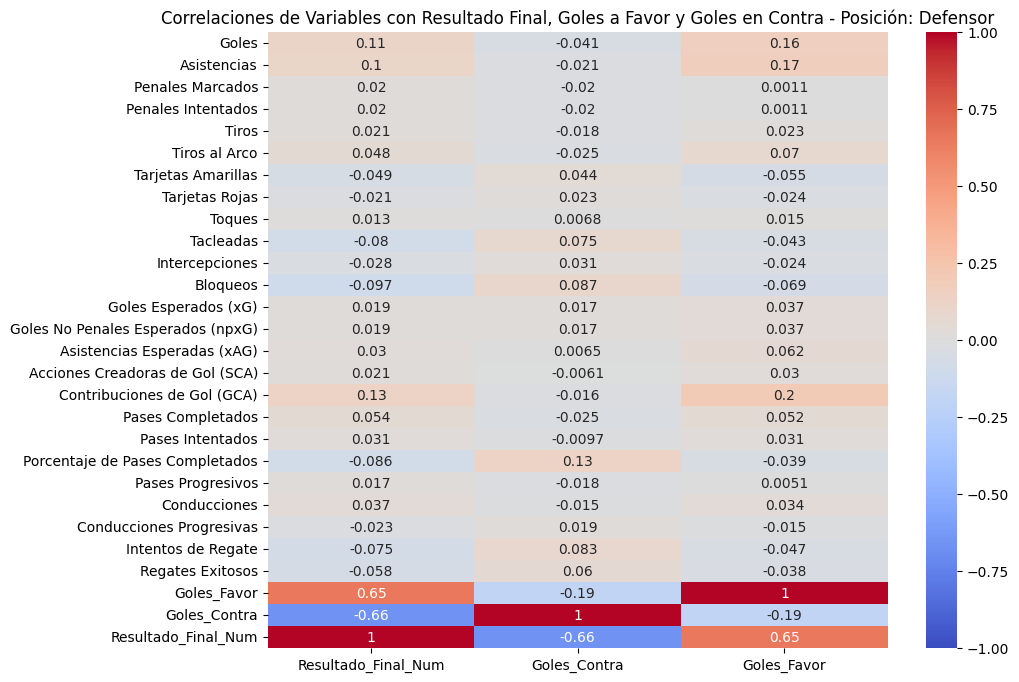

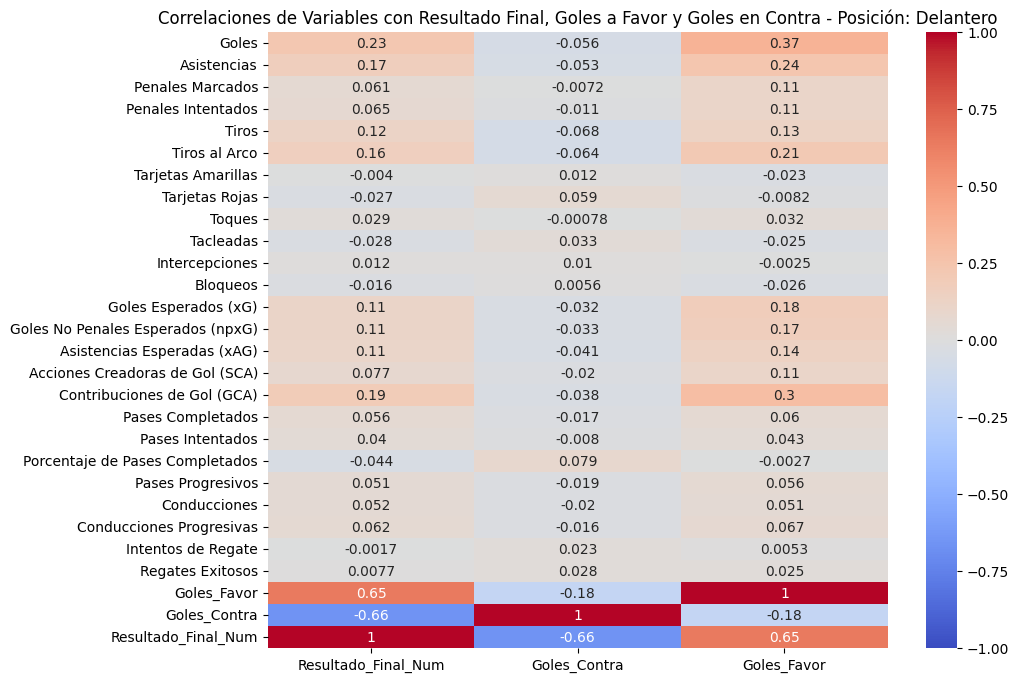

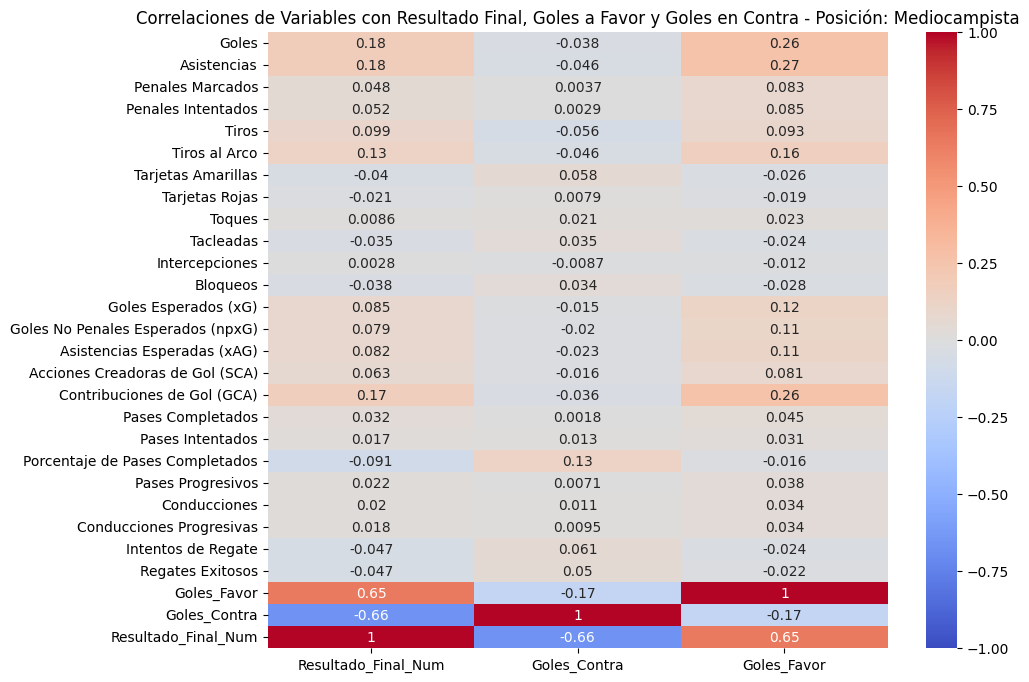

In [ ]:
# Agrupar por Posicion_Normalizada y calcular la correlación para cada grupo
for posicion, grupo in df_jugadores.groupby('Posicion_Normalizada'):
    # Calcular la matriz de correlación para el grupo
    correlaciones = grupo[columnas_corr].corr()

    # Filtrar las correlaciones que involucren 'Resultado_Final_Num', 'Goles_Favor' y 'Goles_Contra'
    correlaciones_filtradas = correlaciones.loc[:, ['Resultado_Final_Num', 'Goles_Contra', 'Goles_Favor']]

    # Visualizar la matriz de correlación filtrada con un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones_filtradas, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlaciones de Variables con Resultado Final, Goles a Favor y Goles en Contra - Posición: {posicion}')
    plt.show()


In [ ]:
# Definir el umbral mínimo de minutos jugados (puedes cambiarlo según tu criterio)
minimo_minutos = 1000

# Filtrar a los jugadores que han jugado al menos el número de minutos especificado
jugadores_agrupados = jugadores_agrupados[jugadores_agrupados['Minutos'] >= minimo_minutos]

In [ ]:
# Seleccionar defensores
df_defensores = jugadores_agrupados[jugadores_agrupados['Posicion_Normalizada'] == 'Defensor']
df_mediocampistas = jugadores_agrupados[jugadores_agrupados['Posicion_Normalizada'] == 'Mediocampista']
df_delanteros = jugadores_agrupados[jugadores_agrupados['Posicion_Normalizada'] == 'Delantero']

###Defensas

####Centrales

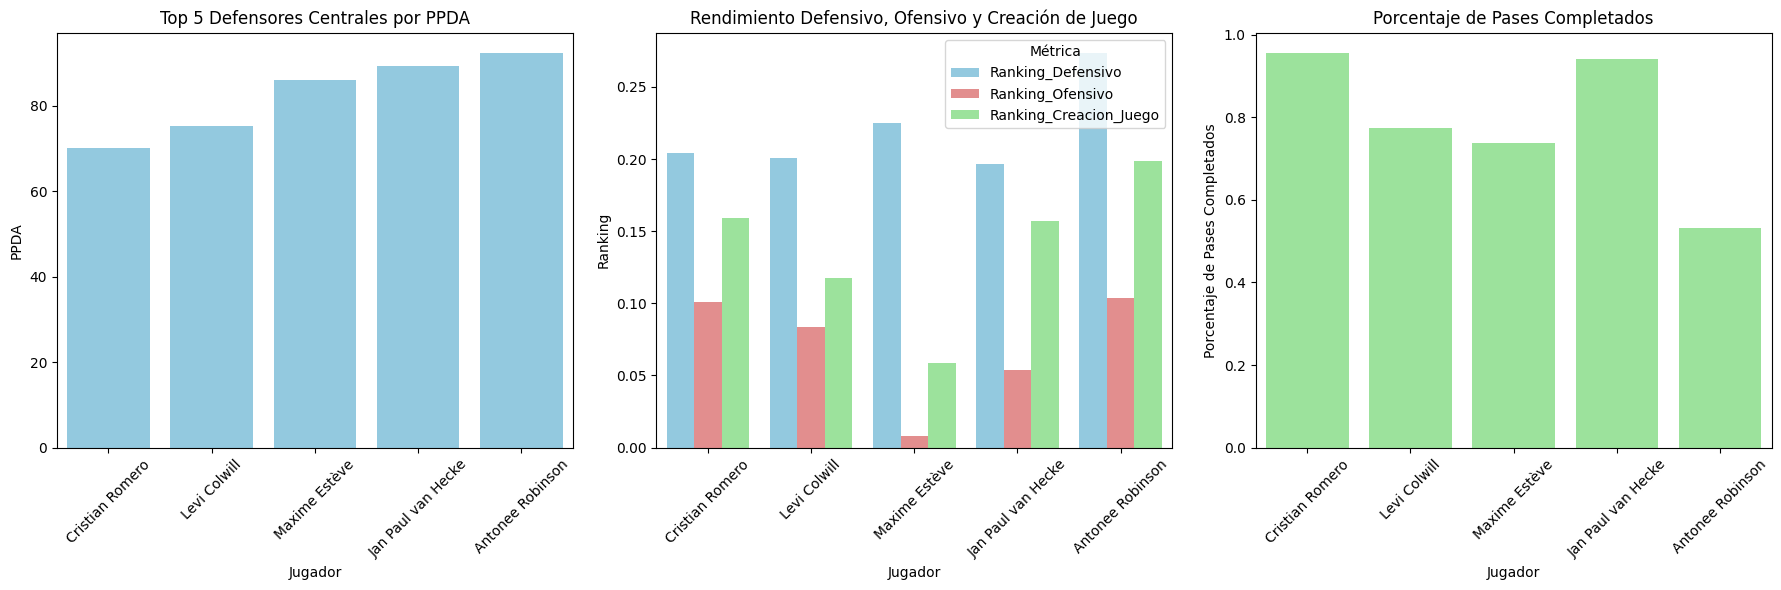

                Jugador  Ranking_Defensivo  Ranking_Ofensivo  \
117     Cristian Romero           0.204213          0.100754   
323        Levi Colwill           0.200967          0.083766   
380       Maxime Estève           0.225079          0.007853   
248  Jan Paul van Hecke           0.196336          0.053735   
47     Antonee Robinson           0.273731          0.103968   

     Porcentaje de Pases Completados       PPDA  
117                         0.918061  70.198387  
323                         0.838130  75.188095  
380                         0.821438  86.036984  
248                         0.910963  89.274542  
47                          0.731189  92.473236  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las posiciones
df_defensores_centrales = df_defensores[df_defensores['Posición'].apply(lambda x: 'CB' in x)]

# Ordenar por PPDA y mostrar los 5 mejores defensores centrales
top_centrales = df_defensores_centrales.sort_values(by=['PPDA', 'Ranking_Defensivo', 'Ranking_Ofensivo'], ascending=[True, False, False]).head(5)

# Configurar el tamaño de la figura para defensores centrales
plt.figure(figsize=(18, 6))

# Gráfico de barras de PPDA para defensores centrales
plt.subplot(1, 3, 1)
sns.barplot(x='Jugador', y='PPDA', data=top_centrales, color='skyblue')
plt.title('Top 5 Defensores Centrales por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras para el rendimiento defensivo, ofensivo y creación de juego
plt.subplot(1, 3, 2)
top_centrales_melted = top_centrales.melt(id_vars='Jugador', value_vars=['Ranking_Defensivo', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_centrales_melted, palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Rendimiento Defensivo, Ofensivo y Creación de Juego')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_centrales, color='lightgreen')
plt.title('Porcentaje de Pases Completados')
plt.ylabel('Porcentaje de Pases Completados')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Mostrar la información de los defensores seleccionados
print(top_centrales[['Jugador', 'Ranking_Defensivo', 'Ranking_Ofensivo', 'Porcentaje de Pases Completados', 'PPDA']])

Se escogen a Cristian Romero y Levi Colwil

####Laterales Izquierdos

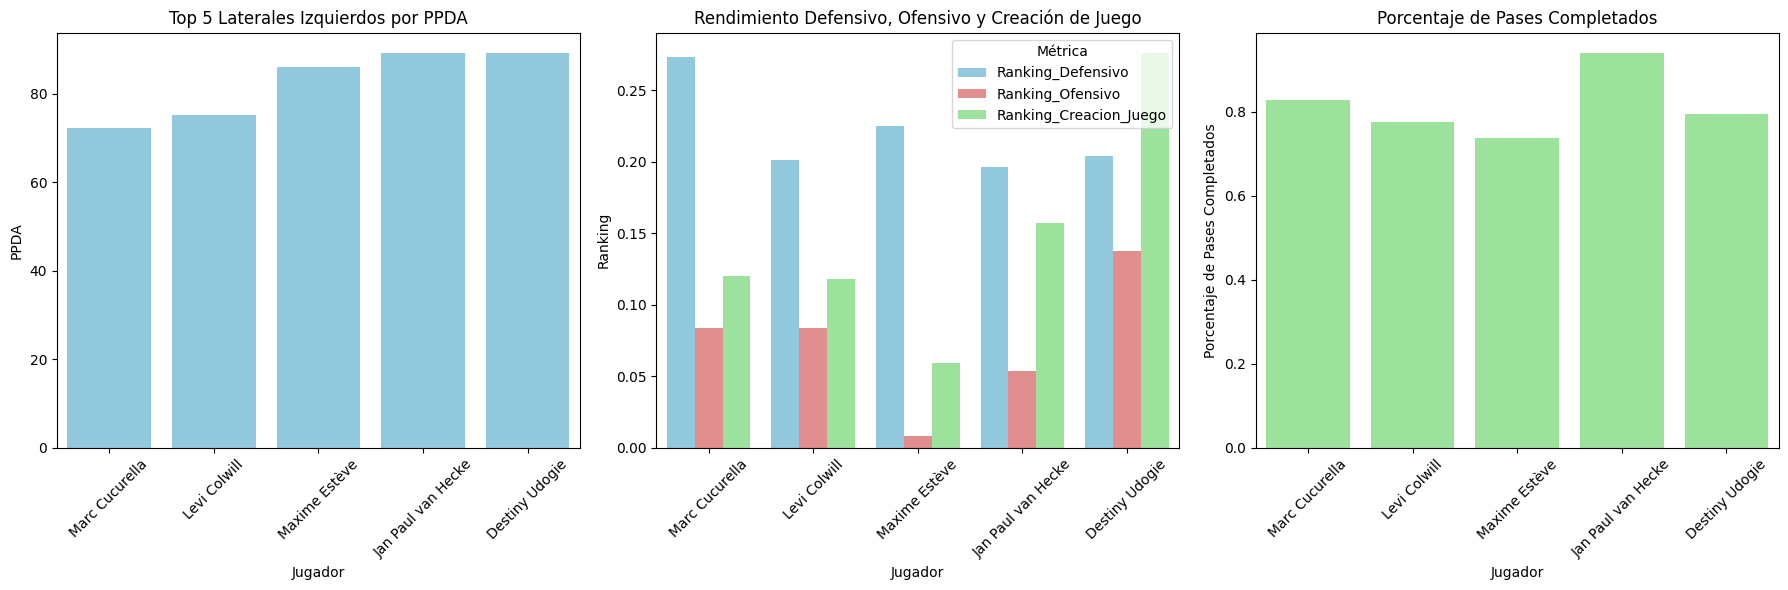

                Jugador  Ranking_Defensivo  Ranking_Ofensivo  \
350      Marc Cucurella           0.273047          0.083766   
323        Levi Colwill           0.200967          0.083766   
380       Maxime Estève           0.225079          0.007853   
248  Jan Paul van Hecke           0.196336          0.053735   
142      Destiny Udogie           0.204268          0.137156   

     Porcentaje de Pases Completados       PPDA  
350                         0.861143  72.243646  
323                         0.838130  75.188095  
380                         0.821438  86.036984  
248                         0.910963  89.274542  
142                         0.847179  89.343746  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las posiciones
df_laterales_izquierdos = df_defensores[df_defensores['Posición'].apply(lambda x: 'LB' in x)]

# Ordenar por PPDA y mostrar los 5 mejores defensores izquierdos
top_laterales_izquierdos = df_laterales_izquierdos.sort_values(by=['PPDA', 'Ranking_Defensivo', 'Ranking_Ofensivo'], ascending=[True, False, False]).head(5)

# Configurar el tamaño de la figura para laterales izquierdos
plt.figure(figsize=(18, 6))

# Gráfico de barras de PPDA para laterales izquierdos
plt.subplot(1, 3, 1)
sns.barplot(x='Jugador', y='PPDA', data=top_laterales_izquierdos, color='skyblue')
plt.title('Top 5 Laterales Izquierdos por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras para el rendimiento defensivo, ofensivo y creación de juego
plt.subplot(1, 3, 2)
top_laterales_izquierdos_melted = top_laterales_izquierdos.melt(id_vars='Jugador', value_vars=['Ranking_Defensivo', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_laterales_izquierdos_melted, palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Rendimiento Defensivo, Ofensivo y Creación de Juego')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_laterales_izquierdos, color='lightgreen')
plt.title('Porcentaje de Pases Completados')
plt.ylabel('Porcentaje de Pases Completados')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


# Mostrar la información de los defensores seleccionados
print(top_laterales_izquierdos[['Jugador', 'Ranking_Defensivo', 'Ranking_Ofensivo', 'Porcentaje de Pases Completados', 'PPDA']])

Se escoge a Destiny Udogie

####Laterales Derechos

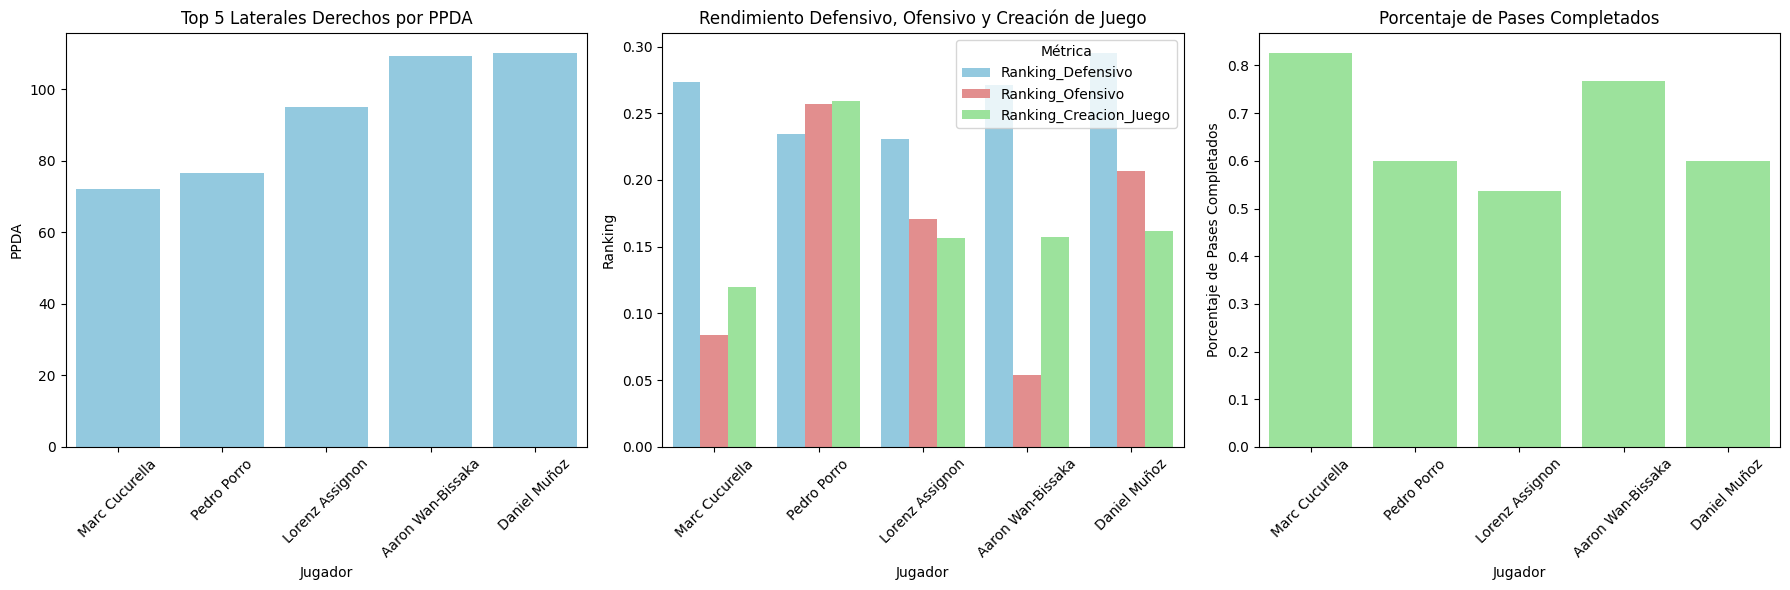

               Jugador  Ranking_Defensivo  Ranking_Ofensivo  \
350     Marc Cucurella           0.273047          0.083766   
445        Pedro Porro           0.234714          0.257282   
332    Lorenz Assignon           0.230703          0.170969   
4    Aaron Wan-Bissaka           0.271240          0.054038   
127       Daniel Muñoz           0.295477          0.206395   

     Porcentaje de Pases Completados        PPDA  
350                         0.861143   72.243646  
445                         0.761143   76.744033  
332                         0.733467   95.103486  
4                           0.835273  109.418759  
127                         0.761375  110.335590  


In [ ]:
# Filtrar las posiciones
df_laterales_derechos = df_defensores[df_defensores['Posición'].apply(lambda x: 'RB' in x)]

# Ordenar por PPDA y mostrar los 5 mejores defensores derechos
top_laterales_derechos = df_laterales_derechos.sort_values(by=['PPDA', 'Ranking_Defensivo', 'Ranking_Ofensivo'], ascending=[True, False, False]).head(5)

# Configurar el tamaño de la figura para laterales derechos
plt.figure(figsize=(18, 6))

# Gráfico de barras de PPDA para laterales derechos
plt.subplot(1, 3, 1)
sns.barplot(x='Jugador', y='PPDA', data=top_laterales_derechos, color='skyblue')
plt.title('Top 5 Laterales Derechos por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras para el rendimiento defensivo, ofensivo y creación de juego
plt.subplot(1, 3, 2)
top_laterales_derechos_melted = top_laterales_derechos.melt(id_vars='Jugador', value_vars=['Ranking_Defensivo', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_laterales_derechos_melted, palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Rendimiento Defensivo, Ofensivo y Creación de Juego')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_laterales_derechos, color='lightgreen')
plt.title('Porcentaje de Pases Completados')
plt.ylabel('Porcentaje de Pases Completados')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Mostrar la información de los defensores seleccionados
print(top_laterales_derechos[['Jugador', 'Ranking_Defensivo', 'Ranking_Ofensivo', 'Porcentaje de Pases Completados', 'PPDA']])


Se escoge a pedro Porro

###Mediocampistas

#### Mediocampista defensivo (DM)

In [ ]:
# Filtrar jugadores que incluyan 'DM' en la columna Posicion_Normalizada
df_mediocampistas_defensivos = df_mediocampistas[df_mediocampistas['Posición'].apply(lambda pos: 'DM' in pos)]

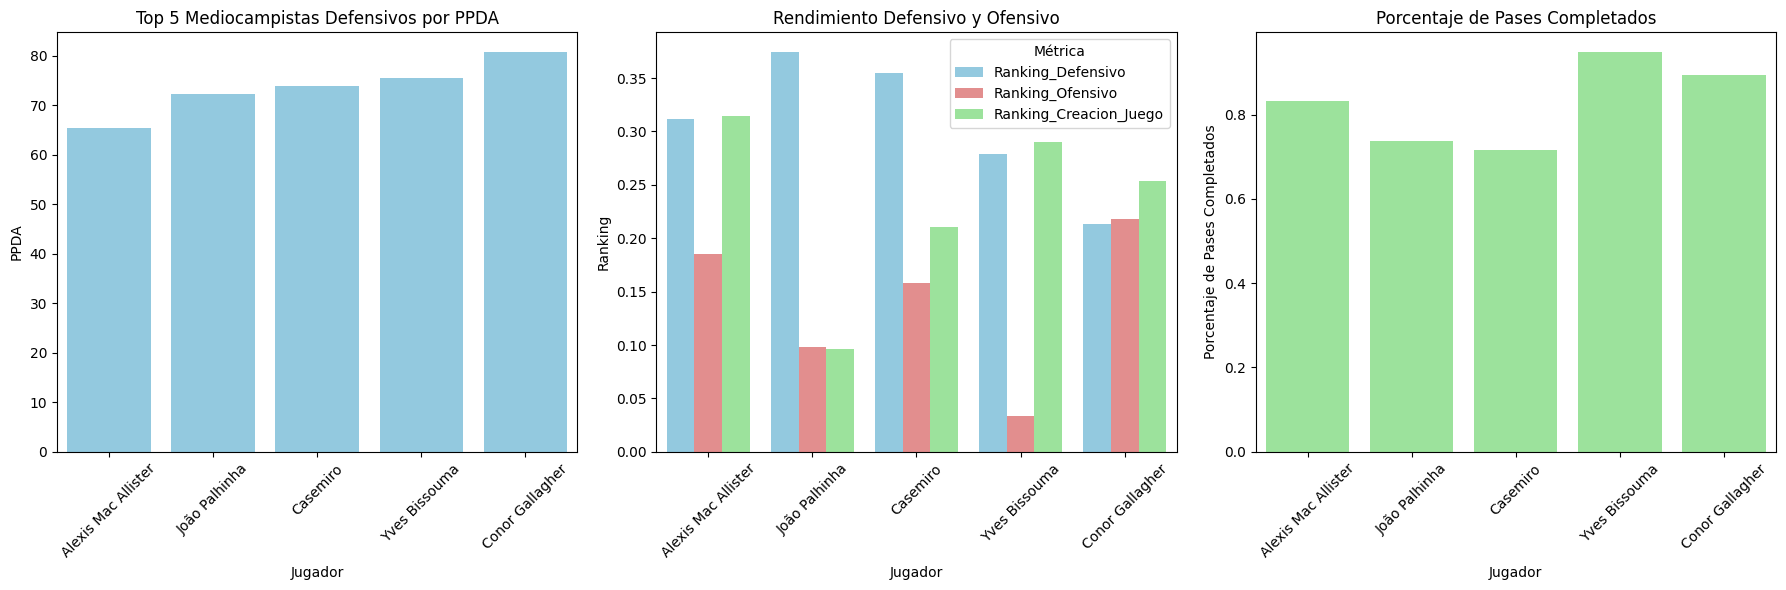

                 Jugador  Ranking_Defensivo  Ranking_Ofensivo  \
20   Alexis Mac Allister           0.311390          0.185692   
290        João Palhinha           0.374116          0.097923   
96              Casemiro           0.354569          0.158512   
558        Yves Bissouma           0.279164          0.033714   
115      Conor Gallagher           0.213656          0.217601   

     Porcentaje de Pases Completados       PPDA  Tacleadas_por_90  \
20                          0.863424  65.437282          3.519155   
290                         0.821455  72.287677          5.040510   
96                          0.812400  73.857286          3.601209   
558                         0.914107  75.620019          3.523559   
115                         0.890054  80.735472          2.489386   

     Intercepciones_por_90  Bloqueos_por_90  
20                1.384913         2.177141  
290               1.517808         1.800776  
96                0.830000         3.529670  
558       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por PPDA y mostrar los 5 mejores mediocampistas defensivos
top_cdm = df_mediocampistas_defensivos.sort_values(by=['PPDA', 'Ranking_Defensivo', 'Ranking_Ofensivo'], ascending=[True, False, False]).head(5)

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 6))

# Gráfico de barras de PPDA
plt.subplot(1, 3, 1)
sns.barplot(x='Jugador', y='PPDA', data=top_cdm, color='skyblue')
plt.title('Top 5 Mediocampistas Defensivos por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras para el rendimiento defensivo y ofensivo
plt.subplot(1, 3, 2)
top_cdm_melted = top_cdm.melt(id_vars='Jugador', value_vars=['Ranking_Defensivo', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_cdm_melted, palette=['skyblue', 'lightcoral', "Lightgreen"])
plt.title('Rendimiento Defensivo y Ofensivo')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_cdm, color='lightgreen')
plt.title('Porcentaje de Pases Completados')
plt.ylabel('Porcentaje de Pases Completados')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Ver la información de los mediocampistas defensivos seleccionados
print(top_cdm[['Jugador', 'Ranking_Defensivo', 'Ranking_Ofensivo', 'Porcentaje de Pases Completados', 'PPDA', 'Tacleadas_por_90', 'Intercepciones_por_90', 'Bloqueos_por_90']])


Se escoge a Alexis Mac Allister

####Mediocampistas Centrales

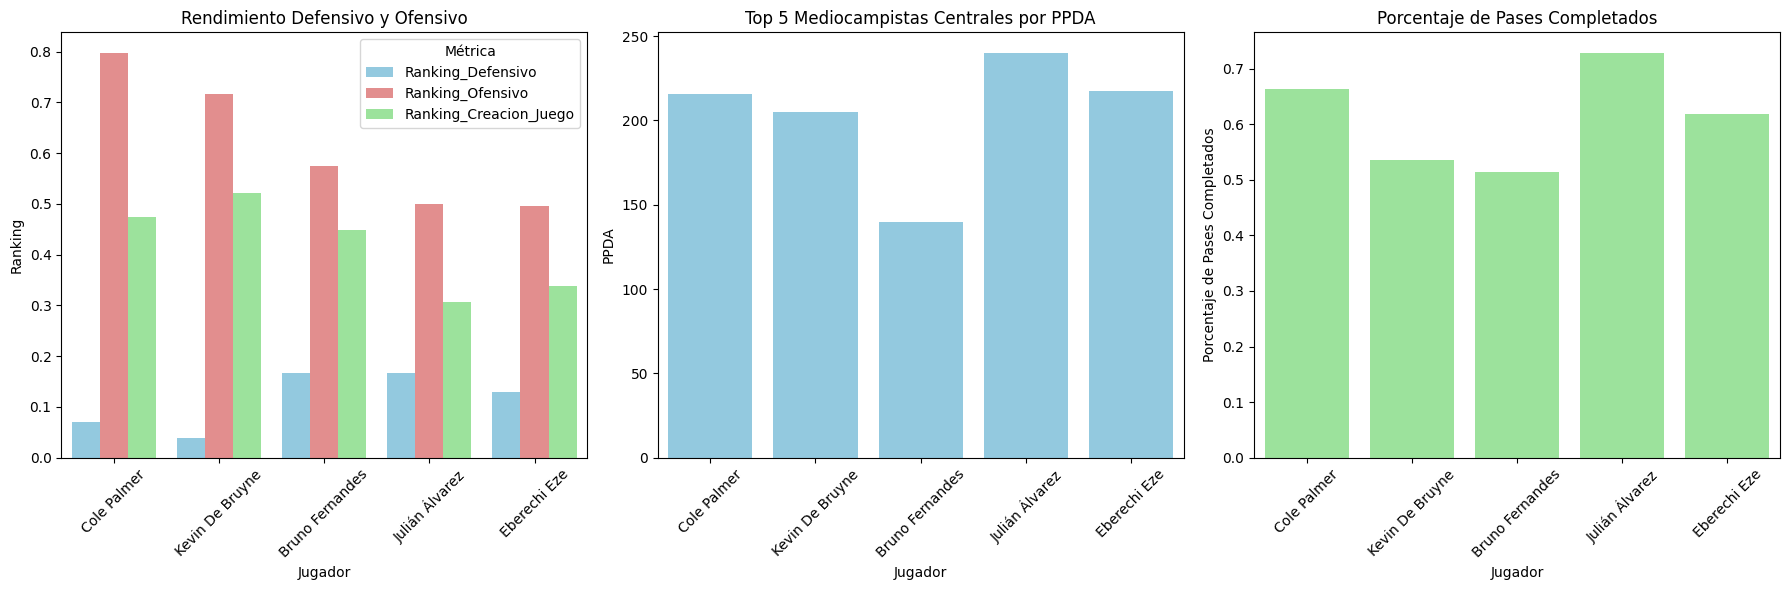

             Jugador  Ranking_Defensivo  Ranking_Ofensivo  \
112      Cole Palmer           0.070932          0.798244   
308  Kevin De Bruyne           0.038290          0.717026   
80   Bruno Fernandes           0.166573          0.574950   
296   Julián Álvarez           0.167597          0.499018   
155     Eberechi Eze           0.128647          0.495558   

     Porcentaje de Pases Completados        PPDA  Tacleadas_por_90  \
112                         0.789441  215.686224          0.858746   
308                         0.732944  204.680556          0.953090   
80                          0.723429  139.531429          1.943499   
296                         0.817944  240.208333          0.717176   
155                         0.769741  217.279630          1.556301   

     Intercepciones_por_90  Bloqueos_por_90  
112               0.707108         0.616593  
308               0.266717         0.297638  
80                0.786762         1.400642  
296               0.055556  

In [ ]:
# Filtrar solo los mediocampistas centrales
df_central_midfielders = df_mediocampistas[df_mediocampistas['Posición'].apply(lambda pos: 'CM' in pos)]

# Ordenar por ranking defensivo y creación de juego
top_cm = df_central_midfielders.sort_values(by=['Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego', 'PPDA'], ascending=[False, False, False, True]).head(5)

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 6))

# Gráfico de barras de PPDA
plt.subplot(1, 3, 2)
sns.barplot(x='Jugador', y='PPDA', data=top_cm, color='skyblue')
plt.title('Top 5 Mediocampistas Centrales por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras para el rendimiento defensivo y ofensivo
plt.subplot(1, 3, 1)
top_cm_melted = top_cm.melt(id_vars='Jugador', value_vars=['Ranking_Defensivo', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_cm_melted, palette=['skyblue', 'lightcoral', "Lightgreen"])
plt.title('Rendimiento Defensivo y Ofensivo')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_cm, color='lightgreen')
plt.title('Porcentaje de Pases Completados')
plt.ylabel('Porcentaje de Pases Completados')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Ver la información de los mediocampistas defensivos seleccionados
print(top_cm[['Jugador', 'Ranking_Defensivo', 'Ranking_Ofensivo', 'Porcentaje de Pases Completados', 'PPDA', 'Tacleadas_por_90', 'Intercepciones_por_90', 'Bloqueos_por_90']])

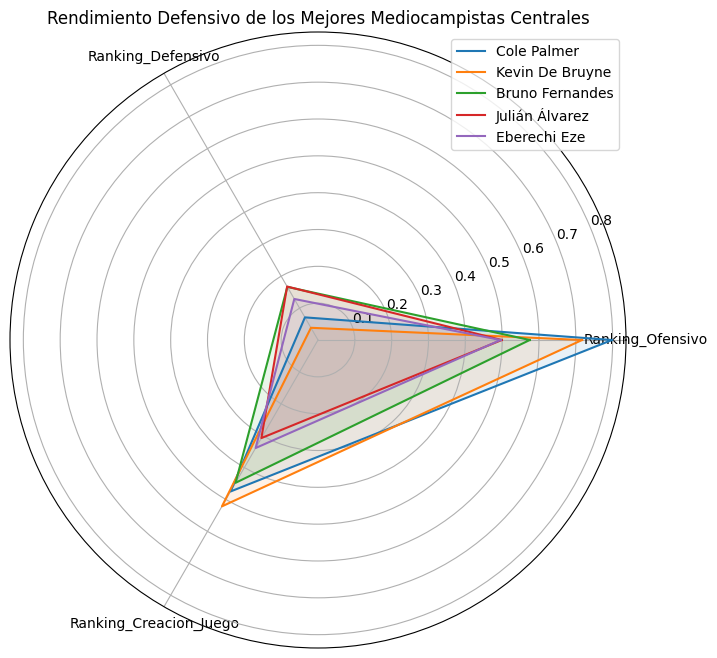

In [ ]:
from math import pi

# Radar chart para los mejores mediocampistas centrales
kpi_columns = ['Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego']

# Datos para el radar chart
num_vars = len(kpi_columns)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Crear radar chart para cada jugador
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in top_cm.iterrows():
    values = row[kpi_columns].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Jugador'])
    ax.fill(angles, values, alpha=0.1)

# Etiquetas y título del radar chart
plt.xticks(angles[:-1], kpi_columns)
plt.title('Rendimiento Defensivo de los Mejores Mediocampistas Centrales')
plt.legend(loc='upper right')
plt.show()

Se escoge a Kevin DeBruyne y Bruno Fernandez

#### Extremos

<ipython-input-124-538f14fc3487>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wingers['Ranking_Eficiencia_Tiros'] = df_wingers['Efectividad_Tiros']


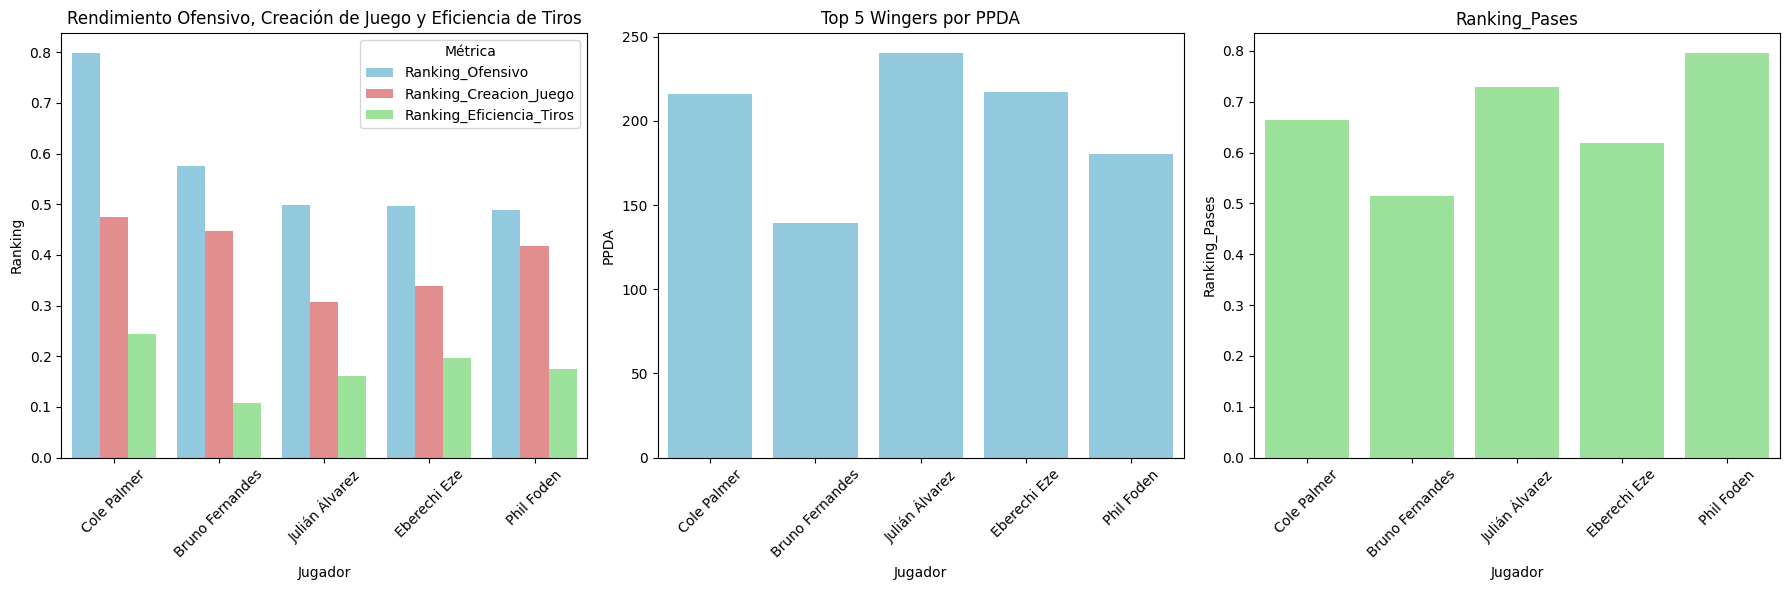

             Jugador  Ranking_Ofensivo  Ranking_Creacion_Juego  \
112      Cole Palmer          0.798244                0.474901   
80   Bruno Fernandes          0.574950                0.447754   
296   Julián Álvarez          0.499018                0.307457   
155     Eberechi Eze          0.495558                0.338677   
448       Phil Foden          0.489527                0.417940   

     Ranking_Eficiencia_Tiros        PPDA  Porcentaje de Pases Completados  
112                  0.244417  215.686224                         0.789441  
80                   0.107778  139.531429                         0.723429  
296                  0.161290  240.208333                         0.817944  
155                  0.197516  217.279630                         0.769741  
448                  0.175471  180.494316                         0.847400  


In [ ]:
# Filtrar jugadores que sean extremos (wingers)
df_wingers = df_mediocampistas[df_mediocampistas['Posición'].apply(lambda x: any(pos in x for pos in ['LW','LM', 'RW','RM']))]

# Crear columnas de ranking para ofensivo, creación de juego y eficiencia de tiros
df_wingers['Ranking_Eficiencia_Tiros'] = df_wingers['Efectividad_Tiros']


# Ordenar por ranking ofensivo, creación de juego y eficiencia de tiros
top_wingers = df_wingers.sort_values(by=['Ranking_Ofensivo', 'Ranking_Creacion_Juego', 'Ranking_Eficiencia_Tiros'], ascending=[False, False, False]).head(5)

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 6))

# Gráfico de barras para el rendimiento ofensivo, defensivo y creación de juego
plt.subplot(1, 3, 1)
top_wingers_melted = top_wingers.melt(id_vars='Jugador', value_vars=['Ranking_Ofensivo', 'Ranking_Creacion_Juego', 'Ranking_Eficiencia_Tiros'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_wingers_melted, palette=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Rendimiento Ofensivo, Creación de Juego y Eficiencia de Tiros')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras de PPDA (Presión Defensiva por Acción)
plt.subplot(1, 3, 2)
sns.barplot(x='Jugador', y='PPDA', data=top_wingers, color='skyblue')
plt.title('Top 5 Wingers por PPDA')
plt.ylabel('PPDA')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 3, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_wingers, color='lightgreen')
plt.title('Ranking_Pases')
plt.ylabel('Ranking_Pases')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Ver la información de los mejores wingers seleccionados
print(top_wingers[['Jugador', 'Ranking_Ofensivo', 'Ranking_Creacion_Juego', 'Ranking_Eficiencia_Tiros', 'PPDA', 'Porcentaje de Pases Completados']])


Se escogen a Cole Palmer y Phil Foden

### Delantero

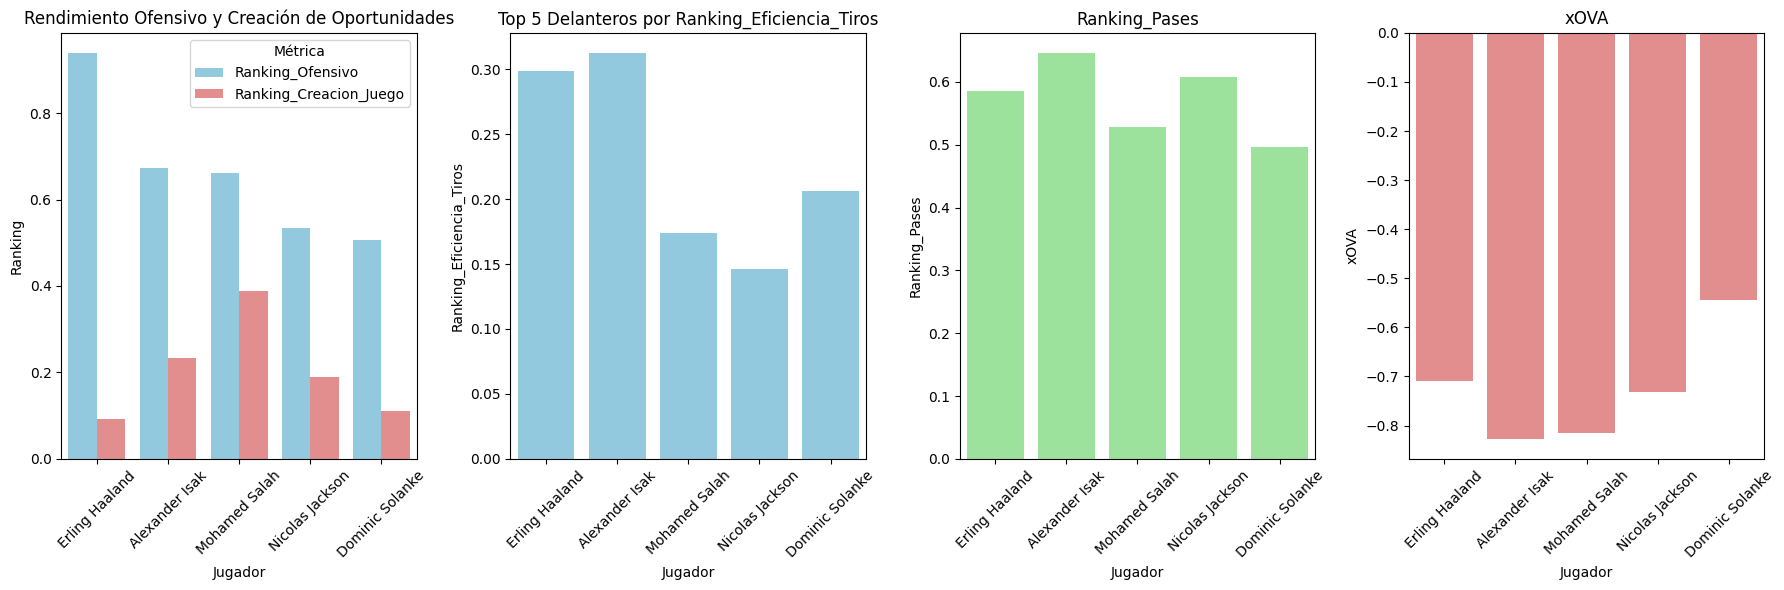

             Jugador  Ranking_Ofensivo  Ranking_Creacion_Oportunidades  \
169   Erling Haaland          0.938710                        2.943052   
19    Alexander Isak          0.673333                        7.296834   
395    Mohamed Salah          0.662500                       10.498942   
417  Nicolas Jackson          0.534286                        5.841999   
150  Dominic Solanke          0.505263                        4.022044   

     Ranking_Eficiencia_Tiros      xOVA        PPDA  \
169                  0.298466 -0.709677  302.384615   
19                   0.312346 -0.826667  284.933333   
395                  0.173563 -0.815625  217.694444   
417                  0.146032 -0.731429  237.930667   
150                  0.205856 -0.544737  255.976786   

     Porcentaje de Pases Completados  
169                         0.755290  
19                          0.781467  
395                         0.729781  
417                         0.764971  
150                         0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar jugadores que sean delanteros (FW y ST)
df_delanteros = df_delanteros[df_delanteros['Posición'].apply(lambda x: any(pos in x for pos in ['FW', 'ST']))]

# Crear columnas de ranking para ofensivo, xOVA y eficiencia de tiros
df_delanteros['Ranking_Eficiencia_Tiros'] = df_delanteros['Efectividad_Tiros']

# Ordenar por goles esperados, eficiencia de tiros y creación de oportunidades
top_delanteros = df_delanteros.sort_values(by=['Ranking_Ofensivo', 'Ranking_Eficiencia_Tiros', 'Ranking_Creacion_Juego'], ascending=[False, False, False]).head(5)

# Configurar el tamaño de la figura para mostrar varias gráficas
plt.figure(figsize=(18, 6))

# Gráfico de barras para el rendimiento ofensivo, xOVA y eficiencia de tiros
plt.subplot(1, 4, 1)
top_delanteros_melted = top_delanteros.melt(id_vars='Jugador', value_vars=['Ranking_Ofensivo', 'Ranking_Creacion_Juego'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Jugador', y='Valor', hue='Métrica', data=top_delanteros_melted, palette=['skyblue', 'lightcoral'])
plt.title('Rendimiento Ofensivo y Creación de Oportunidades')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Gráfico de barras de PPDA (Presión Defensiva por Acción)
plt.subplot(1, 4, 2)
sns.barplot(x='Jugador', y='Ranking_Eficiencia_Tiros', data=top_delanteros, color='skyblue')
plt.title('Top 5 Delanteros por Ranking_Eficiencia_Tiros')
plt.ylabel('Ranking_Eficiencia_Tiros')
plt.xticks(rotation=45)

# Gráfico de barras del porcentaje de pases completados
plt.subplot(1, 4, 3)
sns.barplot(x='Jugador', y='Ranking_Pases', data=top_delanteros, color='lightgreen')
plt.title('Ranking_Pases')
plt.ylabel('Ranking_Pases')
plt.xticks(rotation=45)

# Gráfico de barras del xOVA
plt.subplot(1, 4, 4)
sns.barplot(x='Jugador', y='xOVA', data=top_delanteros, color='lightcoral')
plt.title('xOVA')
plt.ylabel('xOVA')
plt.xticks(rotation=45)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Ver la información de los mejores delanteros seleccionados
print(top_delanteros[['Jugador', 'Ranking_Ofensivo', 'Ranking_Creacion_Oportunidades', 'Ranking_Eficiencia_Tiros', 'xOVA', 'PPDA', 'Porcentaje de Pases Completados']])




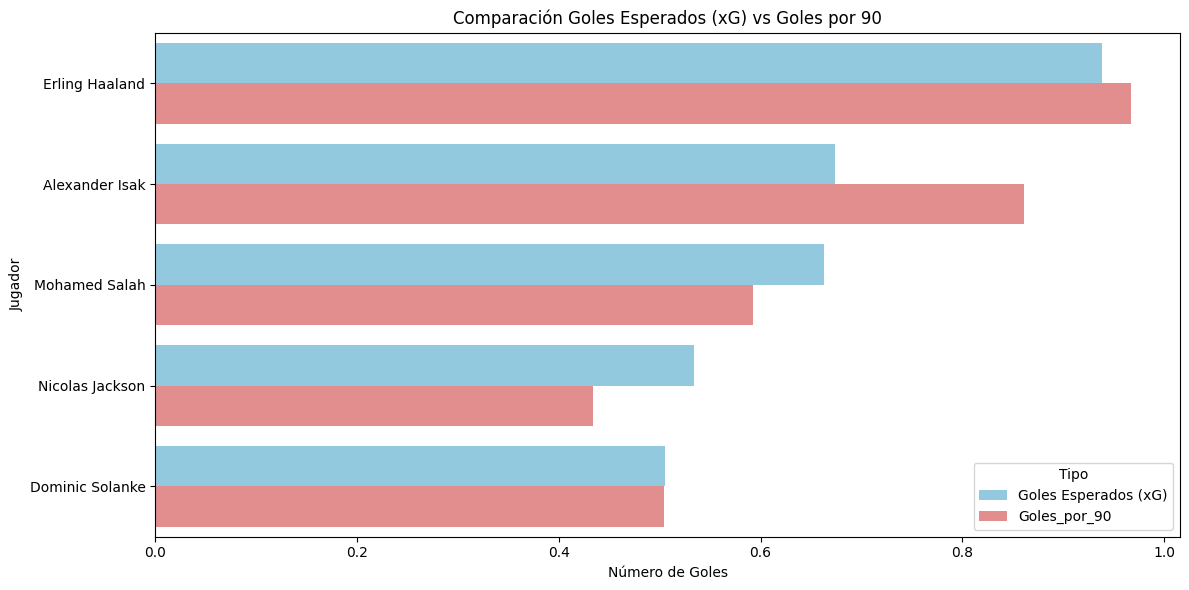

             Jugador  Goles Esperados (xG)  Goles_por_90
169   Erling Haaland              0.938710      0.967261
19    Alexander Isak              0.673333      0.861324
395    Mohamed Salah              0.662500      0.592929
417  Nicolas Jackson              0.534286      0.433628
150  Dominic Solanke              0.505263      0.504055


In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Preparar los datos en formato 'melt' para tener ambas métricas en un solo DataFrame
df_goles = top_delanteros[['Jugador', 'Goles Esperados (xG)', 'Goles_por_90']].melt(id_vars='Jugador',
                                                                                    value_vars=['Goles Esperados (xG)', 'Goles_por_90'],
                                                                                    var_name='Tipo',
                                                                                    value_name='Goles')

# Crear el gráfico de barras
sns.barplot(x='Goles', y='Jugador', hue='Tipo', data=df_goles, palette=['skyblue', 'lightcoral'])

# Configurar el título y etiquetas
plt.title('Comparación Goles Esperados (xG) vs Goles por 90')
plt.xlabel('Número de Goles')
plt.ylabel('Jugador')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Mostrar la información de los goles esperados vs goles por 90
print(top_delanteros[['Jugador', 'Goles Esperados (xG)', 'Goles_por_90']])

Se escoge a Erling Haaland

In [ ]:
jugadores_agrupados.columns

Index(['Jugador', 'Goles_por_90', 'Asistencias_por_90', 'Tiros_por_90',
       'Tiros_al_arco_por_90', 'Efectividad_Tiros', 'Goles Esperados (xG)',
       'Asistencias Esperadas (xAG)', 'Diferencia_Goles',
       'Diferencia_Asistencias', 'Acciones Creadoras de Gol (SCA) por 90',
       'Contribuciones de Gol (GCA) por 90', 'xOVA', 'Tacleadas_por_90',
       'Intercepciones_por_90', 'Bloqueos_por_90', 'PPDA',
       'Porcentaje de Pases Completados', 'Pases_progresivos_por_90',
       'Regates_exitosos_por_90', 'Conducciones_por_90',
       'Conducciones_progresivas_por_90', 'Tarjetas_amarillas_por_90',
       'Tarjetas_rojas_por_90', 'Minutos', 'Goles_Favor', 'Goles_Contra',
       'Resultado_Final_Num', 'Posicion_Normalizada', 'Posición',
       'Ranking_Ofensivo', 'Ranking_Defensivo', 'Ranking_Creacion_Juego',
       'Ranking_Pases'],
      dtype='object')

###Porteros

In [ ]:
df_porteros.describe()

,Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA),Goles en Contra,Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT),Toques,Saques de Meta,Longitud Promedio de Saques de Meta,Acciones Defensivas Fuera del Área,Distancia Promedio de Acciones Defensivas
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,-0.061212,1.592727,0.293939,39.733333,5.832121,41.945455,1.350000,14.678788
std,0.296087,0.479376,0.040616,6.109702,2.103619,9.546566,0.582344,2.734588
min,-0.880000,0.730000,0.210000,29.590000,2.650000,18.000000,0.240000,9.400000
25%,-0.110000,1.380000,0.260000,34.390000,3.700000,38.600000,1.000000,13.200000
50%,0.020000,1.570000,0.300000,40.500000,6.200000,43.100000,1.340000,14.400000
75%,0.060000,1.770000,0.320000,43.900000,7.380000,47.900000,1.630000,16.400000
max,0.610000,2.920000,0.390000,56.570000,10.390000,59.400000,2.500000,21.500000


In [ ]:
df_porteros.columns

Index(['Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)',
       'Goles en Contra', 'Porcentaje de Paradas',
       'Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)',
       'Porcentaje de Paradas en Penales',
       'Porcentaje de Partidos con Portería a Cero', 'Toques',
       'Porcentaje de Lanzamientos', 'Saques de Meta',
       'Longitud Promedio de Saques de Meta',
       'Porcentaje de Centros Detenidos', 'Acciones Defensivas Fuera del Área',
       'Distancia Promedio de Acciones Defensivas', 'Portero'],
      dtype='object')

In [ ]:
df_porteros["Portero"].unique()

array(['Alisson', 'Alphonse Areola', 'Martin Dúbravka', 'Ederson',
       'Łukasz Fabiański', 'Mark Flekken', 'Wes Foderingham', 'Ivo Grbić',
       'Dean Henderson', 'Sam Johnstone', 'Thomas Kaminski',
       'Caoimhín Kelleher', 'Bernd Leno', 'Emiliano Martínez',
       'Arijanet Muric', 'Neto', 'André Onana', 'Stefan Ortega',
       'Đorđe Petrović', 'Jordan Pickford', 'Nick Pope', 'Aaron Ramsdale',
       'David Raya', 'José Sá', 'Robert Sánchez', 'Matz Sels',
       'Jason Steele', 'James Trafford', 'Mark Travers', 'Matt Turner',
       'Bart Verbruggen', 'Guglielmo Vicario', 'Odisseas Vlachodimos'],
      dtype=object)

<ipython-input-47-a8d52c608ec1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Portero', y='Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)', data=top_porteros, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seab

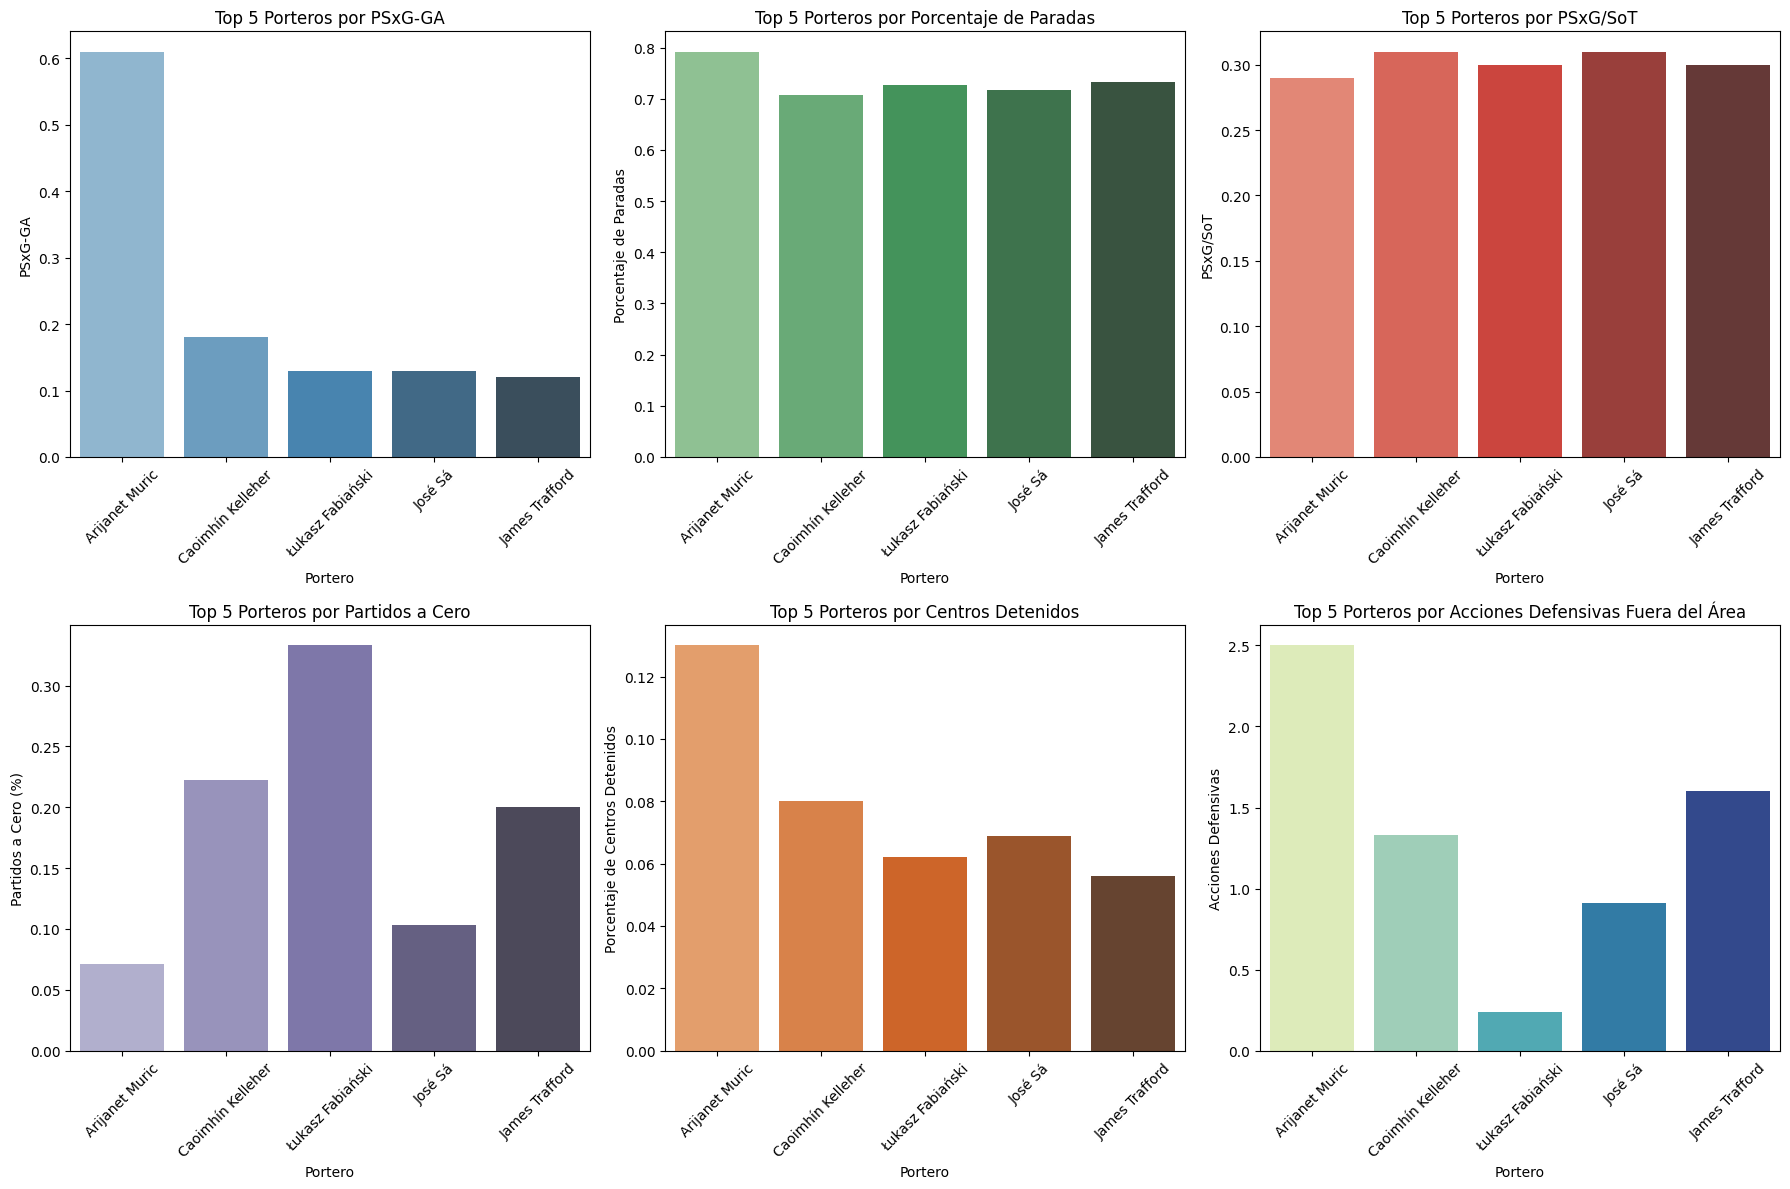

              Portero  Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)  \
13     Arijanet Muric                                               0.61        
10  Caoimhín Kelleher                                               0.18        
4    Łukasz Fabiański                                               0.13        
21            José Sá                                               0.13        
25     James Trafford                                               0.12        

    Porcentaje de Paradas  \
13                  0.792   
10                  0.707   
4                   0.727   
21                  0.717   
25                  0.733   

    Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)  \
13                                               0.29       
10                                               0.31       
4                                                0.30       
21                                               0.31       
25                               

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por la métrica más importante: PSxG-GA
top_porteros = df_porteros.sort_values(by='Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)', ascending=False).head(5)

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 12))

# Gráfico de barras para PSxG-GA (diferencia entre goles esperados post-tiro y goles en contra)
plt.subplot(2, 3, 1)
sns.barplot(x='Portero', y='Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)', data=top_porteros, palette='Blues_d')
plt.title('Top 5 Porteros por PSxG-GA')
plt.ylabel('PSxG-GA')
plt.xticks(rotation=45)

# Gráfico de barras para porcentaje de paradas
plt.subplot(2, 3, 2)
sns.barplot(x='Portero', y='Porcentaje de Paradas', data=top_porteros, palette='Greens_d')
plt.title('Top 5 Porteros por Porcentaje de Paradas')
plt.ylabel('Porcentaje de Paradas')
plt.xticks(rotation=45)

# Gráfico de barras para Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)
plt.subplot(2, 3, 3)
sns.barplot(x='Portero', y='Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)', data=top_porteros, palette='Reds_d')
plt.title('Top 5 Porteros por PSxG/SoT')
plt.ylabel('PSxG/SoT')
plt.xticks(rotation=45)

# Gráfico de barras para porcentaje de partidos con portería a cero
plt.subplot(2, 3, 4)
sns.barplot(x='Portero', y='Porcentaje de Partidos con Portería a Cero', data=top_porteros, palette='Purples_d')
plt.title('Top 5 Porteros por Partidos a Cero')
plt.ylabel('Partidos a Cero (%)')
plt.xticks(rotation=45)

# Gráfico de barras para porcentaje de centros detenidos
plt.subplot(2, 3, 5)
sns.barplot(x='Portero', y='Porcentaje de Centros Detenidos', data=top_porteros, palette='Oranges_d')
plt.title('Top 5 Porteros por Centros Detenidos')
plt.ylabel('Porcentaje de Centros Detenidos')
plt.xticks(rotation=45)

# Gráfico de barras para acciones defensivas fuera del área
plt.subplot(2, 3, 6)
sns.barplot(x='Portero', y='Acciones Defensivas Fuera del Área', data=top_porteros, palette='YlGnBu')
plt.title('Top 5 Porteros por Acciones Defensivas Fuera del Área')
plt.ylabel('Acciones Defensivas')
plt.xticks(rotation=45)

# Ajustar el diseño de las gráficas
plt.tight_layout()
plt.show()

# Mostrar los datos del top 5 de porteros
print(top_porteros[['Portero', 'Goles Esperados Post-Tiro vs Goles en Contra (PSxG-GA)',
                    'Porcentaje de Paradas', 'Goles Esperados Post-Tiro por Tiro al Arco (PSxG/SoT)',
                    'Porcentaje de Partidos con Portería a Cero', 'Porcentaje de Centros Detenidos',
                    'Acciones Defensivas Fuera del Área']])


Se escoge a Arijanet Muric

##Links importantes:

*   https://www.sports-reference.com/bot-traffic.html
*   https://medium.com/@magedmakled/kpi-per-position-in-football-15770509c1f4


